In [1]:
import qiskit.tools.jupyter

%qiskit_version_table


# Barren Plateus 
We've seen that training with gradients works well on the small example model. But can we expect the same if we increase the number of qubits? To investigate that, we measure the variance (A measure of how much a variable deviates from the mean.) of the gradients for different model sizes. The idea is simple: if the variance is really small, we don't have enough information to update our parameters. You'll see that as the number of QNN layers increase, you'll have exponentially vanishing gradients (barren plateaus). This means our gradients contain less and less information and we'll have a hard time to train the model. This is where the loss landscape becomes increasingly flat (and thus hard to determine the direction to the minimum). This issue is discussed in detail in these two references: Jarrod R. McClean, Sergio Boixo, Vadim N. Smelyanskiy, Ryan Babbush and Hartmut Neven, Barren plateaus in quantum neural network training landscapes, Nature Communications, Volume 9, 4812 (2018), doi:10.1038/s41467-018-07090-4, arXiv:1803.11173 and M. Cerezo, Akira Sone, Tyler Volkoff, Lukasz Cincio and Patrick J. Coles, Cost Function Dependent Barren Plateaus in Shallow Parametrized Quantum Circuits, Nature Communications 12, 1791 (2021), doi:10.1038/s41467-021-21728-w, arXiv:2001.00550. 





To help us visualize the problem and get a sense of what is happening in the cost landscape let’s look at two circuits with 50 layers each and containing 4 and 12 qubits. We will use the circuit shown below consisting of only 2 parameters $\theta$ and $\phi$. We use the observable ZZ on the first two qubits and visualize the landscape for different values of $\theta$ and $\phi$.

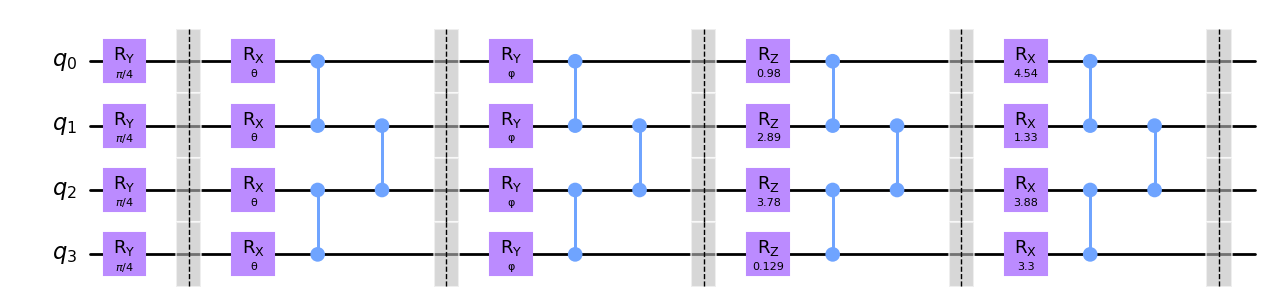

In [1]:

from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit
from qiskit_qulacs.qulacs_estimator import QulacsEstimator
import os

seed = 42
np.random.seed(seed)



estimator = QulacsEstimator()

def generate_random_pqc(n_qubits, n_layers):

    qc = QuantumCircuit(n_qubits)

    theta, phi = Parameter('θ'), Parameter('φ')

    for q in range(n_qubits):
        qc.ry(np.pi / 4, q)

    qc.barrier()

    for l in range(n_layers):

        for q in range(n_qubits):

            if l == 0:
                val = theta
            elif l == 1:
                val = phi
            else:
                val = np.random.uniform(0, 2 * np.pi)

            num = np.random.randint(3)

            if l % 3 == 0:
                qc.rx(val, q)
            elif l % 3 == 1:
                qc.ry(val, q)
            else:
                qc.rz(val, q)

        for q in range(0, n_qubits - 1, 2):
            qc.cz(q, q + 1)
        for q in range(1, n_qubits - 1, 2):
            qc.cz(q, q + 1)

        qc.barrier()

    return qc


circ = generate_random_pqc(4, 4)
circ.draw('mpl')



In [2]:


def generate_surface(circuit, observable):
    Z = []
    Z_assembler = []

    X = np.arange(-np.pi, np.pi, 0.25)
    Y = np.arange(-np.pi, np.pi, 0.25)
    X, Y = np.meshgrid(X, Y)
    for x in X[0, :]:
        for y in Y[:, 0]:
            rotations = np.array([x, y])
            Z_assembler.append(
                estimator.run(circuit, observable,
                              rotations).result().values[0])
        Z.append(Z_assembler)
        Z_assembler = []

    Z = np.asarray(Z)
    return Z


def plot_surface(surface):
    X = np.arange(-np.pi, np.pi, 0.25)
    Y = np.arange(-np.pi, np.pi, 0.25)
    X, Y = np.meshgrid(X, Y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    surf = ax.plot_surface(X,
                           Y,
                           surface,
                           rstride=1,
                           cstride=1,
                           cmap=plt.get_cmap('rainbow'),
                           linewidth=0,
                           antialiased=False,
                           alpha=0.6)
    ax.set_zlim(-1, 1)
    ax.set_xlabel('θ')
    ax.set_ylabel('φ')
    ax.set_zlabel('Pauli-Z Expectation')
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
    plt.show()



'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 

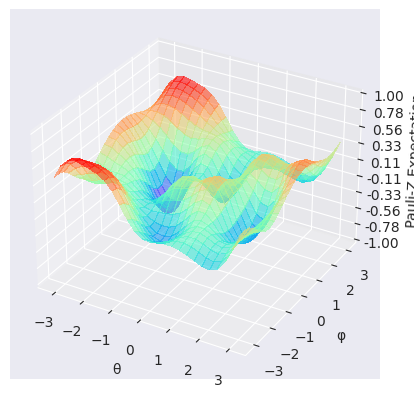

In [3]:
n_qubits = 4
n_layers = 50
op = SparsePauliOp(['I' * (n_qubits - 2) + 'ZZ'])

small_qubit_qc = generate_random_pqc(n_qubits, n_layers)

small_global_surface = generate_surface(small_qubit_qc, op)
plot_surface(small_global_surface)

'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 'to_matrix'
'Barrier' object has no attribute 

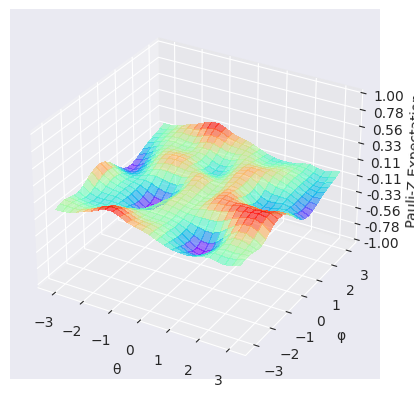

In [4]:


n_qubits = 12
n_layers = 50
op = SparsePauliOp(['I' * (n_qubits - 2) + 'ZZ'])

large_qubit_qc = generate_random_pqc(n_qubits, n_layers)

large_global_surface = generate_surface(large_qubit_qc, op)
plot_surface(large_global_surface)



![](barren1.gif)
![](barren2.gif)
For a 4-qubit circuit, the cost landscape is trainable. However, For a 12-qubit circuit, much of the cost landscape is flattening and becomes difficult to train. This effect will worsen as the number of qubits and layers increases.

## Is there something we can do about these barren plateaus? 

It's a hot topic in current research and there are some proposals to mitigate barren plateaus. First look at how global and local cost functions and the depth of the ansatz influences the barren plateaus. Investigate single layer circuits with various depth using global operators (An operator acting on the entire circuit.) and with local operators. Can you find a scenario without barren plateu? Is it an easy to simulate circuit?

In [ ]:
#Code me

## Layerwise Learning

The Layerwise learning algorithm proposed by Skolik, A., McClean, J.R., Mohseni, M. et al. Layerwise learning for quantum neural networks. Quantum Mach. Intell. 3, 5 (2021). https://doi.org/10.1007/s42484-020-00036-4 is one of the many attempts to tackle Barren Plateu problem. The traditional way we have seen up until now is called complete depth learning (CDL) where all parameters are trained together. However, in a noisy environment, a single unfavourable update can affect the entire circuit and can trap it within a barren plateau. In layerwise learning, the circuit is trained in two phases:

** Phase I **

In the initial phase of the algorithm, we build the ansatz by progressively adding. We first have a circuit with s number of layers whose parameters are initialized to zeros. We train this circuit for a fixed number of epochs, after which we add another set of layers and freeze the parameters of the previous layers. The parameters to optimize are dependent on two hyperparameters p and q. The value of p governs the number of layers added in each step, while q determines the layer interval after which the parameters of prior layers are frozen. For instance, with p = 2 and q = 4, two layers are appended in each step, and layers preceding the current one by more than four are frozen.

** Phase II ** 

The second phase of the algorithm involves further training of the pre-trained circuit from phase I. Here, larger contiguous partitions of layers are trained simultaneously. A hyperparameter r is introduced to specify the percentage of parameters trained within a single step. We train each partition alternatively until convergence. This way we are training on a larger partition (compared to phase I) at once. By constraining randomness to shallower sub-circuits throughout the entire training process, the algorithm also effectively reduces the likelihood of encountering barren plateaus, which could arise due to stochastic or hardware noise present during the sampling procedure.

The following example implementation from [Layerwise learning for Quantum Neural Networks with Qiskit and PyTorch](https://github.com/Gopal-Dahale/ILearnQuantum/tree/main/layerwise_learning_with_qiskit_and_pytorch#layerwise-learning-for-quantum-neural-networks-with-qiskit-and-pytorch) Is rather large, and better run in a PC with GPU. 

In [5]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
import qiskit_algorithms
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

import torch
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from torch import manual_seed


from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from time import time
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

seed = 42
algorithm_globals.random_seed = seed
np.random.seed(seed)
manual_seed(seed)

sns.set_style("whitegrid")

### Configuration


In [6]:
batch_size = 16
num_workers = 2
n_train_samples = 200
n_test_samples = 2000
n_components = 8

n_qubits = n_components
n_layer_steps = 8
n_layers_to_add = 2
n_layers_to_train = 2
partition_percentage = 0.5
n_sweeps = 2



In [7]:
def min_max_scaling(x, new_min, new_max):
    x_min, x_max = x.min(), x.max()
    return (x - x_min) / (x_max - x_min) * (new_max - new_min) + new_min


### Dataset

In [8]:
# Train Dataset
# -------------

# Use pre-defined torchvision function to load MNIST train data
X_train = datasets.MNIST(root="./data",
                         train=True,
                         download=True,
                         transform=transforms.Compose([transforms.ToTensor()]))

# Filter out labels (originally 0-9), leaving only labels 0 and 1
idx = np.append(
    np.where(X_train.targets == 0)[0][:n_train_samples // 2],
    np.where(X_train.targets == 1)[0][:n_train_samples // 2])

X_train.data = X_train.data[idx]
X_train.targets = X_train.targets[idx]


In [9]:
# Test Dataset
# -------------

# Use pre-defined torchvision function to load MNIST test data
X_test = datasets.MNIST(root="./data",
                        train=False,
                        download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))

# Filter out labels (originally 0-9), leaving only labels 0 and 1
idx = np.append(
    np.where(X_test.targets == 0)[0][:n_test_samples // 2],
    np.where(X_test.targets == 1)[0][:n_test_samples // 2])

X_test.data = X_test.data[idx]
X_test.targets = X_test.targets[idx]

In [10]:
x_train = np.float32(X_train.data.numpy()) / 255.
y_train = X_train.targets.numpy()

x_test = np.float32(X_test.data.numpy()) / 255.
y_test = X_test.targets.numpy()

x_train, y_train = shuffle(x_train, y_train, random_state=seed)
x_test, y_test = shuffle(x_test, y_test, random_state=seed)

x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

pca = PCA(n_components)

x_train = pca.fit_transform(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_ * 100)[-1]
print("Cumulative sum on train :", cumsum)

x_test = pca.transform(x_test)
cumsum = np.cumsum(pca.explained_variance_ratio_ * 100)[-1]
print("Cumulative sum on train :", cumsum)

x_train = min_max_scaling(x_train, 0, 2 * np.pi)
x_test = min_max_scaling(x_test, 0, 2 * np.pi)


Cumulative sum on train : 69.22405
Cumulative sum on train : 69.22405


In [11]:
train_dataset = TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train))
train_dataloader = DataLoader(train_dataset,
                              shuffle=True,
                              batch_size=batch_size,
                              num_workers=num_workers)

test_dataset = TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test))
test_dataloader = DataLoader(test_dataset,
                             shuffle=True,
                             batch_size=batch_size,
                             num_workers=num_workers)

In [12]:
feature_map = TwoLocal(n_qubits, ['rx'],
                       parameter_prefix='x',
                       skip_final_rotation_layer=True,
                       reps=1).decompose()

ansatz = TwoLocal(n_qubits, ['ry', 'rz'],
                  'cz',
                  skip_final_rotation_layer=True,
                  entanglement='linear',
                  reps=1).decompose()

input_params = feature_map.parameters
weight_params = ansatz.parameters



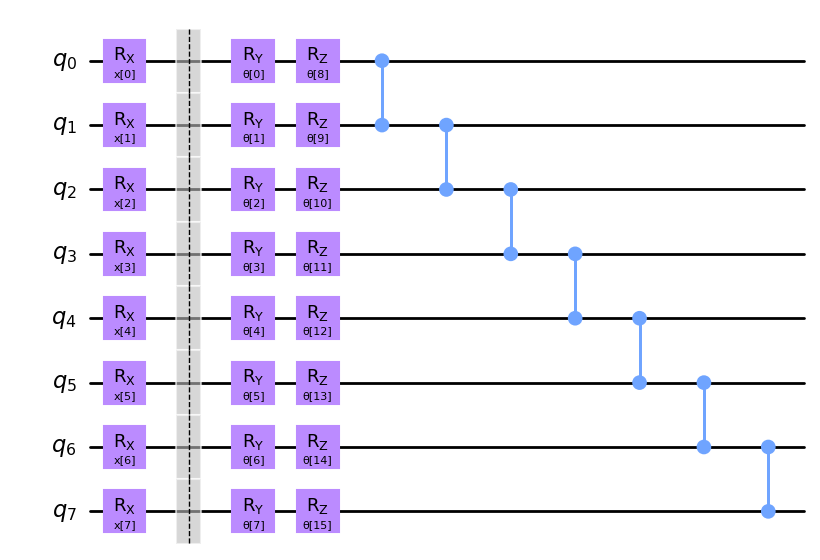

In [13]:
temp_qc = feature_map.copy()
temp_qc.barrier()
temp_qc.compose(ansatz, inplace=True)
temp_qc.draw('mpl')

In [14]:
class Net(torch.nn.Module):
    """Feedfoward neural network with 1 hidden layer"""

    def __init__(self, qnn, **kwargs):
        super().__init__()
        self.qnn = TorchConnector(qnn, **kwargs)
        self.loss_func = torch.nn.BCELoss()

    def forward(self, x):
        # Rescale output to lie between 0 and 1 instead of −1 and 1
        return torch.clamp((self.qnn(x) + 1) / 2, min=0.0, max=1.0)

    def training_step(self, batch):
        images, labels = batch
        out = self(images)  # Generate predictions
        loss = self.loss_func(out, labels.view(-1, 1))  # Calculate loss
        return loss


### Phase 1

In [15]:
from qiskit_algorithms.gradients import ReverseEstimatorGradient

num_weights = len(weight_params)

# We use qiskit-qulacs to run qiskit circuits on qulacs backend
# This speeds up the training process

estimator = Estimator()
gradient = ReverseEstimatorGradient(estimator)

n_qubits = ansatz.num_qubits
main_qc = QuantumCircuit(n_qubits)

assert feature_map.num_qubits == ansatz.num_qubits
main_qc.compose(feature_map, range(n_qubits), inplace=True)

residual_qc = main_qc.copy()  # used in Phase II

layer_params = []  # stores the parameters of layers
layer_param_values = []  # stores the corresponding parameter values

losses = []

s = time()

for layer_id in range(n_layer_steps):
    print("\nLayer:", layer_id)

    qc = QuantumCircuit(n_qubits)
    temp_params = []

    # Append layers
    for i in range(n_layers_to_add):
        params = ParameterVector(f"θ_{layer_id}_{i}", num_weights)
        qc.compose(
            ansatz.assign_parameters(dict(zip(weight_params, params))),
            range(n_qubits),
            inplace=True,
        )
        temp_params.append(params)

    # Parameter and its values for current layer
    # we perform a small deviation from all zeros
    temp_params = np.asarray(temp_params).flatten()
    temp_init = np.zeros(temp_params.shape) + 0.001

    main_qc.compose(qc, range(n_qubits), inplace=True)
    residual_qc.compose(qc, range(n_qubits), inplace=True)
    residual_qc.barrier()

    layer_params.append(temp_params)

    # Freeze all parameters before `n_layers_to_train`
    # To perform the freezing, we bind the parameter values
    # and keep only the trainable parameters for `n_layers_to_train` layers
    if layer_id >= n_layers_to_train:
        freeze_params = layer_params[-n_layers_to_train - 1]
        index = num_weights * n_layers_to_add * (n_layers_to_train - 1)
        freeze_param_values = layer_param_values[-index - num_weights *
                                                 n_layers_to_add:-index]
        main_qc = main_qc.bind_parameters(
            dict(zip(freeze_params, freeze_param_values)))
        initial_point = np.concatenate(
            (layer_param_values[-index:], temp_init))
        initial_params = np.asarray(
            layer_params[-n_layers_to_train:]).flatten()
    else:
        initial_point = np.concatenate((layer_param_values, temp_init))
        initial_params = np.asarray(layer_params).flatten()

    qnn = EstimatorQNN(
        estimator=estimator,
        circuit=main_qc,
        input_params=input_params,
        weight_params=initial_params,
        gradient=gradient,
        input_gradients=False,
    )

    # Model and Training
    model = Net(qnn, initial_weights=initial_point)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    epochs = 20  # Set number of epochs
    loss_list = []  # Store loss history
    model.train()  # Set model to training mode

    for epoch in range(epochs):
        total_loss = []
        for batch in train_dataloader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            total_loss.append(loss.item())  # Store loss
        loss_list.append(sum(total_loss) / len(total_loss))
        print("Training [{:.0f}%]\tLoss: {:.4f}".format(
            100.0 * (epoch + 1) / epochs, loss_list[-1]))

    losses.append(loss_list)

    # Extract the current weights and store them
    with torch.no_grad():
        weights = [param for param in model.parameters()][0].numpy()

    if layer_id >= n_layers_to_train:
        layer_param_values = np.concatenate((layer_param_values, temp_init))
        index = num_weights * n_layers_to_add * n_layers_to_train
        layer_param_values[-index:] = weights.copy()
    else:
        layer_param_values = weights.copy()

e = time()
print("\nDuration {:.4f} s".format(e - s))




Layer: 0


/home/obm/Prog/miniconda3/envs/Phys710/lib/python3.8/site-packages/qiskit_algorithms/gradients/base/base_estimator_gradient.py:254: ComplexWarning: Casting complex values to real discards the imaginary part
  gradient[i] += (


Training [5%]	Loss: 0.7069
Training [10%]	Loss: 0.6924
Training [15%]	Loss: 0.6742
Training [20%]	Loss: 0.6497
Training [25%]	Loss: 0.6265
Training [30%]	Loss: 0.6072
Training [35%]	Loss: 0.5916
Training [40%]	Loss: 0.5644
Training [45%]	Loss: 0.5293
Training [50%]	Loss: 0.4779
Training [55%]	Loss: 0.4446
Training [60%]	Loss: 0.4232
Training [65%]	Loss: 0.4097
Training [70%]	Loss: 0.4077
Training [75%]	Loss: 0.3970
Training [80%]	Loss: 0.3960
Training [85%]	Loss: 0.3990
Training [90%]	Loss: 0.3921
Training [95%]	Loss: 0.3931
Training [100%]	Loss: 0.3859

Layer: 1
Training [5%]	Loss: 0.3898
Training [10%]	Loss: 0.3741
Training [15%]	Loss: 0.3498
Training [20%]	Loss: 0.3380
Training [25%]	Loss: 0.3285
Training [30%]	Loss: 0.3265
Training [35%]	Loss: 0.3250
Training [40%]	Loss: 0.3252
Training [45%]	Loss: 0.3215
Training [50%]	Loss: 0.3238
Training [55%]	Loss: 0.3280
Training [60%]	Loss: 0.3182
Training [65%]	Loss: 0.3201
Training [70%]	Loss: 0.3246
Training [75%]	Loss: 0.3203
Training [8

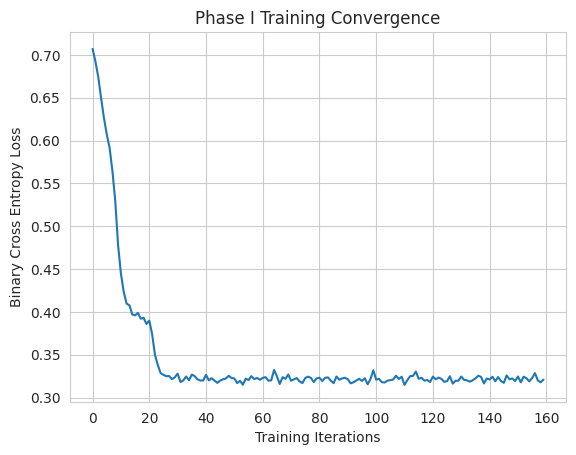

In [16]:
# Plot loss convergence
plt.plot(np.array(losses).flatten())
plt.title("Phase I Training Convergence")
plt.xlabel("Training Iterations")
plt.ylabel("Binary Cross Entropy Loss")
plt.show()

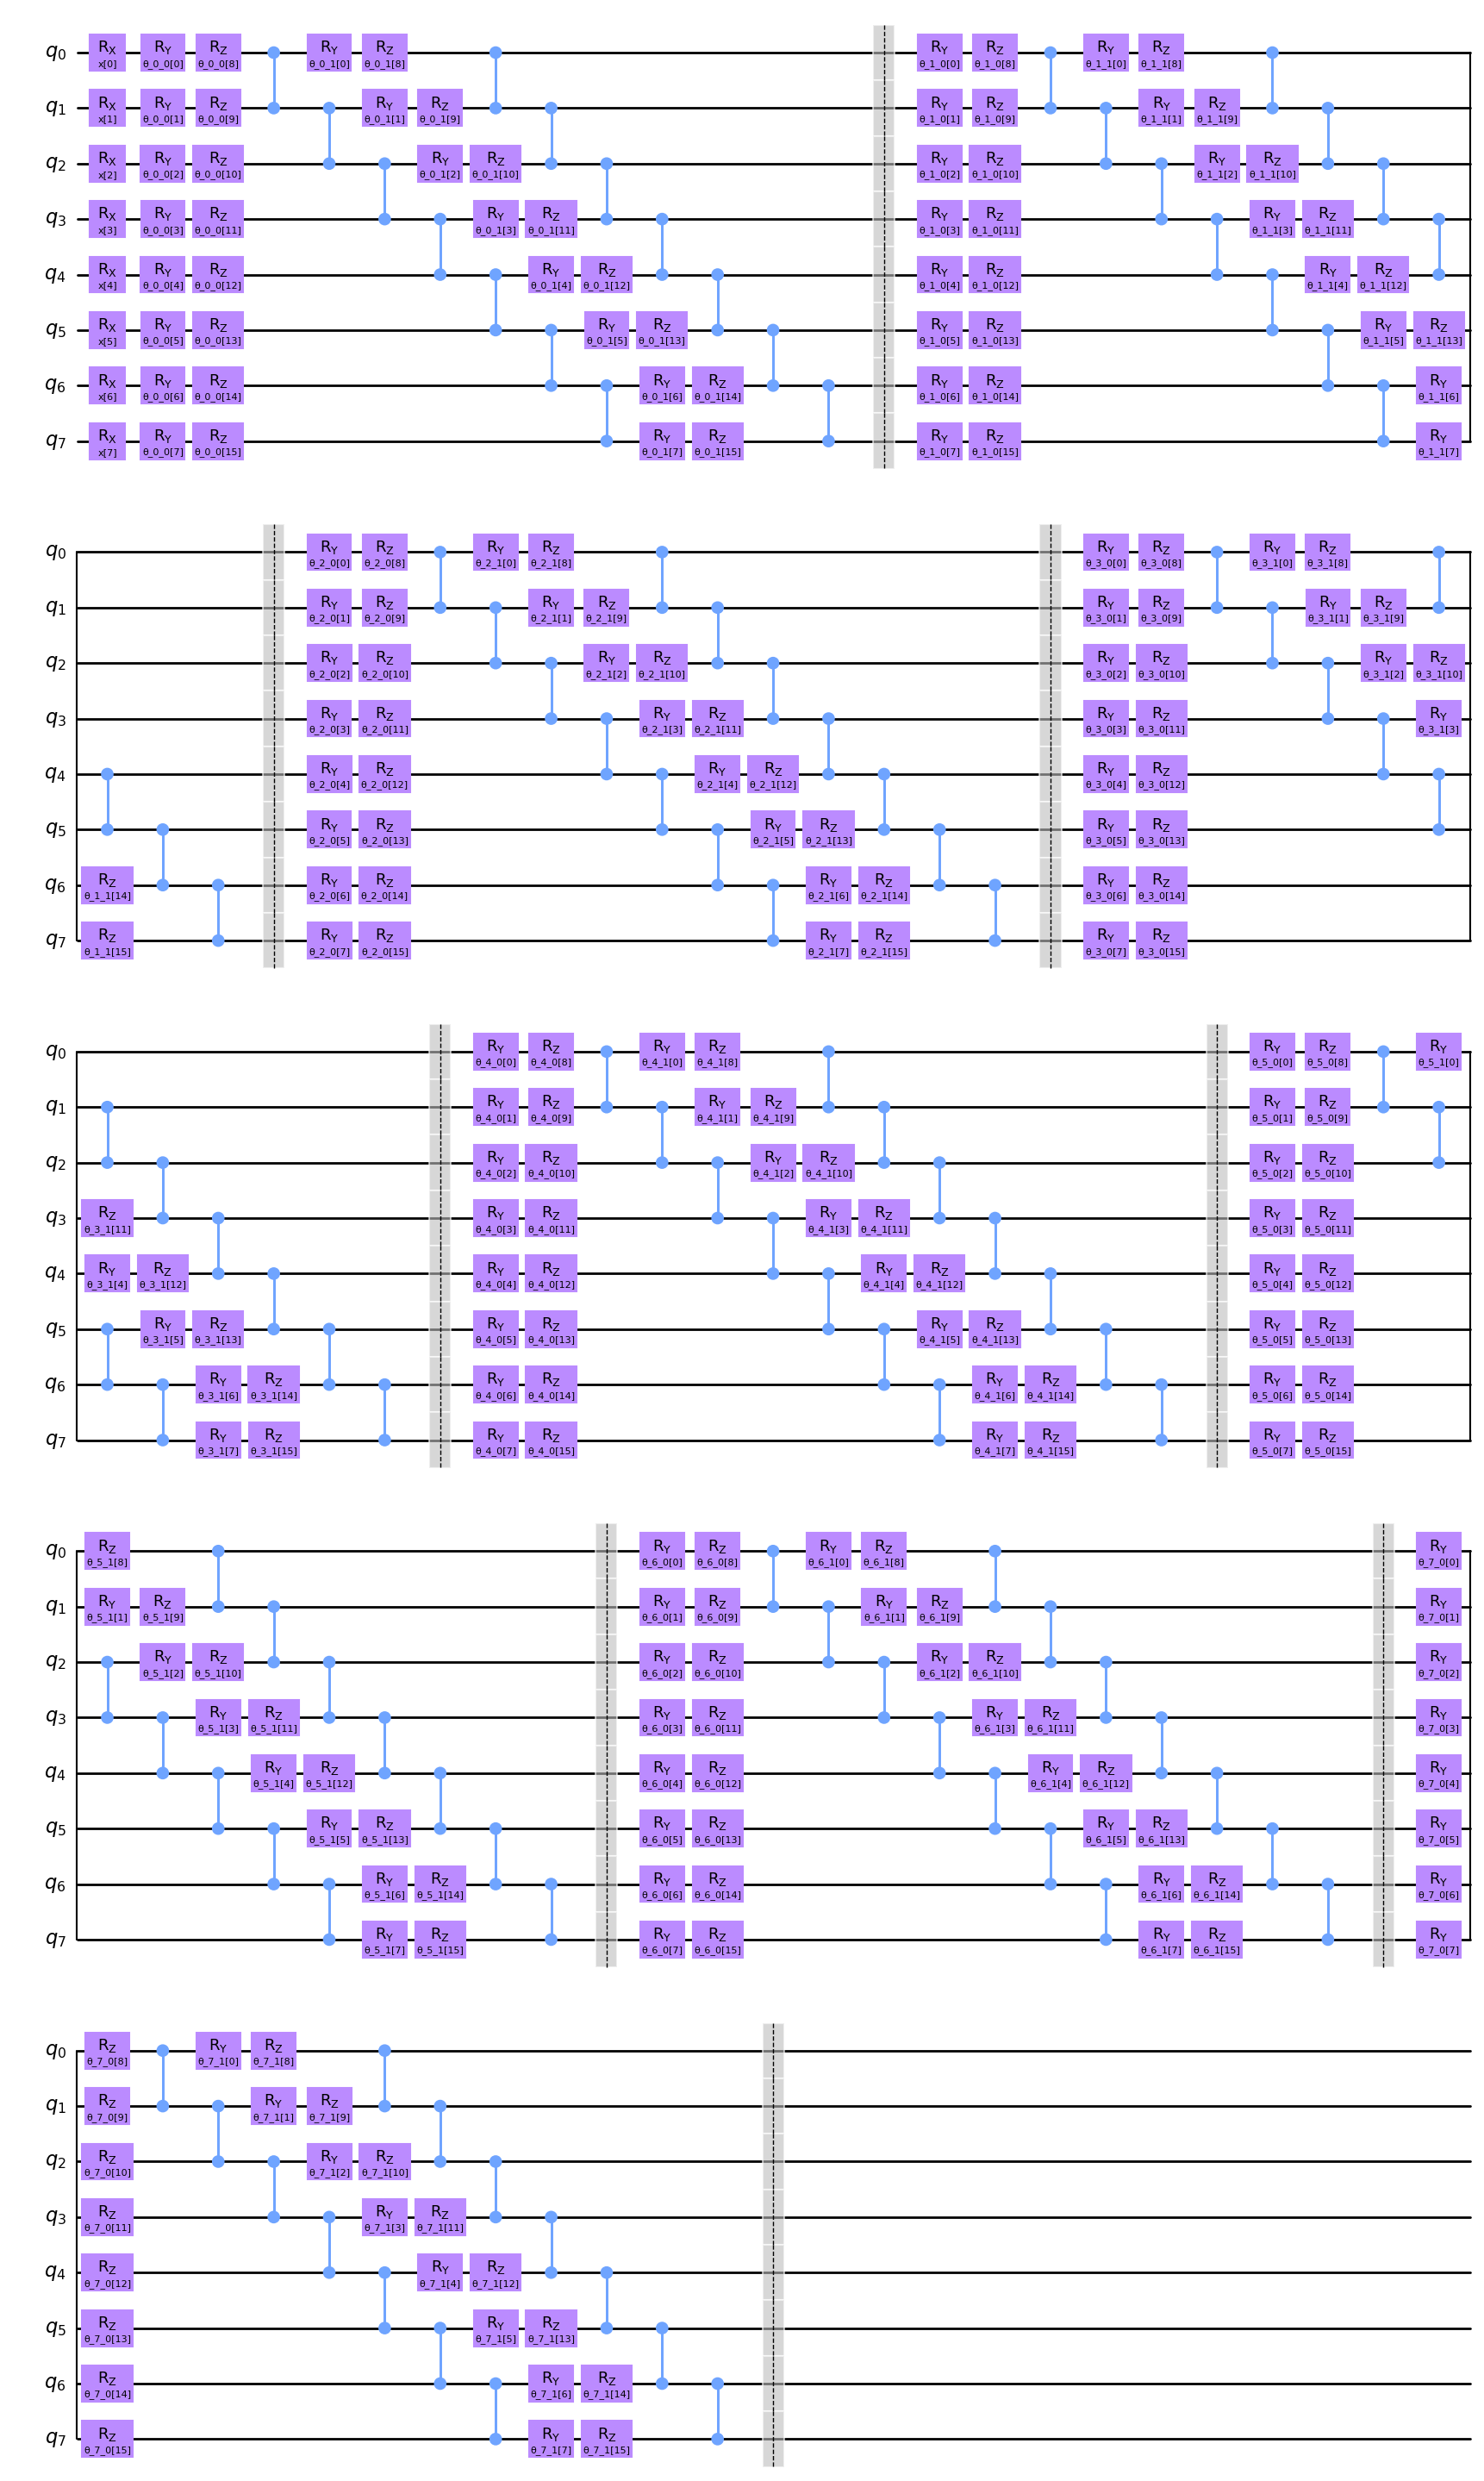

In [17]:
residual_qc.draw('mpl')

### Phase 2 

In [18]:
qc = residual_qc.copy()

# Number of weights in the first partition
n_p1_weights = int(len(layer_param_values) * partition_percentage)

# Partition 1 weights
p1_weights = dict(
    zip(
        np.asarray(layer_params).flatten()[:n_p1_weights],
        layer_param_values[:n_p1_weights],
    ))

# Partition 2 weights
p2_weights = dict(
    zip(
        np.asarray(layer_params).flatten()[n_p1_weights:],
        layer_param_values[n_p1_weights:],
    ))

losses2 = []

s = time()

print("\nSweep over partitions\n")
for sweep in range(n_sweeps):
    # configure and train first partition
    print("\nSweep {}, partition 1\n".format(sweep))

    # Freeze the partition 2 weights
    train_qc = qc.bind_parameters(p2_weights)

    # Train only partition 1 weights
    qnn = EstimatorQNN(
        estimator=estimator,
        circuit=train_qc,
        input_params=input_params,
        weight_params=list(p1_weights.keys()),
        gradient=gradient,
        input_gradients=True,
    )

    model = Net(qnn, initial_weights=list(p1_weights.values()))
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

    epochs = 20  # Set number of epochs
    loss_list = []  # Store loss history
    model.train()  # Set model to training mode

    for epoch in range(epochs):
        total_loss = []
        for batch in train_dataloader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            total_loss.append(loss.item())  # Store loss
        loss_list.append(sum(total_loss) / len(total_loss))
        print("Training [{:.0f}%]\tLoss: {:.4f}".format(
            100.0 * (epoch + 1) / epochs, loss_list[-1]))

    losses.append(loss_list)

    with torch.no_grad():
        trained_weights = [param for param in model.parameters()][0].numpy()

    p1_weights = {
        key: value
        for key, value in zip(p1_weights.keys(), trained_weights)
    }

    # configure and train second partition
    print("\nSweep {}, partition 2\n".format(sweep))

    # Freeze the partition 1 weights
    train_qc = qc.bind_parameters(p1_weights)

    # Train only partition 2 weights
    qnn = EstimatorQNN(
        estimator=estimator,
        circuit=train_qc,
        input_params=input_params,
        weight_params=list(p2_weights.keys()),
        gradient=gradient,
        input_gradients=True,
    )

    model = Net(qnn, initial_weights=list(p2_weights.values()))
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

    epochs = 20  # Set number of epochs
    loss_list = []  # Store loss history
    model.train()  # Set model to training mode

    for epoch in range(epochs):
        total_loss = []
        for batch in train_dataloader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            total_loss.append(loss.item())  # Store loss
        loss_list.append(sum(total_loss) / len(total_loss))
        print("Training [{:.0f}%]\tLoss: {:.4f}".format(
            100.0 * (epoch + 1) / epochs, loss_list[-1]))

    losses2.append(loss_list)

    with torch.no_grad():
        trained_weights = [param for param in model.parameters()][0].numpy()

    p2_weights = {
        key: value
        for key, value in zip(p2_weights.keys(), trained_weights)
    }

e = time()

print("\nDuration {:.4f} s".format(e - s))


Sweep over partitions


Sweep 0, partition 1
Training [5%]	Loss: 0.3233
Training [10%]	Loss: 0.3206
Training [15%]	Loss: 0.3256
Training [20%]	Loss: 0.3249
Training [25%]	Loss: 0.3195
Training [30%]	Loss: 0.3201
Training [35%]	Loss: 0.3165
Training [40%]	Loss: 0.3210
Training [45%]	Loss: 0.3186
Training [50%]	Loss: 0.3226
Training [55%]	Loss: 0.3152
Training [60%]	Loss: 0.3158
Training [65%]	Loss: 0.3229
Training [70%]	Loss: 0.3157
Training [75%]	Loss: 0.3189
Training [80%]	Loss: 0.3222
Training [85%]	Loss: 0.3203
Training [90%]	Loss: 0.3163
Training [95%]	Loss: 0.3175
Training [100%]	Loss: 0.3182

Sweep 0, partition 2
Training [5%]	Loss: 0.3169
Training [10%]	Loss: 0.3140
Training [15%]	Loss: 0.3172
Training [20%]	Loss: 0.3126
Training [25%]	Loss: 0.3144
Training [30%]	Loss: 0.3191
Training [35%]	Loss: 0.3164
Training [40%]	Loss: 0.3177
Training [45%]	Loss: 0.3144
Training [50%]	Loss: 0.3169
Training [55%]	Loss: 0.3125
Training [60%]	Loss: 0.3195
Training [65%]	Loss: 0.3164
Training 

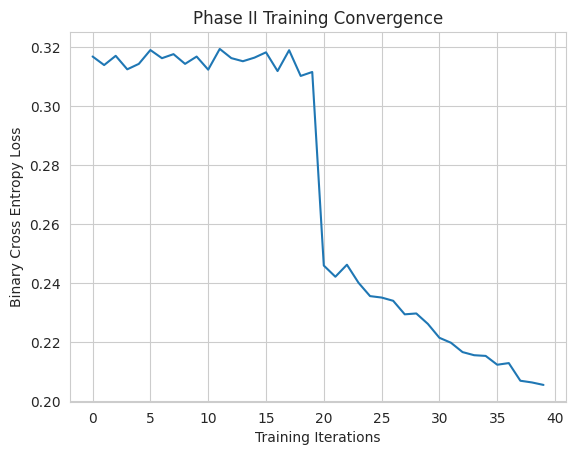

In [19]:
# Plot loss convergence
plt.plot(np.array(losses2).flatten())
plt.title("Phase II Training Convergence")
plt.xlabel("Training Iterations")
plt.ylabel("Binary Cross Entropy Loss")
plt.show()

Text(0.5, 1.0, 'Phase II Training Convergence')

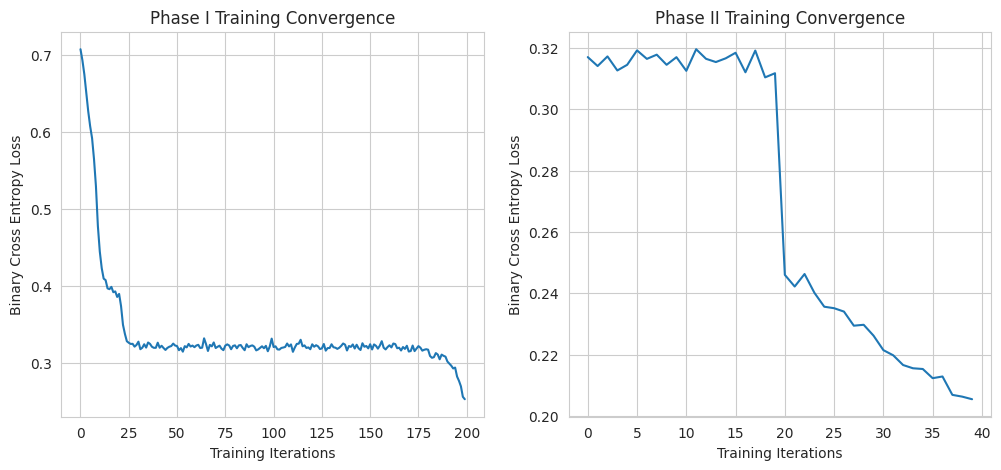

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(np.array(losses).flatten())
ax[0].set_xlabel("Training Iterations")
ax[0].set_ylabel("Binary Cross Entropy Loss")
ax[0].set_title("Phase I Training Convergence")

ax[1].plot(np.array(losses2).flatten())
ax[1].set_xlabel("Training Iterations")
ax[1].set_ylabel("Binary Cross Entropy Loss")
ax[1].set_title("Phase II Training Convergence")

In [21]:
def accuracy(outputs, labels):
    preds = outputs > 0.5
    return torch.tensor(
        torch.sum(preds == labels.view(-1, 1)).item() / len(preds))


def evaluate(model, loader):
    batch_accs = [accuracy(model(images), labels) for images, labels in loader]
    return torch.stack(batch_accs).mean().item()

In [22]:
predictions = []
targets = []

model.eval()
train_acc = evaluate(model, train_dataloader)
test_acc = evaluate(model, test_dataloader)

train_acc, test_acc

(0.9711538553237915, 0.9534609913825989)

# Training a Quantum Model on a Real Dataset

This tutorial will demonstrate how to train a quantum machine learning model to tackle a classification problem. Previous tutorials have featured small, artificial datasets. Here we will increase the problem complexity by considering a real-life classical dataset. We decided to pick a very well-known – albeit still relatively small – problem: the Iris flower dataset. This dataset even has its own Wikipedia [page](https://en.wikipedia.org/wiki/Iris_flower_data_set). Although the Iris dataset is well known to data scientists, we will briefly introduce it to refresh our memories. For comparison, we'll first train a classical counterpart to the quantum model.

So, let's get started:

- First, we'll load the dataset and explore what it looks like.
- Next, we'll train a classical model using [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from [scikit-learn](https://scikit-learn.org/) to see how well the classification problem can be solved using classical methods.
- After that, we'll introduce the Variational Quantum Classifier (VQC).
- To conclude, we'll compare the results obtained from both models.

## 1. Exploratory Data Analysis

First, let us explore the Iris dataset this tutorial will use and see what it contains. For our convenience, this [dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset) is available in scikit-learn and can be loaded easily.

In [23]:
from sklearn.datasets import load_iris

iris_data = load_iris()

If no parameters are specified in the `load_iris` function, then a dictionary-like object is returned by scikit-learn. Let's print the description of the dataset and see what is inside.

In [24]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

There are a few interesting observations we can find from this dataset description:

- There are 150 samples (instances) in the dataset.
- There are four features (attributes) in each sample.
- There are three labels (classes) in the dataset.
- The dataset is perfectly balanced, as there are the same number of samples (50) in each class.
- We can see features are not normalized, and their value ranges are different, e.g., $[4.3, 7.9]$ and $[0.1, 2.5]$ for sepal length and petal width, respectively. So, transforming the features to the same scale may be helpful.
- As stated in the table above, feature-to-class correlation in some cases is very high; this may lead us to think that our model should cope well with the dataset.

We only examined the dataset description, but additional properties are available in the `iris_data` object. Now we are going to work with features and labels from the dataset.

In [25]:
features = iris_data.data
labels = iris_data.target

Firstly, we'll normalize the features. Namely, we will apply a simple transformation to represent all features on the same scale. In our case, we squeeze all features onto the interval $[0, 1]$. Normalization is a common technique in machine learning and often leads to better numerical stability and convergence of an algorithm.

We can use `MinMaxScaler` from scikit-learn to perform this. Without specifying parameters, this does exactly what is required: maps data onto $[0, 1]$.

In [26]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

Let's see how our data looks. We plot the features pair-wise to see if there's an observable correlation between them.

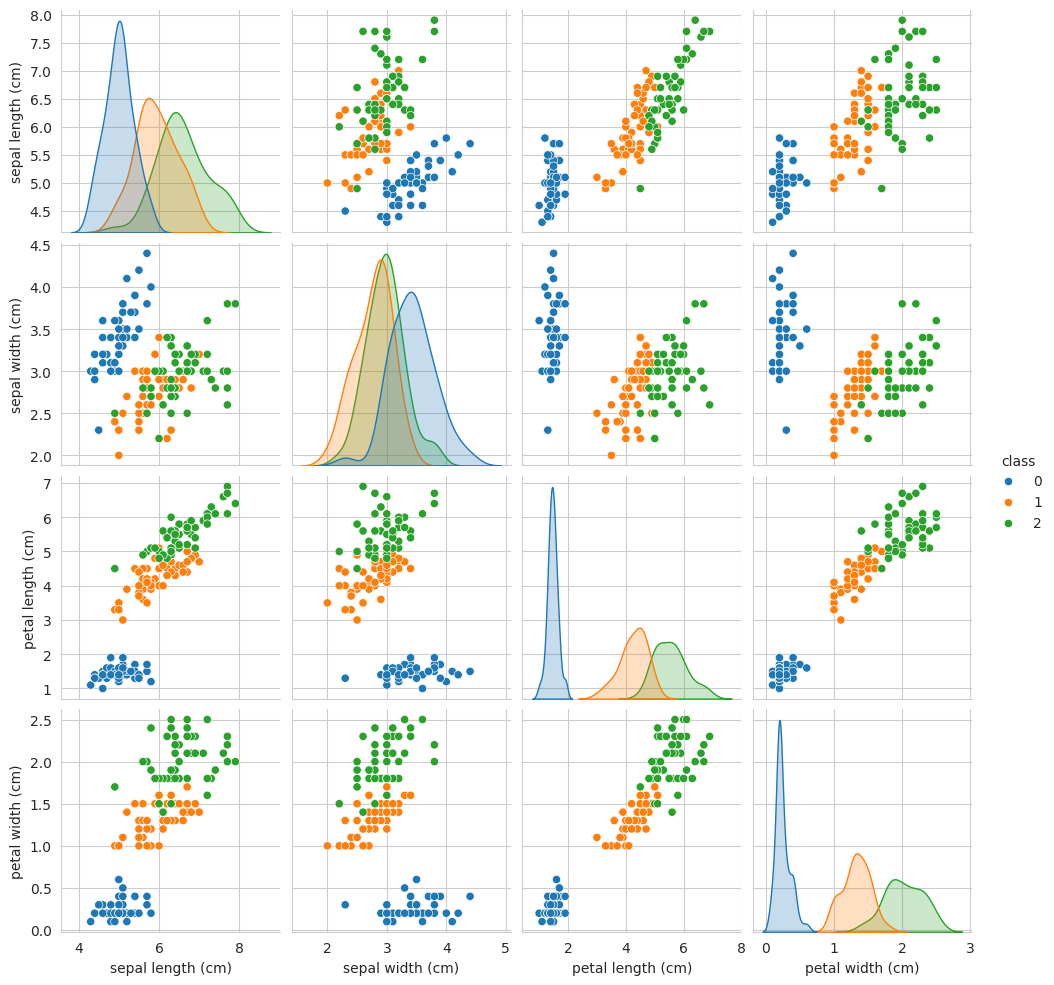

In [27]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["class"] = pd.Series(iris_data.target)

sns.pairplot(df, hue="class", palette="tab10")

From the plots, we see that class `0` is easily separable from the other two classes, while classes `1` and `2` are sometimes intertwined, especially regarding the "sepal width" feature.

Next, let's see how classical machine learning handles this dataset. 

## 2. Training a Classical Machine Learning Model

Before we train a model, we should split the dataset into two parts: a training dataset and a test dataset. We'll use the former to train the model and the latter to verify how well our models perform on unseen data.

As usual, we'll ask scikit-learn to do the boring job for us. We'll also fix the seed to ensure the results are reproducible.

In [28]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

We train a classical Support Vector Classifier from scikit-learn. For the sake of simplicity, we don't tweak any parameters and rely on the default values.

In [29]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(train_features, train_labels)  # suppress printing the return value

Now we check out how well our classical model performs. We will analyze the scores in the conclusion section.

In [30]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.99
Classical SVC on the test dataset:     0.97


As can be seen from the scores, the classical SVC algorithm performs very well. Next up, it's time to look at quantum machine learning models.

## 3. Training a Quantum Machine Learning Model

As an example of a quantum model, we'll train a variational quantum classifier (VQC). The VQC is the simplest classifier available in Qiskit Machine Learning and is a good starting point for newcomers to quantum machine learning who have a background in classical machine learning.

But before we train a model, let's examine what comprises the `VQC` class. Two of its central elements are the feature map and ansatz. What these are will now be explained.

Our data is classical, meaning it consists of a set of bits, not qubits. We need a way to encode the data as qubits. This process is crucial if we want to obtain an effective quantum model. We usually refer to this mapping as data encoding, data embedding, or data loading and this is the role of the feature map. While feature mapping is a common ML mechanism, this process of loading data into quantum states does not appear in classical machine learning as that only operates in the classical world.

Once the data is loaded, we must immediately apply a parameterized quantum circuit. This circuit is a direct analog to the layers in classical neural networks. It has a set of tunable parameters or weights. The weights are optimized such that they minimize an objective function. This objective function characterizes the distance between the predictions and known labeled data. A parameterized quantum circuit is also called a parameterized trial state, variational form, or ansatz. Perhaps, the latter is the most widely used term.

For more information, we direct the reader to the [Quantum Machine Learning Course](https://learn.qiskit.org/course/machine-learning).

Our choice of feature map will be the ``ZZFeatureMap``. The ``ZZFeatureMap`` is one of the standard feature maps in the Qiskit circuit library. We pass `num_features` as `feature_dimension`, meaning the feature map will have `num_features` or `4` qubits.

We decompose the feature map into its constituent gates to give the reader a flavor of how feature maps may look.

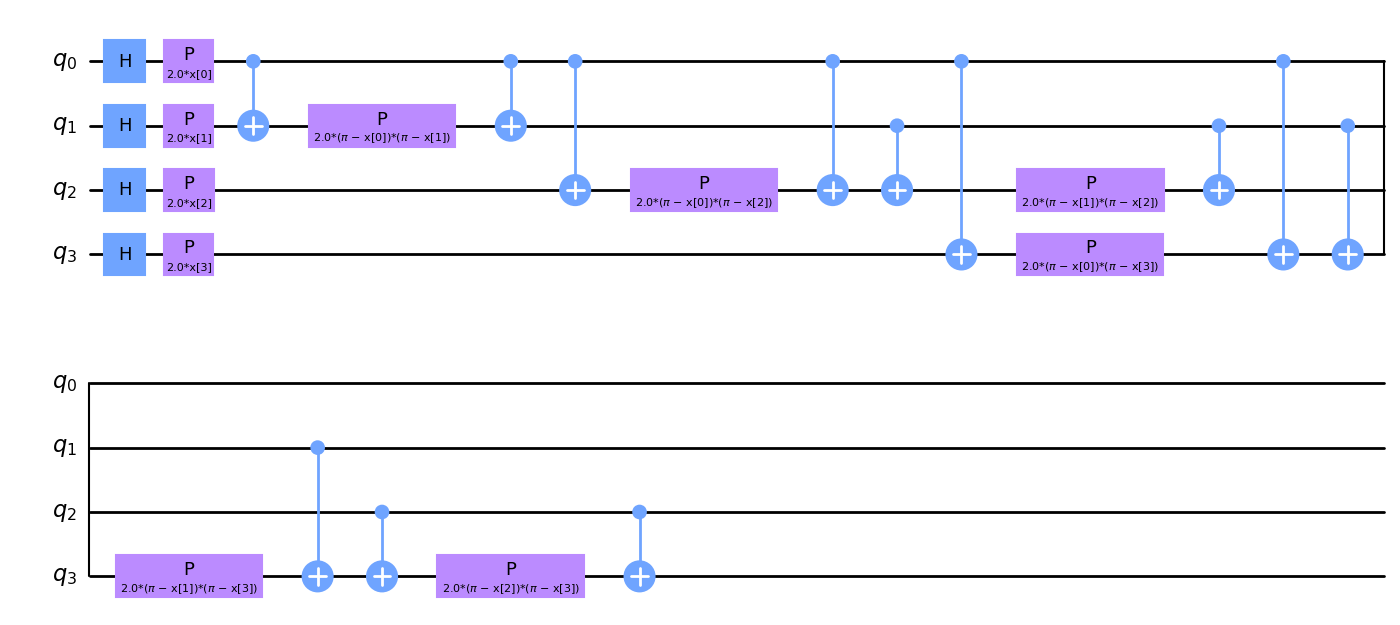

In [31]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

If you look closely at the feature map diagram, you will notice parameters `x[0], ..., x[3]`. These are placeholders for our features.

Now we create and plot our ansatz. Pay attention to the repetitive structure of the ansatz circuit. We define the number of these repetitions using the `reps` parameter.

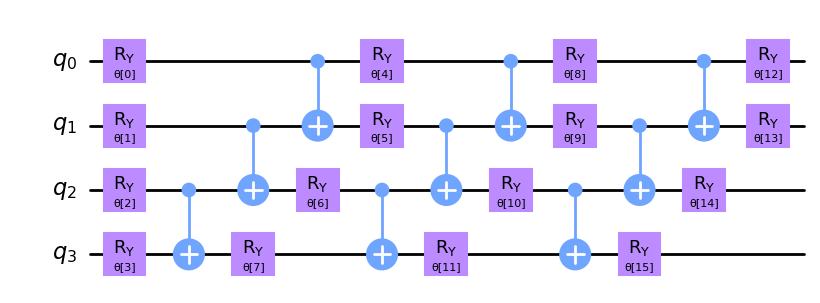

In [32]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

This circuit has 16 parameters named `θ[0], ..., θ[15]`. These are the trainable weights of the classifier.

We then choose an optimization algorithm to use in the training process. This step is similar to what you may find in classical deep learning frameworks. To make the training process faster, we choose a gradient-free optimizer. You may explore other optimizers available in Qiskit.

In [33]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In the next step, we define where to train our classifier. We can train on a simulator or a real quantum computer. Here, we will use a simulator. We create an instance of the `Sampler` primitive. This is the reference implementation that is statevector based. Using qiskit runtime services you can create a sampler that is backed by a quantum computer.

In [34]:
from qiskit.primitives import Sampler

sampler = Sampler()

We will add a callback function called `callback_graph`. `VQC` will call this function for each evaluation of the objective function with two parameters: the current weights and the value of the objective function at those weights. Our callback will append the value of the objective function to an array so we can plot the iteration versus the objective function value. The callback will update the plot at each iteration. Note that you can do whatever you want inside a callback function, so long as it has the two-parameter signature we mentioned above.

In [35]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

Now we are ready to construct the classifier and fit it. 

`VQC` stands for "variational quantum classifier." It takes a feature map and an ansatz and constructs a quantum neural network automatically. In the simplest case it is enough to pass the number of qubits and a quantum instance to construct a valid classifier. You may omit the `sampler` parameter, in this case a `Sampler` instance will be created for you in the way we created it earlier. We created it manually for illustrative purposes only.

Training may take some time. Please, be patient.

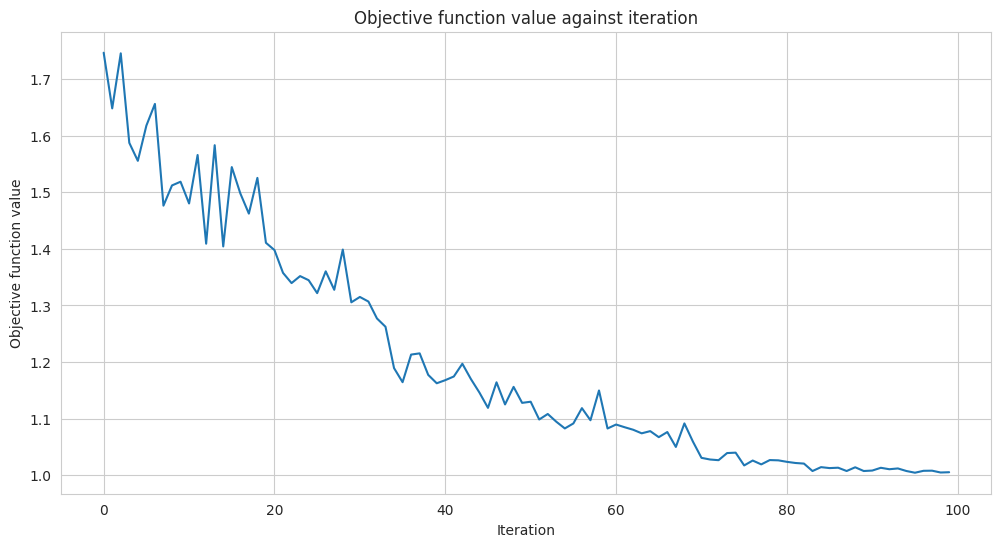

Training time: 72 seconds


In [36]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

Let's see how the quantum model performs on the real-life dataset.

In [37]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.85
Quantum VQC on the test dataset:     0.87


As we can see, the scores are high, and the model can be used to predict labels on unseen data.

Now let's see what we can tune to get even better models.

- The key components are the feature map and the ansatz. You can tweak parameters. In our case, you may change the `reps` parameter that specifies how repetitions of a gate pattern we add to the circuit. Larger values lead to more entanglement operations and more parameters. Thus, the model can be more flexible, but the higher number of parameters also adds complexity, and training such a model usually takes more time. Furthermore, we may end up overfitting the model. You can try the other feature maps and ansatzes available in the [Qiskit circuit library](https://qiskit.org/documentation/apidoc/circuit_library.html#n-local-circuits), or you can come up with custom circuits.
- You may try other optimizers. Qiskit contains a bunch of them. Some of them are gradient-free, others not. If you choose a gradient-based optimizer, e.g., `L_BFGS_B`, expect the training time to increase. Additionally to the objective function, these optimizers must evaluate the gradient with respect to the training parameters, which leads to an increased number of circuit executions per iteration.
- Another option is to randomly (or deterministically) sample `initial_point` and fit the model several times.

But what if a dataset contains more features than a modern quantum computer can handle? Recall, in this example, we had the same number of qubits as the number of features in the dataset, but this may not always be the case.

## 4. Reducing the Number of Features

In this section, we reduce the number of features in our dataset and train our models again. We'll move through faster this time as the steps are the same except for the first, where we apply a PCA transformation. 

We transform our four features into two features only. This dimensionality reduction is for educational purposes only. As you saw in the previous section, we can train a quantum model using all four features from the dataset.

Now, we can easily plot these two features on a single figure.

<Axes: >

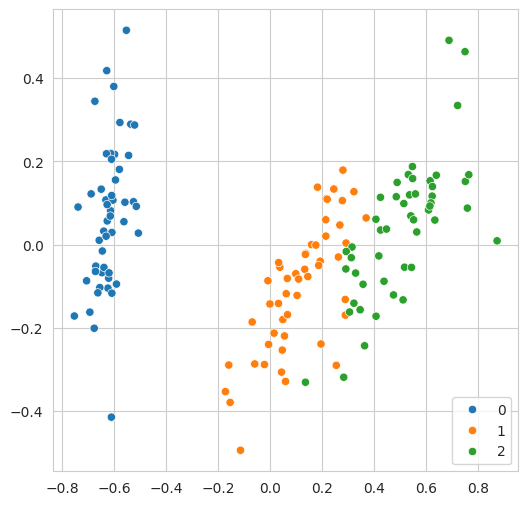

In [38]:
from sklearn.decomposition import PCA

features = PCA(n_components=2).fit_transform(features)

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=labels, palette="tab10")

As usual, we split the dataset first, then fit a classical model.

In [39]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

svc.fit(train_features, train_labels)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}")

Classical SVC on the training dataset: 0.97
Classical SVC on the test dataset:     0.90


The results are still good but slightly worse compared to the initial version. Let's see how a quantum model deals with them. As we now have two qubits, we must recreate the feature map and ansatz.

In [40]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

We also reduce the maximum number of iterations we run the optimization process for, as we expect it to converge faster because we now have fewer qubits.

In [41]:
optimizer = COBYLA(maxiter=40)

Now we construct a quantum classifier from the new parameters and train it. 

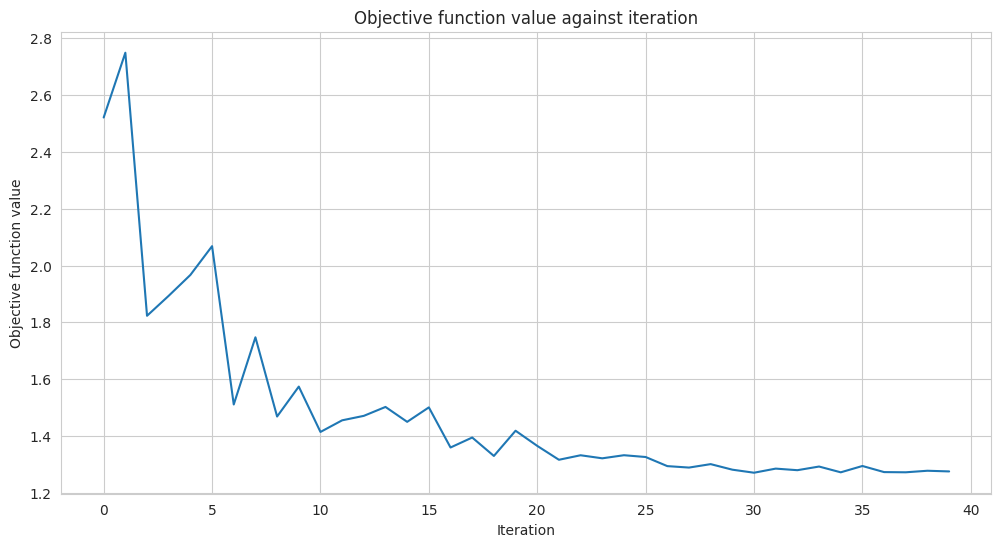

Training time: 16 seconds


In [42]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)


start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [43]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.58
Quantum VQC on the test dataset using RealAmplitudes:     0.63


Well, the scores are higher than a fair coin toss but could be better. The objective function is almost flat towards the end, meaning increasing the number of iterations won't help, and model performance will stay the same. Let's see what we can do with another ansatz.

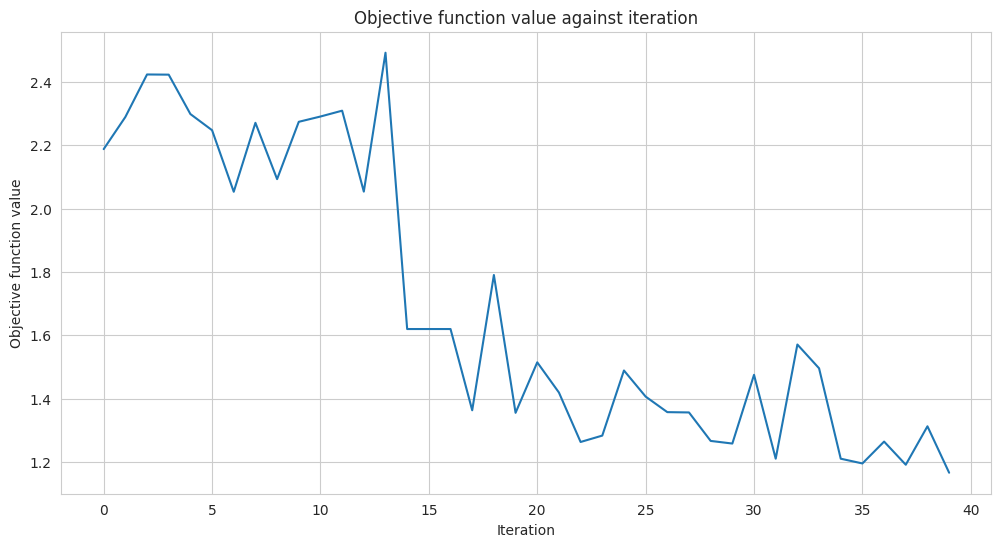

Training time: 19 seconds


In [44]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [45]:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.71
Quantum VQC on the test dataset using EfficientSU2:     0.67


The scores are better than in the previous setup. Perhaps if we had used more iterations, we could do even better.

## 5. Conclusion

In this tutorial, we have built two classical and three quantum machine learning models. Let's print an overall table with our results.

In [46]:
print(f"Model                           | Test Score | Train Score")
print(f"SVC, 4 features                 | {train_score_c4:10.2f} | {test_score_c4:10.2f}")
print(f"VQC, 4 features, RealAmplitudes | {train_score_q4:10.2f} | {test_score_q4:10.2f}")
print(f"----------------------------------------------------------")
print(f"SVC, 2 features                 | {train_score_c2:10.2f} | {test_score_c2:10.2f}")
print(f"VQC, 2 features, RealAmplitudes | {train_score_q2_ra:10.2f} | {test_score_q2_ra:10.2f}")
print(f"VQC, 2 features, EfficientSU2   | {train_score_q2_eff:10.2f} | {test_score_q2_eff:10.2f}")

Model                           | Test Score | Train Score
SVC, 4 features                 |       0.99 |       0.97
VQC, 4 features, RealAmplitudes |       0.85 |       0.87
----------------------------------------------------------
SVC, 2 features                 |       0.97 |       0.90
VQC, 2 features, RealAmplitudes |       0.58 |       0.63
VQC, 2 features, EfficientSU2   |       0.71 |       0.67


Unsurprisingly, the classical models perform better than their quantum counterparts, but classical ML has come a long way, and quantum ML has yet to reach that level of maturity. As we can see,  we achieved the best results using a classical support vector machine. But the quantum model trained on four features was also quite good. When we reduced the number of features, the performance of all models went down as expected. So, if resources permit training a model on a full-featured dataset without any reduction, you should train such a model. If not, you may expect to compromise between dataset size, training time, and score.

Another observation is that even a simple ansatz change can lead to better results. The two-feature model with the `EfficientSU2` ansatz performs better than the one with `RealAmplitudes`. That means the choice of hyperparameters plays the same critical role in quantum ML as in classical ML, and searching for optimal hyperparameters may take a long time. You may apply the same techniques we use in classical ML, such as random/grid or more sophisticated approaches.

### Do it after

Scikit learn offers tools for [generated datasets](https://scikit-learn.org/stable/datasets/sample_generators.html). Use VQC and VQR with generated regression and classification datasets in a python script. [Can you use other providers?](https://qiskit.org/providers). Can you implement Layerwise learning?   

# The Quantum Autoencoder

The goal of this tutorial is to build an Quantum Autoencoder, a circuit which can compress a quantum state onto a smaller amount of qubits, while retaining the information from the initial state.

Throughout this tutorial, we explain the architecture of a Quantum Autoencoder and how one can design and train such a system to compress and encode information. Following this discussion, we give two examples to demonstrate the capabilities of such a system to compress different quantum states, as well as the ability to compress images of zeros and ones. 

## 1. What is an Autoencoder?

A classical autoencoder (CAE) is a type of neural network architecture that is commonly used to efficiently compress and encode information from the input using of representation learning. Following compression, one can then uncompress the data through the use of a decoder. 

Typical autoencoders are commonly divided into three layers, as seen in Figure 1. 

![qae_fig1_wide.png](qae_fig1_wide.png)
Figure 1: Example of a Classical Autoencoder which includes the input, bottleneck and output layer.
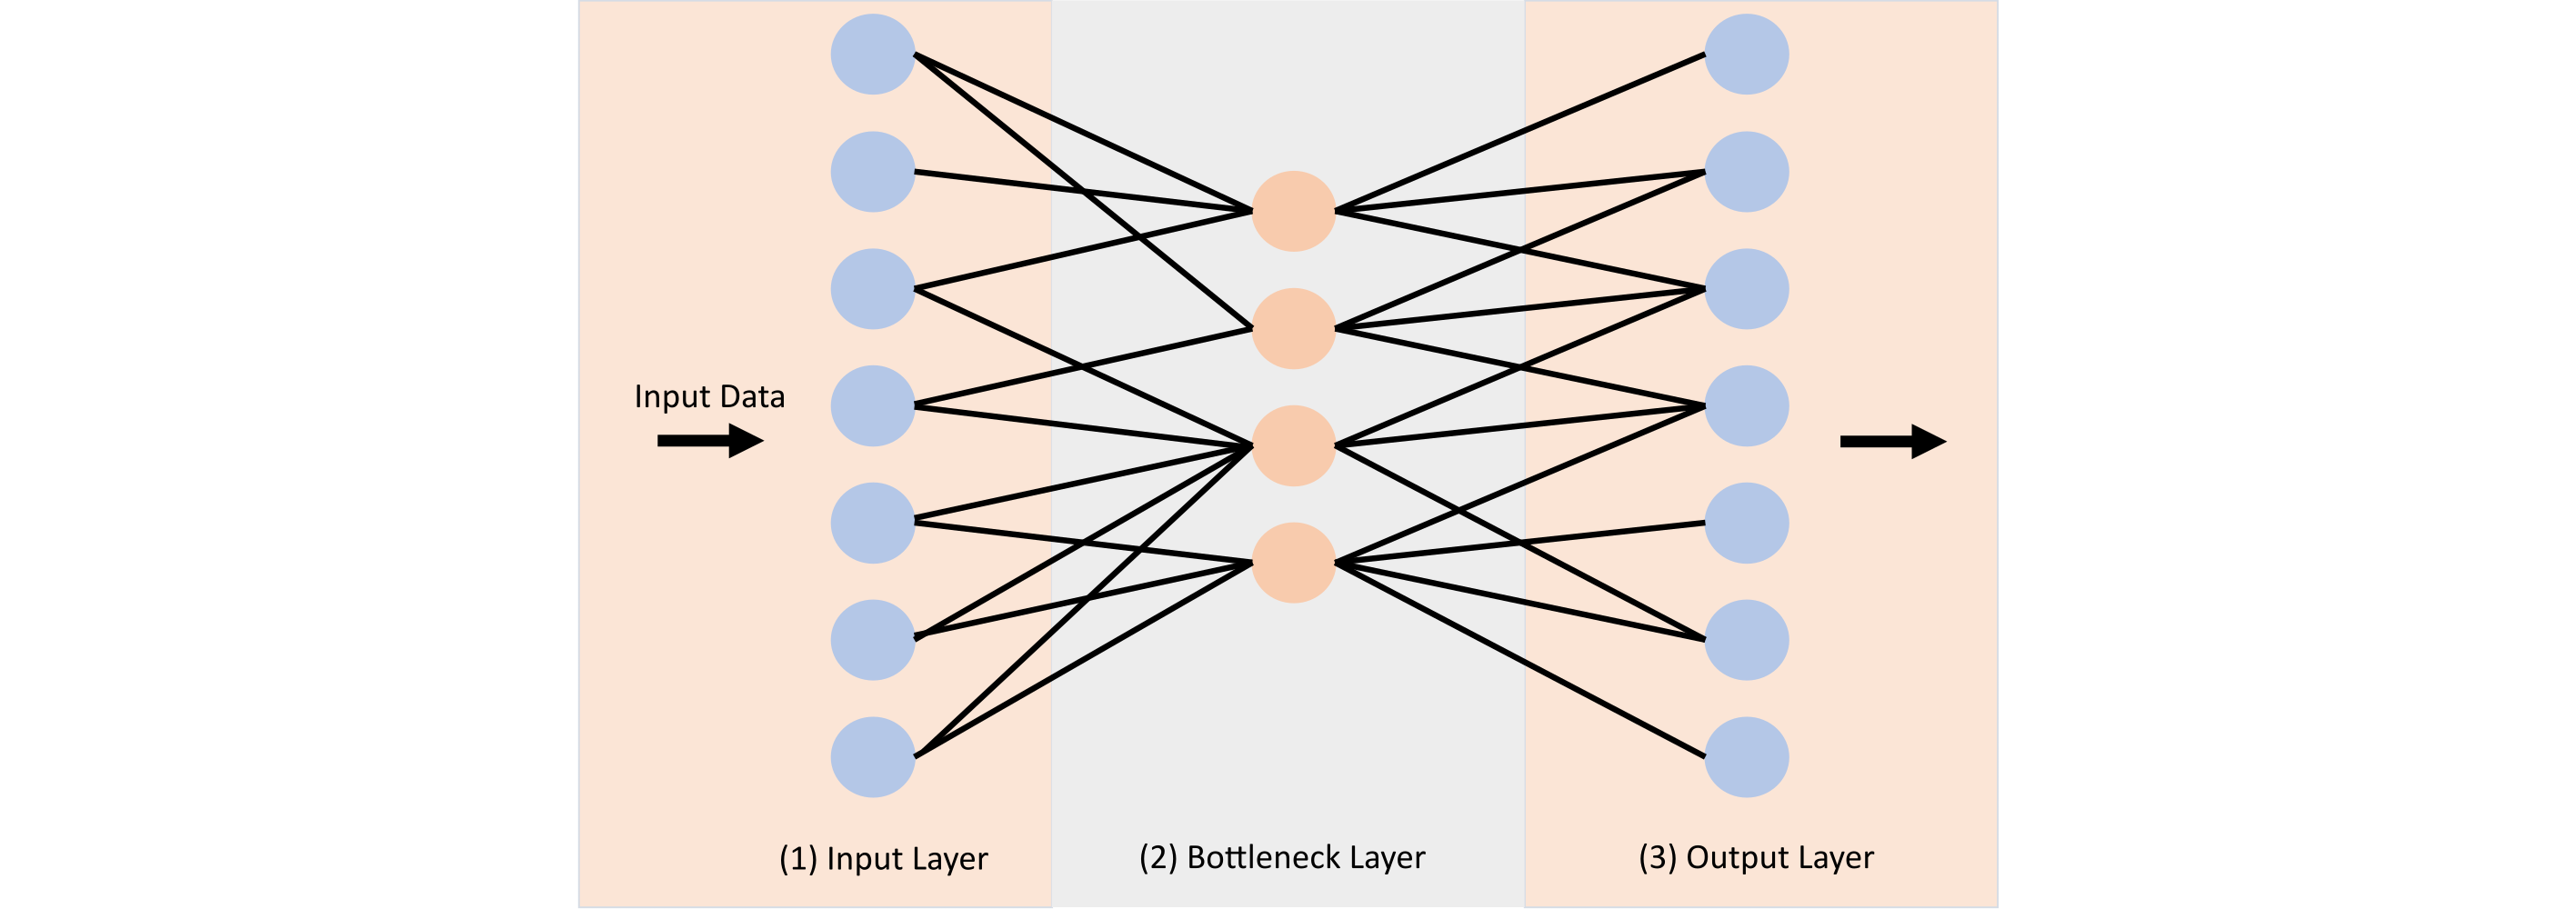

The first layer is called the Input Layer (1) and is the layer of which we input our data of length $n$. 

The input data then passes through an encoder and travels to the next layer, which has less nodes or is reduced in dimensions and is known as the Bottleneck Layer (2). The input layer is compressed through this process. Common CAEs may have several layers.

The final layer is called the Output Layer (3). Here the compressed data is reconstructed to its original size, $n$, from the compressed data through the process of a decoder. 

By passing our input data through a CAE, we are therefore able to reduce the dimensionality of our input data, as seen in the bottleneck layer, while retaining as much information as possible from the input data. Because of this feature, common uses of CAE are Image Denoising, Anomaly Detection and Facial Recognition devices. For more information on classical autoencoders, see [1].

## 2. The Quantum Autoencoder 

We can also define a quantum counterpart to the CAE, the Quantum Autoencoder. Much like the CAE, the Quantum Autoencoder aims to reduce the dimensionality of the input of the neural network, in this case a quantum state. A pictorial representation of this can be seen in Figure 2.

![qae_fig2_wide.png](qae_fig2_wide.png)
Figure 2: Pictorial Representation of a Quantum Autoencoder. Here one can see the similarities with the CAE, with the circuit having an input state, bottleneck state and an output state.
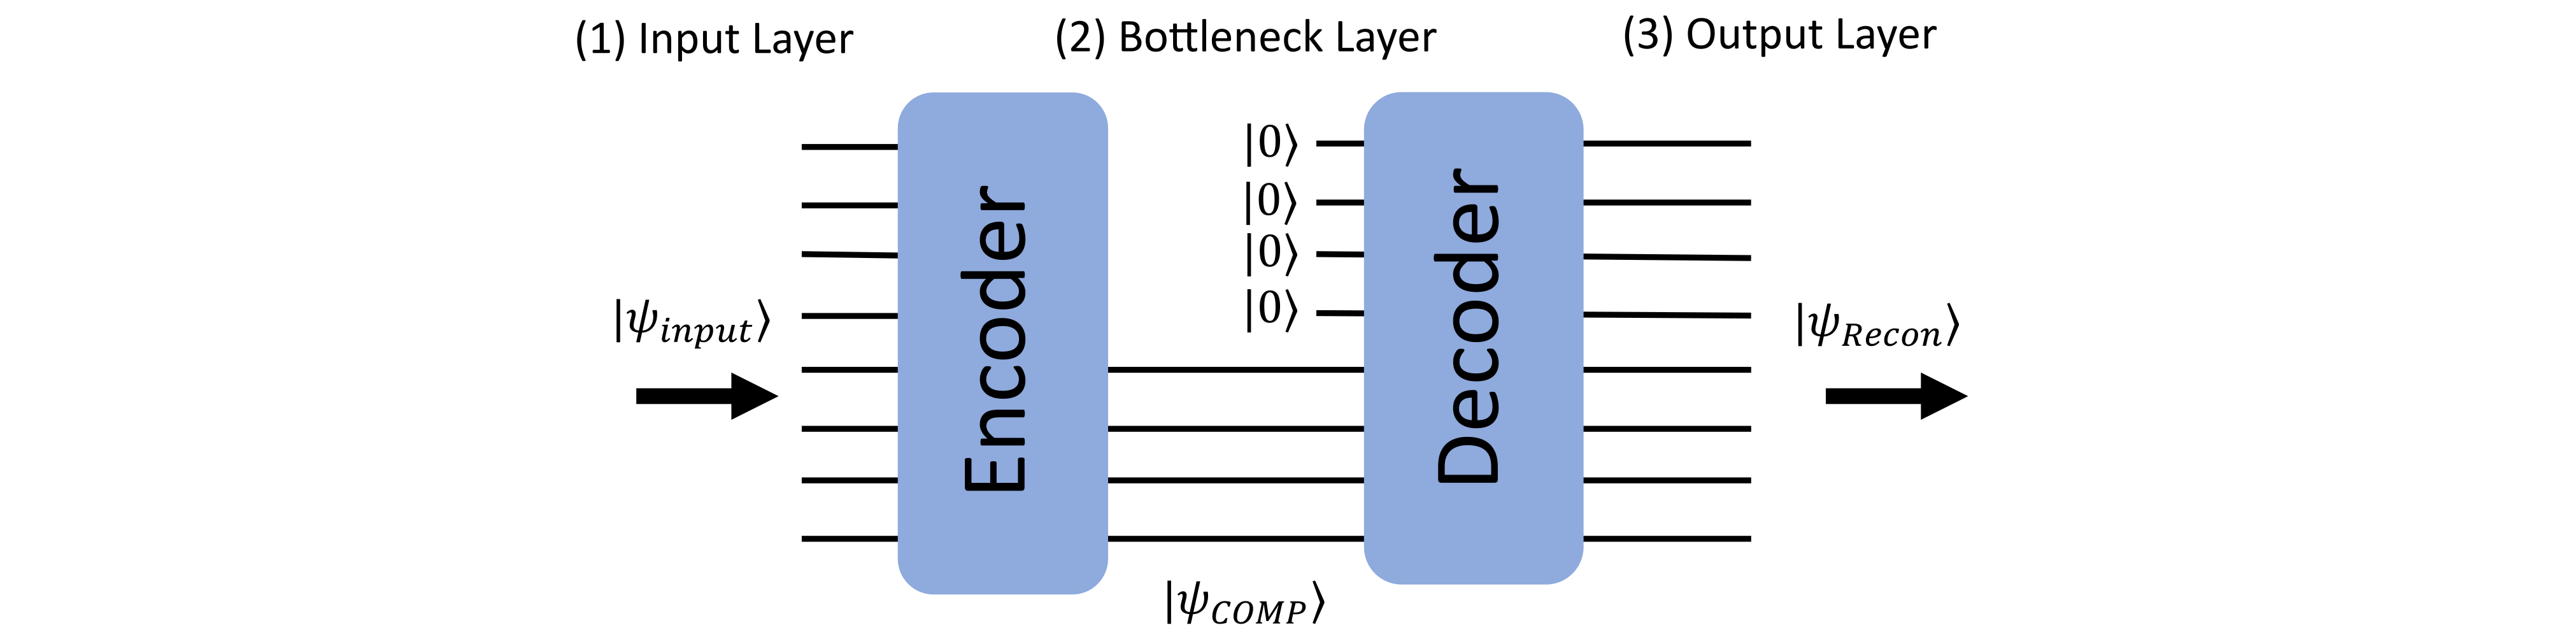

 

Much like its classical counterpart, our circuit contains three layers. We first input our state $|\psi>$ (which contains $n$ qubits), of which we wish to compress. This is our input layer (1). 

We then apply our parametrized circuit on our input state, which will act as our encoder and 'compresses' our quantum state, reducing the dimensionality of our state to $n-k$ qubits. Our new compressed state is of the form $|\psi_{comp}> \otimes |0>^{\otimes k}$, where $|\psi_{comp}>$ contains $n-k$ qubits. 

This parametrized circuit will depend on a set of parameters, which will be the nodes of our Quantum Autoencoder. Throughout the training process, these parameters will be updated to optimize the loss function. 

We disregard the remaining $k$ qubits for the remainder of the circuit. This is our bottleneck layer (2) and our input state is now compressed. 

The final layer consists of the addition of $k$ qubits (all in the state $|0\rangle$) and applying another parametrized circuit between the compressed state and the new qubits. This parametrized circuit acts as our decoder and reconstructs the input state from the compressed state using the new qubits. After the decoder, we retain the original state as the state travels to the output layer (3).

## 3. Components of a Quantum Autoencoder

Before building our Quantum Autoencoder, we must note a few subtleties.

We first note that we cannot introduce or disregard qubits in the middle of a Quantum Circuit when implementing an autoencoder using Qiskit. 

Because of this we must include our reference state as well as our auxiliary qubits (whose role will be described in later sections) at the beginning of the circuit. 

Therefore our input state will consist of our input state, reference state and one auxiliary qubit, as well as a classical register to perform measurements (which will be described in the next section). A pictorial representation of this can be seen in Figure 3. 

![qae_fig3_wide.png](qae_fig3_wide.png)
Figure 3: Pictorial Representation of input state of Quantum Autoencoder. Note that we must also include an auxiliary qubit, the reference state and classical register at the beginning of the circuit, even though they are not used until later in the circuit.
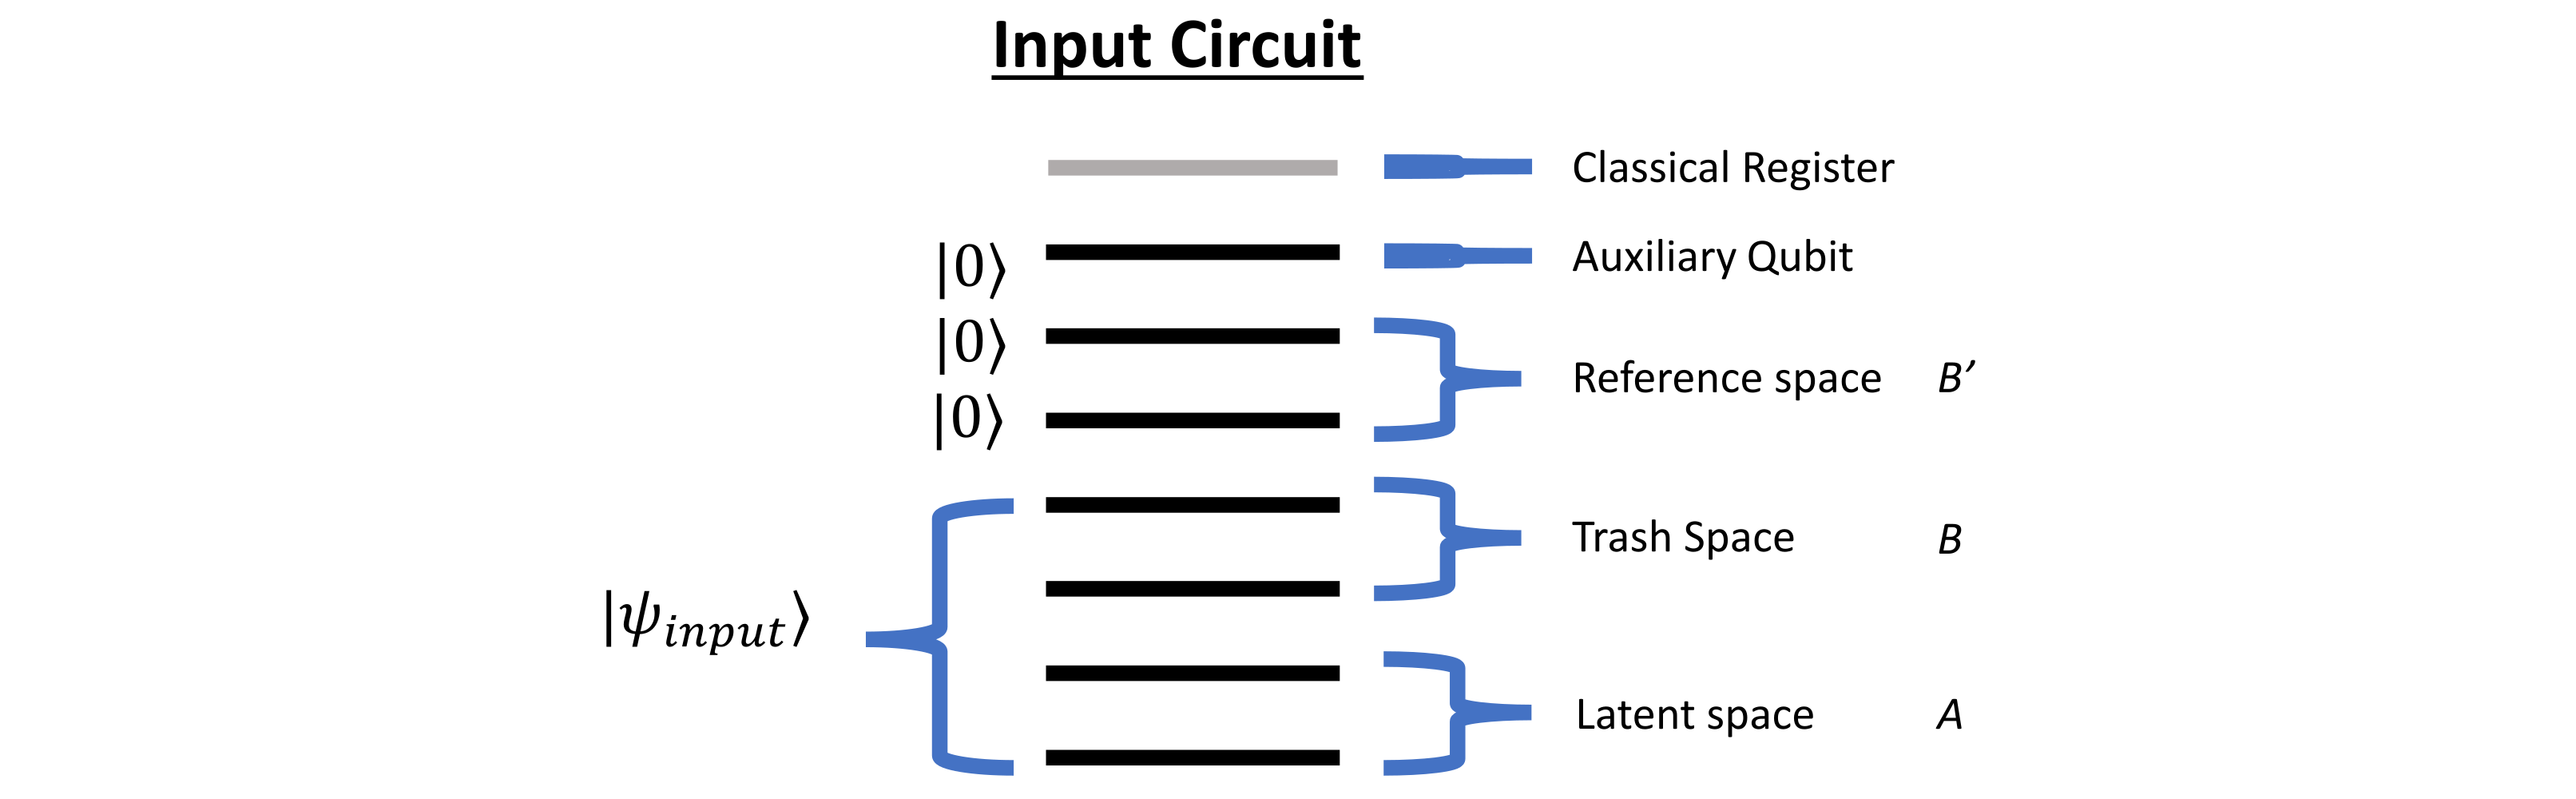

## 4. Choosing a Loss Function 

We now define our cost function, which we will use to train our Quantum Autoencoder, to return the input state. There's a bit of math involved here, so skip this section if you're not interested! 

We take the cost function as defined in [2], which tries to maximize the fidelity between the input and output state of our Quantum Autoencoder. 

We first define subsystems $A$ and $B$ to contain $n$ and $k$ qubits respectively, while $B'$ is the space which will contain our reference space. We call the subsystem $A$ our latent space, which will contain the compressed qubit state, and $B$ our trash space, which contain the qubits of which we disregard throughout compression. 

Our input state therefore $|\psi_{AB}>$ contains $n + k$ qubits. We define the reference space $B'$ which contains the reference state $|a>_{B'}$. This space will contain the additional $k$ qubits we use in the decoder. All of these subsystems can be seen in Figure 3. 

We define the parameterized circuit as $U(\theta)$ which we will use as our encoder. However the structure and parameters of our parametrized circuit is currently unknown to us and may vary for different input states. To determine the parameters to compress our input state, we must train our device to maximally compress the state by adjusting the values of the parameters $\theta$. For the decoder we will use $U^{\dagger}(\theta)$.

Our goal therefore is to maximize the fidelity between the input and output states, i.e.

$$\text{max }F(\psi_{AB}, \rho_{out})$$

where

$$\rho_{out} = U^{\dagger}(\theta)_{AB'} \text{Tr}_{B} [U(\theta)_{AB}[\psi_{AB} \otimes a_{B'}]U^{\dagger}(\theta)_{AB}]U(\theta)_{AB'}$$

We can maximize this fidelity by tuning the parameters $\theta$ in our parametrized circuit. However, this fidelity can at times be complicated to determine and may require a large amount of gates needed to calculate the fidelity between two states, i.e. the larger the number of qubits, the more gates required which results to deeper circuits.  Therefore we look for alternative means of comparing the input and output states. 

As shown in [2] a simpler way of determining an optimally compressed state is to perform a swap gate between the trash state and reference state. These states usually have a smaller number of qubits and are therefore easier to compare, due to the smaller amount of gates required. As shown in [2] maximizing the fidelity of such these two states is equivalent to maximizing the fidelity of the input and output state and thus determining an optimal compression of our input circuit. 

Keeping our reference state fixed, our cost function will now be a function of the trash state and is denoted as; 

$$\text{max }F(\text{Tr}_{A} [ U(\theta)_{AB}\psi_{AB} U^{\dagger}(\theta)_{AB}], a_{B'})$$

Throughout the training process, we adjust the parameters $\theta$ in our encoder and perform a swap test (as described below) to determine the fidelity between these trash and reference states. In doing so, we must include an additional qubit, our auxiliary qubit, which will be used throughout the swap test and measured to determine the overall fidelity of the trash and reference states. This is the reason why we included both an auxiliary qubit and classical register in the previous section when initializing our circuit.  

### The SWAP Test

The SWAP Test is a procedure commonly used to compare two states by applying CNOT gates to each qubit (for further information see [3]). By running the circuit $M$ times, and applying the SWAP test, we then measure the auxiliary qubit. We use the number of states in the state $|1\rangle$ to compute:

$$S = 1 - \frac{2}{M}L$$

where $L$ is the count for the states in the $|1\rangle$ state. As shown in [3], maximizing this function corresponds to the two states of which we are comparing being identical. We therefore aim to maximize this function, i.e. minimize  $\frac{2}{M}L$. This value will be therefore be our cost function.

## 5. Building the Quantum Autoencoder Ansatz

First, we implement IBM's Qiskit to build our Quantum Autoencoder. We first begin by importing in the necessary libraries and fixing the seed.

In [47]:
import json
import time
import warnings
import numpy as np
import math
import qiskit
from qiskit.visualization import plot_histogram

import matplotlib.pyplot as plt
from IPython.display import clear_output
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import Statevector
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit_machine_learning.neural_networks import SamplerQNN

from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.connectors import TorchConnector

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset


algorithm_globals.random_seed = 42

We begin by defining our parametrized ansatz for the Quantum Autoencoder. This will be our parametrized circuit where we can tune the parameters to maximize the fidelity between the trash and reference states. 

### The Parametrized Circuit 

The parametrized circuit we will use below for our encoder is the RealAmplitude Ansatz available in Qiskit. One of the reasons why we have chosen this ansatz is because it is a 2-local circuit, the prepared quantum states will only have real amplitudes, and does not rely on full connectivity between each qubits, which is hard to implement or can lead to deep circuits. 

We define our parametrized circuit for our Encoder below, where we set the repetition parameter to `reps=5`, to increase the number of parameters in our circuit allowing greater flexibility. 

In [48]:
def ansatz(num_qubits):
    return RealAmplitudes(num_qubits, reps=5)

Let's draw this ansatz with $5$ qubits and see what it looks like.

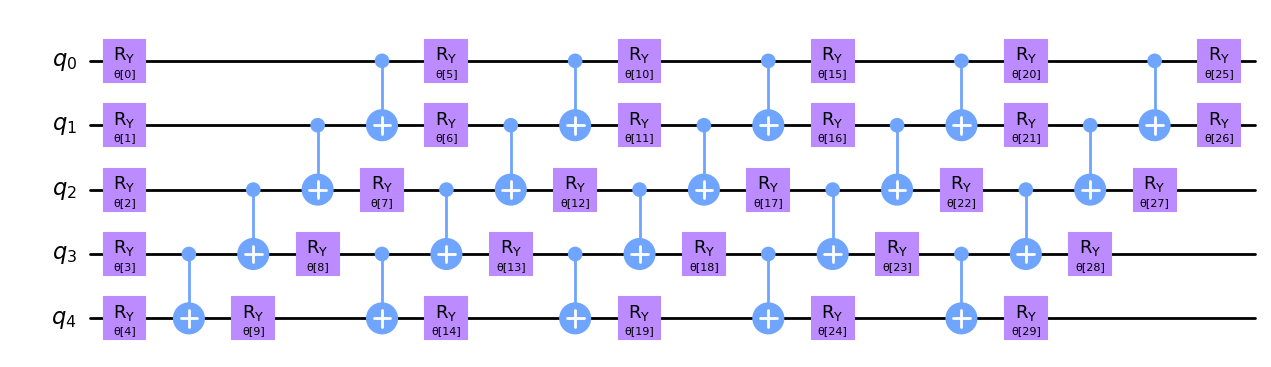

In [49]:
num_qubits = 5
circ = ansatz(num_qubits)
circ.decompose().draw("mpl")

We now apply this Encoder to the state we wish to compress. In this example, we divide our initial $5$ qubit state into a $3$ qubit latent state ($n = 3$) and $2$ qubit trash space ($k = 2$). 

As explained in the previous section, we must also include a $2$ qubit reference space in our circuit, as well as an auxiliary qubit to perform the swap test between the reference and trash states. We will therefore have a total of $2 + 3 + 2 + 1 = 8$ qubits and $1$ classical register in our circuit.

After initializing our state, we apply our parametrized circuit.

Following this, we then split our initial state into the latent space (the compressed state) and trash space (the part of the state we will disregard) and perform the swap test between the reference state and the trash space. The last qubit is then measured to determine the fidelity between the reference and trash states.  A pictorial representation of this is given below in Figure 4. 

![qae_fig4_wide.png](qae_fig4_wide.png)
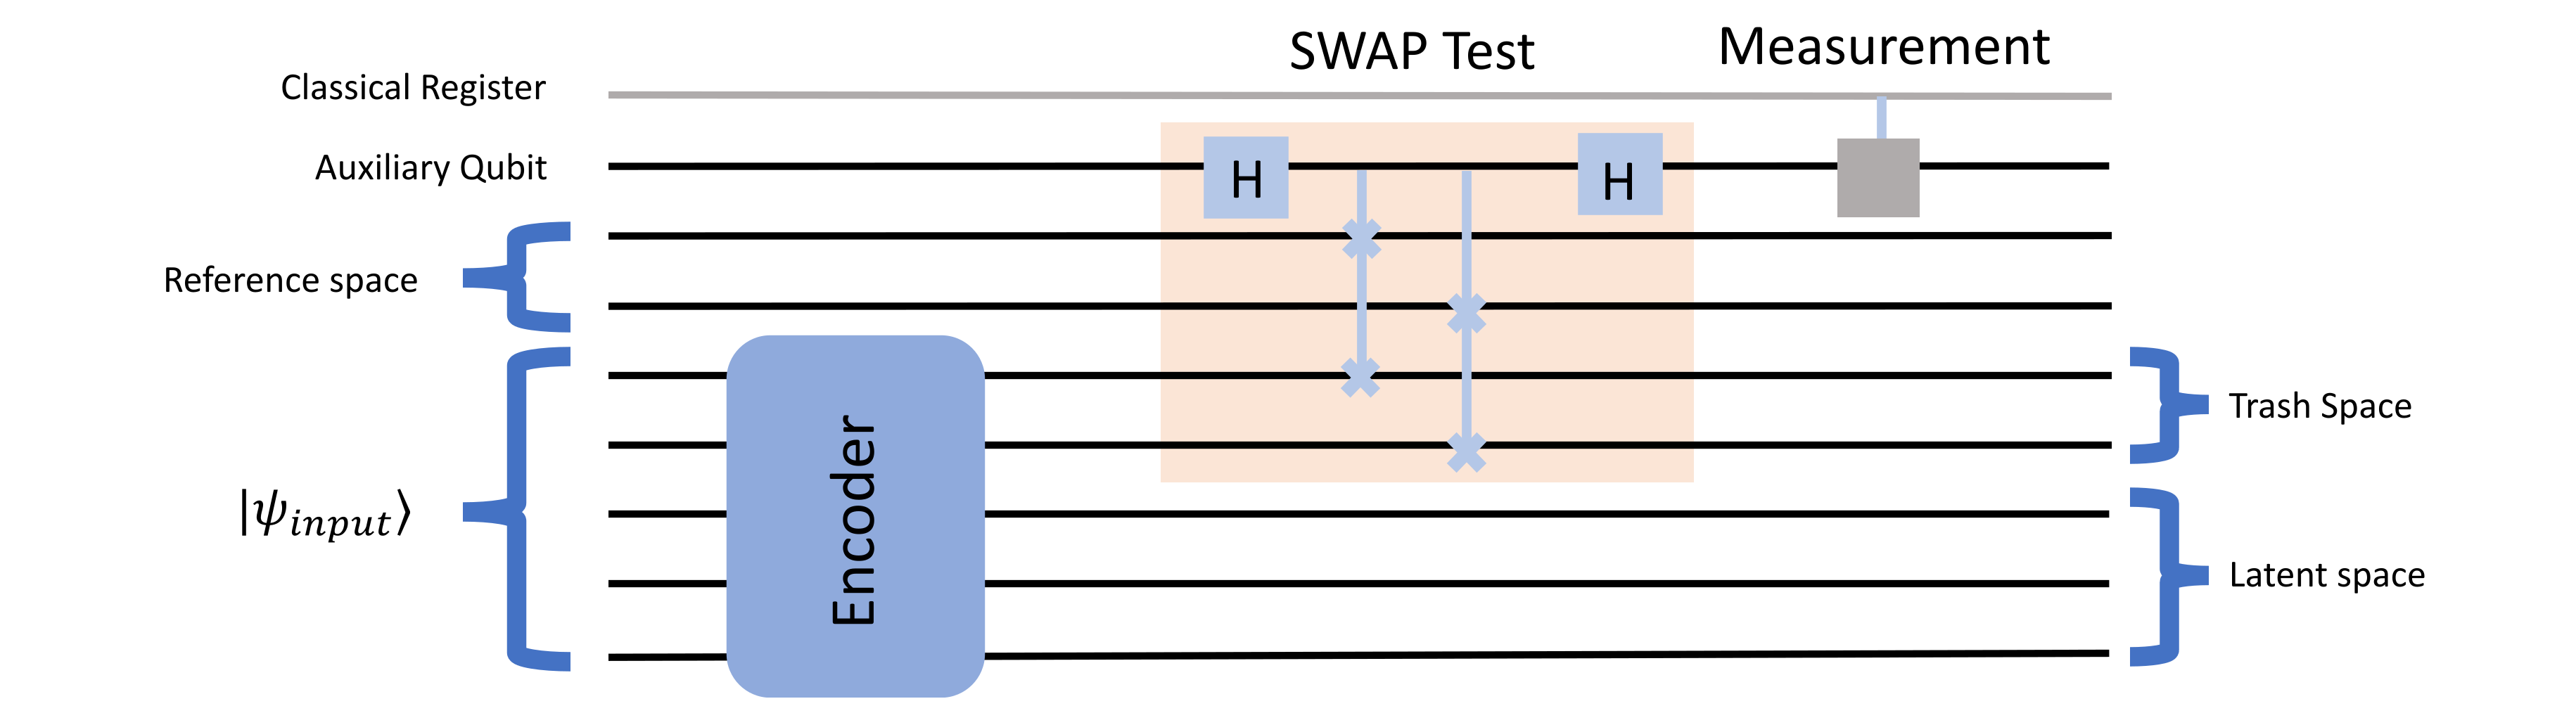

Figure 4: Example of a Quantum Autoencoder in the training process. We use the swap test to determine the fidelity between the trash and reference space. 

We define a function below to implement the above circuit configuration to the $5$ qubit domain wall state $|00111\rangle$ and plot an example below. Here qubits $5$ and $6$ are the reference state, $0, 1, 2, 3, 4$ are the initial state we wish to compress and qubit $7$ is our auxiliary qubit which is used in the swap test. We also include a classical register to measure the results of qubit $7$ in the swap test. 

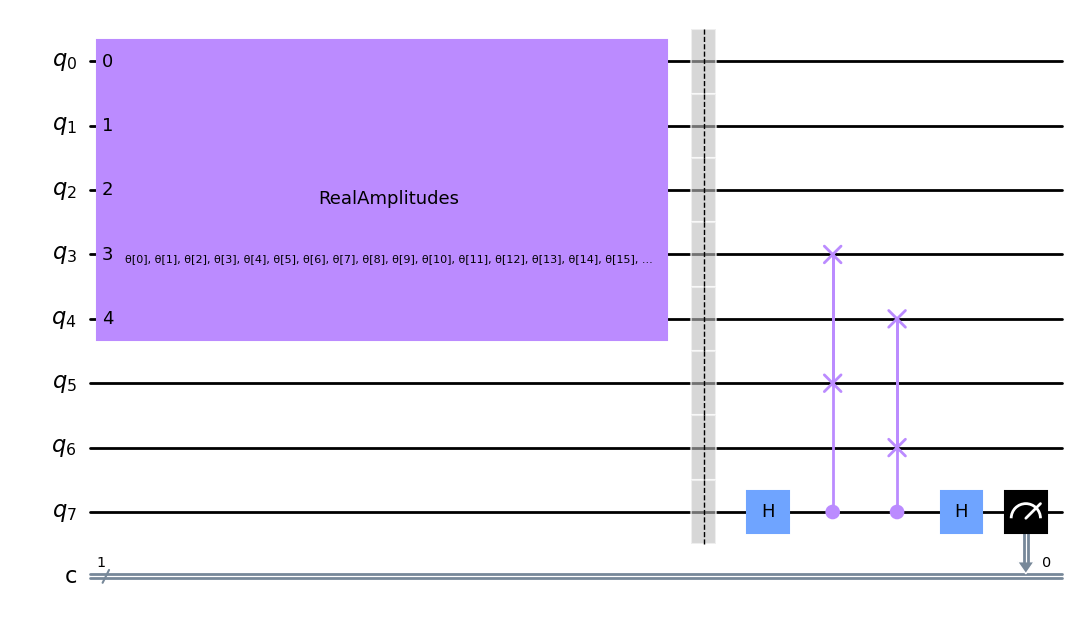

In [50]:
def auto_encoder_circuit(num_latent, num_trash):
    qr = QuantumRegister(num_latent + 2 * num_trash + 1, "q")
    cr = ClassicalRegister(1, "c")
    circuit = QuantumCircuit(qr, cr)
    circuit.compose(ansatz(num_latent + num_trash), range(0, num_latent + num_trash), inplace=True)
    circuit.barrier()
    auxiliary_qubit = num_latent + 2 * num_trash
    # swap test
    circuit.h(auxiliary_qubit)
    for i in range(num_trash):
        circuit.cswap(auxiliary_qubit, num_latent + i, num_latent + num_trash + i)

    circuit.h(auxiliary_qubit)
    circuit.measure(auxiliary_qubit, cr[0])
    return circuit


num_latent = 3
num_trash = 2
circuit = auto_encoder_circuit(num_latent, num_trash)
circuit.draw("mpl")

In order to reconstruct the original input state, we must apply the adjoint of our parametrized circuit after the swap test. However, during training, we are only interested in the trash state and the reference state. We can therefore exclude the gates following compression until we wish to reconstruct our initial input. 

After building our Quantum Autoencoder, the next step is to train our Quantum Autoencoder to compress the state and maximize the cost function and determine the parameters $\theta$. 

## 6. A Simple Example: The Domain Wall Autoencoder

Let's first begin with a simple example, a state known as the Domain Wall, which for $5$ qubits is given by $|00111\rangle$. Here we will try and compress this state from $5$ qubits to $3$ qubits, with the remaining qubits in the trash space, in the state $|00\rangle$. We can create a function to build the domain wall state below.

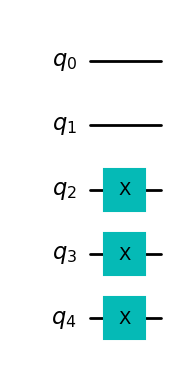

In [51]:
def domain_wall(circuit, a, b):
    # Here we place the Domain Wall to qubits a - b in our circuit
    for i in np.arange(int(b / 2), int(b)):
        circuit.x(i)
    return circuit


domain_wall_circuit = domain_wall(QuantumCircuit(5), 0, 5)
domain_wall_circuit.draw("mpl")

Now let's train our Autoencoder to compress this state from 5 qubits to 3 qubits (qubits 0,1 and 2), with the remaining qubits in the trash space (qubits 3 and 4) being in the |00> state. 

We create a circuit to be used in the loss function, as described in Section 4, which determines the fidelity between the two states below using the swap test for our particular AutoEncoder function. For further information on the swap test, see [1]. 

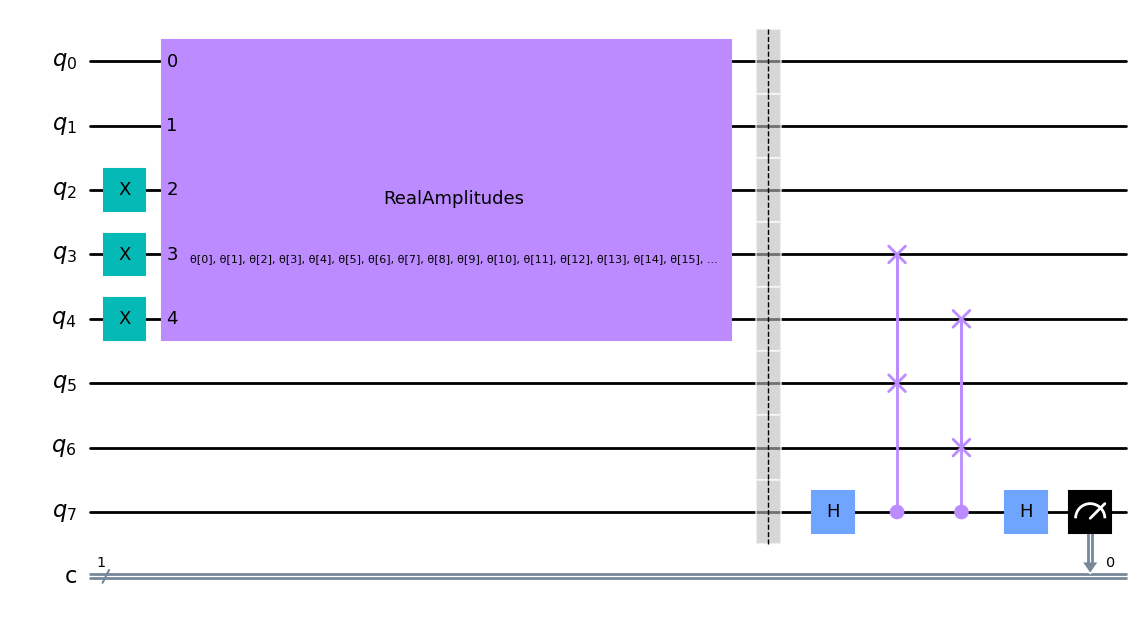

In [52]:
ae = auto_encoder_circuit(num_latent, num_trash)
qc = QuantumCircuit(num_latent + 2 * num_trash + 1, 1)
qc = qc.compose(domain_wall_circuit, range(num_latent + num_trash))
qc = qc.compose(ae)
qc.draw("mpl")

Then, we create a quantum neural network and pass the circuit as a parameter. We note that this network must take an interpret function, which determines how we map the output of the network to the output shape. Since we measure only one qubit, the output of the network is a bit string either $0$ or $1$, so the output shape is $2$, the number of possible outcomes. Then, we introduce an identity mapping. The output of the network is a vector of probabilities of getting interpret-mapped bit strings. Thus, we get probabilities of getting $0$ or $1$ and this is exactly what we are looking for. In the cost function we make use of the probability of getting $1$ and penalize the outcomes that lead to $1$, therefore maximizing the fidelity between the trash space and the reference space.

In [53]:
# Here we define our interpret for our SamplerQNN
def identity_interpret(x):
    return x


qnn = SamplerQNN(
    circuit=qc,
    input_params=[],
    weight_params=ae.parameters,
    interpret=identity_interpret,
    output_shape=2,
)

Next we create our cost function. As described in the previous section, our aim is to minimize $\frac{2}{M}L$, which is the twice the probability of getting the final qubit in the $|1\rangle$ state. We therefore wish to minimize the of getting a $|1\rangle$ on qubit 7.

The cost function will also plot out the objective value at each cost function evaluation.

In [54]:
def cost_func_domain(params_values):
    probabilities = qnn.forward([], params_values)
    # we pick a probability of getting 1 as the output of the network
    cost = np.sum(probabilities[:, 1])

    # plotting part
    clear_output(wait=True)
    objective_func_vals.append(cost)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
    return cost

Now we will train our Autoencoder to reduce the dimension of the Hilbert space from $5$ qubits to $3$, while leaving the trash space in the state $|00\rangle$.  We initially set the parameters $\theta$ to random values and tune these parameters to minimize our cost function through the use of the COBYLA optimizer. 

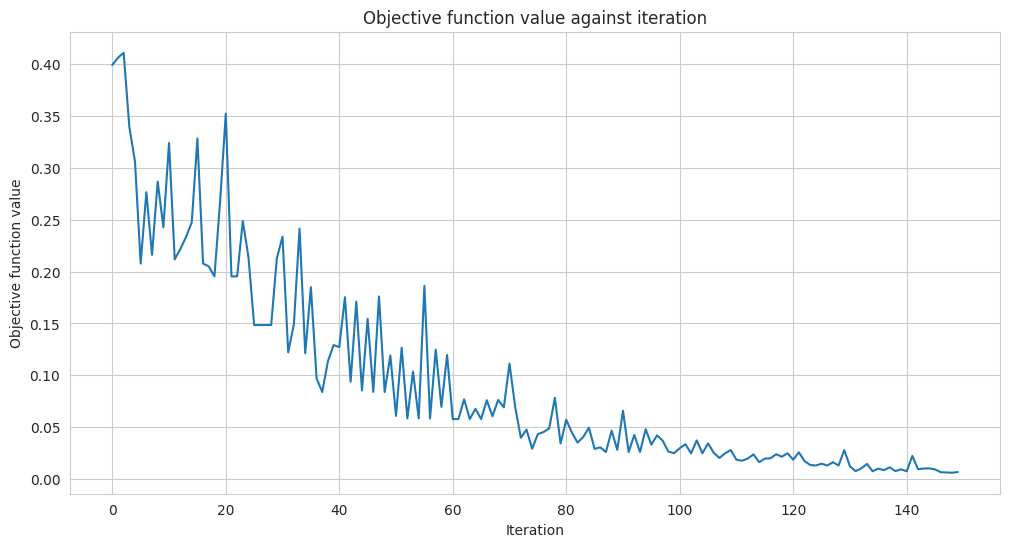

Fit in 23.94 seconds


In [55]:
opt = COBYLA(maxiter=150)
initial_point = algorithm_globals.random.random(ae.num_parameters)

objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()
opt_result = opt.minimize(cost_func_domain, initial_point)
elapsed = time.time() - start

print(f"Fit in {elapsed:0.2f} seconds")

Looks like it has converged! After training our Quantum Autoencoder, let's build it and see how well it compresses the state! 

To do this, we first apply our Autoencoder to a $5$ qubit Domain Wall state. After applying this state, the compressed state should be of the form $|00\rangle$. Therefore resetting the last two qubits should not effect our over all state. 

After resetting we apply our decoder (the hermitian conjugate of our encoder) and compare it to the initial state by determining the fidelity. If our fidelity is one, then our Autoencoder has encoded all the information of the domain wall efficiently into a smaller set of qubits and when decoding, we retain the original state! 

Let's first apply our circuit to the Domain Wall State, using the parameters we obtained when training our Quantum Autoencoder. (Note we have included barriers in our circuit below, however these are not necessary for the implementation of the Quantum Autoencoder and are used to determine between different sections of our circuit). 

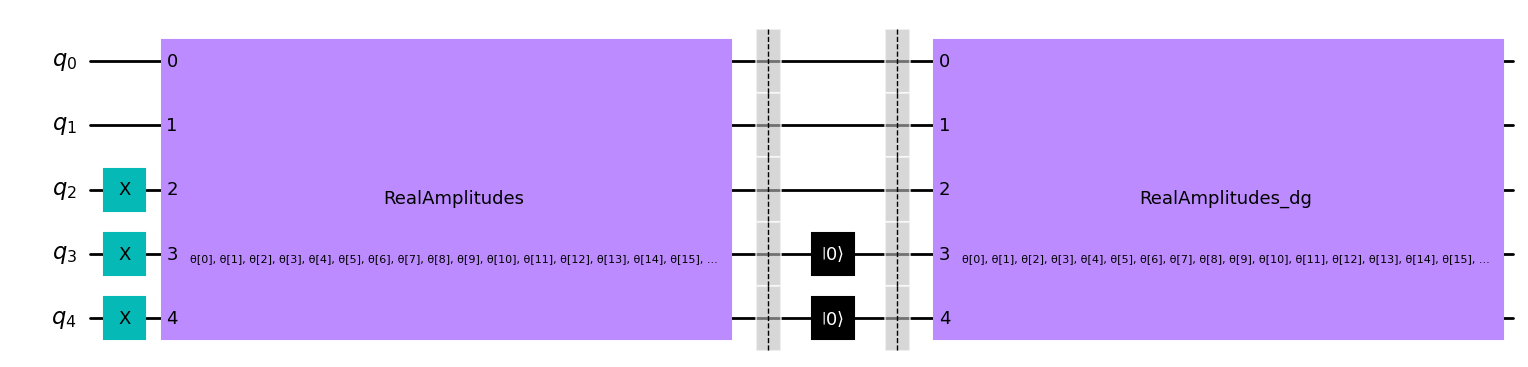

In [56]:
test_qc = QuantumCircuit(num_latent + num_trash)
test_qc = test_qc.compose(domain_wall_circuit)
ansatz_qc = ansatz(num_latent + num_trash)
test_qc = test_qc.compose(ansatz_qc)
test_qc.barrier()
test_qc.reset(4)
test_qc.reset(3)
test_qc.barrier()
test_qc = test_qc.compose(ansatz_qc.inverse())

test_qc.draw("mpl")

Now we assign the parameter values obtained in the training.

In [57]:
test_qc = test_qc.assign_parameters(opt_result.x)

Now let's get the statevectors of our Domain Wall state and output circuit and calculate the fidelity! 

In [58]:
domain_wall_state = Statevector(domain_wall_circuit).data
output_state = Statevector(test_qc).data

fidelity = np.sqrt(np.dot(domain_wall_state.conj(), output_state) ** 2)
print("Fidelity of our Output State with our Input State: ", fidelity.real)

Fidelity of our Output State with our Input State:  0.9938652877745132


As you can see our fidelity is quite high and our Autoencoder has thus compressed our dataset while retaining all the information from the input state!

Now we will see if we can apply such a Quantum Autoencoder to more complicated datasets containing noise, such as images of the numbers zero and one. 

## 7. A Quantum Autoencoder for Digital Compression

One can also apply a Quantum Autoencoder to more complicated examples, such as a set of handwritten digits in order to compress the dataset. Below, we will show that we can indeed train an Quantum Autoencoder to compress such an example, giving us the ability to store data more efficiently on a Quantum Computer. 

For this tutorial, we will build a Quantum Autoencoder for a noisy dataset containing zeros and ones, which can be seen below. 

Each image contains $32$ pixels of which can be encoded into $5$ qubits by Amplitude Encoding. This can be done using Qiskit Machine Learning's `RawFeatureVector` feature map.  

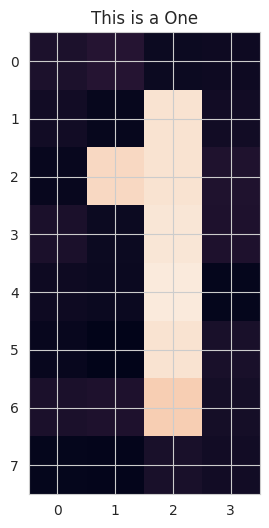

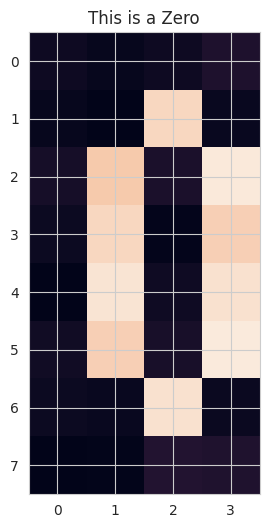

In [59]:
def zero_idx(j, i):
    # Index for zero pixels
    return [
        [i, j],
        [i - 1, j - 1],
        [i - 1, j + 1],
        [i - 2, j - 1],
        [i - 2, j + 1],
        [i - 3, j - 1],
        [i - 3, j + 1],
        [i - 4, j - 1],
        [i - 4, j + 1],
        [i - 5, j],
    ]


def one_idx(i, j):
    # Index for one pixels
    return [[i, j - 1], [i, j - 2], [i, j - 3], [i, j - 4], [i, j - 5], [i - 1, j - 4], [i, j]]


def get_dataset_digits(num, draw=True):
    # Create Dataset containing zero and one
    train_images = []
    train_labels = []
    for i in range(int(num / 2)):
        # First we introduce background noise
        empty = np.array([algorithm_globals.random.uniform(0, 0.1) for i in range(32)]).reshape(
            8, 4
        )

        # Now we insert the pixels for the one
        for i, j in one_idx(2, 6):
            empty[j][i] = algorithm_globals.random.uniform(0.9, 1)
        train_images.append(empty)
        train_labels.append(1)
        if draw:
            plt.title("This is a One")
            plt.imshow(train_images[-1])
            plt.show()

    for i in range(int(num / 2)):
        empty = np.array([algorithm_globals.random.uniform(0, 0.1) for i in range(32)]).reshape(
            8, 4
        )

        # Now we insert the pixels for the zero
        for k, j in zero_idx(2, 6):
            empty[k][j] = algorithm_globals.random.uniform(0.9, 1)

        train_images.append(empty)
        train_labels.append(0)
        if draw:
            plt.imshow(train_images[-1])
            plt.title("This is a Zero")
            plt.show()

    train_images = np.array(train_images)
    train_images = train_images.reshape(len(train_images), 32)

    for i in range(len(train_images)):
        sum_sq = np.sum(train_images[i] ** 2)
        train_images[i] = train_images[i] / np.sqrt(sum_sq)

    return train_images, train_labels


train_images, __ = get_dataset_digits(2)

After encoding our image into $5$ qubits, we begin to train our Quantum Autoencoder to compress this state into $3$ qubits.

We repeat the steps in the previous example and write a cost function, again based on the Swap Test between the trash and latent space. We can also use the same Autoencoder function as given in the previous example, as the input state and trash space contain the same amount of qubits. 

Let's input one of our digits and see our circuit for the Autoencoder below. 

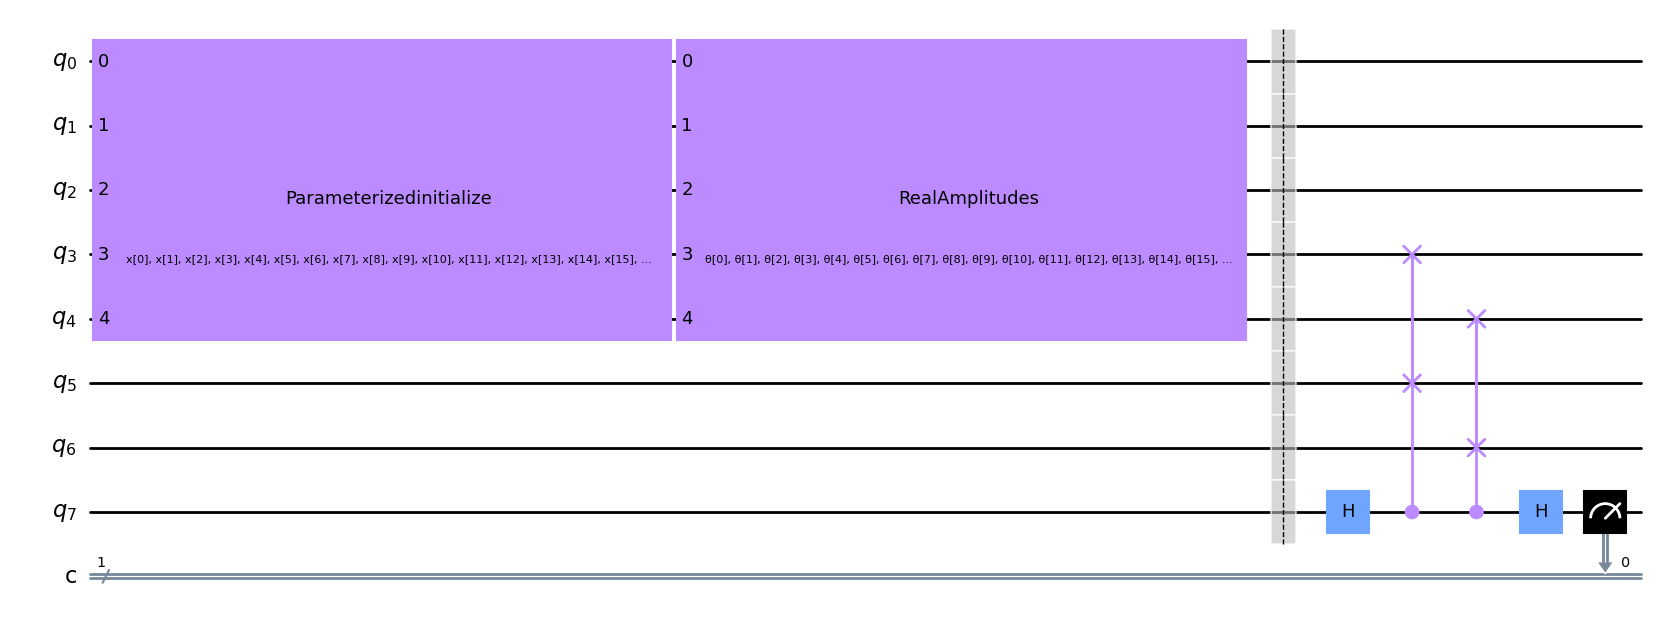

In [60]:
num_latent = 3
num_trash = 2

fm = RawFeatureVector(2 ** (num_latent + num_trash))

ae = auto_encoder_circuit(num_latent, num_trash)

qc = QuantumCircuit(num_latent + 2 * num_trash + 1, 1)
qc = qc.compose(fm, range(num_latent + num_trash))
qc = qc.compose(ae)

qc.draw("mpl")

Again, we can see the swap test being performed on the qubits $3$, $4$, $5$ and $6$, which will determine the value of our cost function.

In [61]:
def identity_interpret(x):
    return x


qnn = SamplerQNN(
    circuit=qc,
    input_params=fm.parameters,
    weight_params=ae.parameters,
    interpret=identity_interpret,
    output_shape=2,
)

We build our cost function, based on the swap test between the reference and trash space for the digit dataset. To do this, we again use Qiskit Machine Learning's SamplerQNN network and use the same interpret function as we are measuring the probability of getting the final qubit in the $|1\rangle$ state.

In [62]:
def cost_func_digits(params_values):
    probabilities = qnn.forward(train_images, params_values)
    cost = np.sum(probabilities[:, 1]) / train_images.shape[0]

    # plotting part
    clear_output(wait=True)
    objective_func_vals.append(cost)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

    return cost

Since model training may take a long time we have already pre-trained the model for some iterations and saved the pre-trained weights. We'll continue training from that point by setting `initial_point` to a vector of pre-trained weights.

In [63]:
with open("qae_initial_point.json", "r") as f:
    initial_point = json.load(f)

By minimizing this cost function, we can thus determine the required parameters to compress our noisy images. Let's see if we can encode our images! 

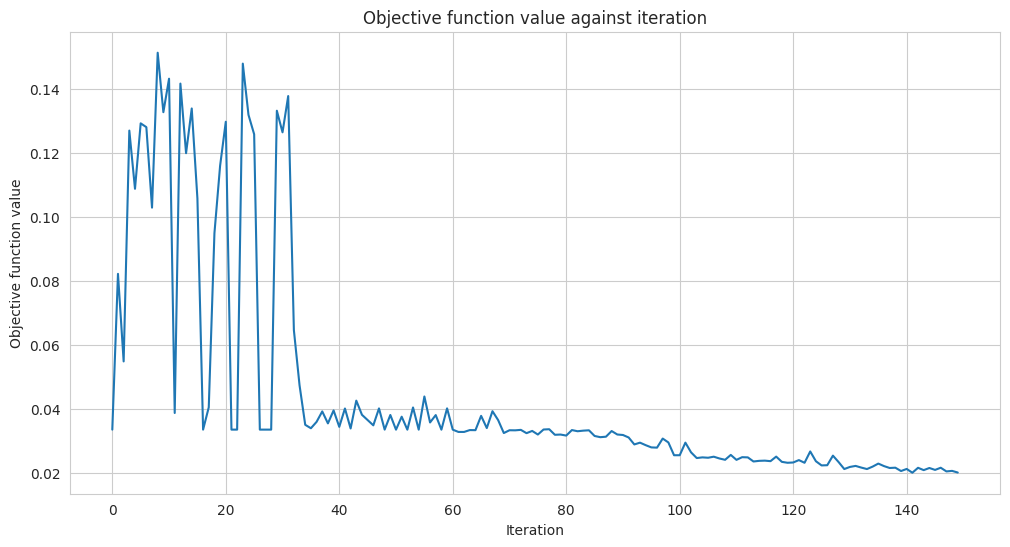

Fit in 25.16 seconds


In [64]:
opt = COBYLA(maxiter=150)

objective_func_vals = []
# make the plot nicer
plt.rcParams["figure.figsize"] = (12, 6)

start = time.time()
opt_result = opt.minimize(fun=cost_func_digits, x0=initial_point)
elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} seconds")

Looks like it has converged!

Now let's build our Encoder and Decoder using the parameters obtained from the training period. After applying this circuit to our new dataset, we can then compare our input and output data and see if we were able to retain the images efficiently throughout the compression! 

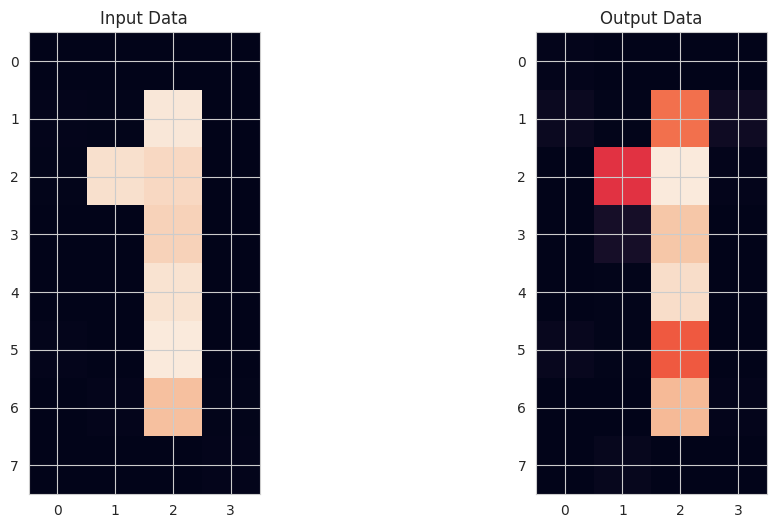

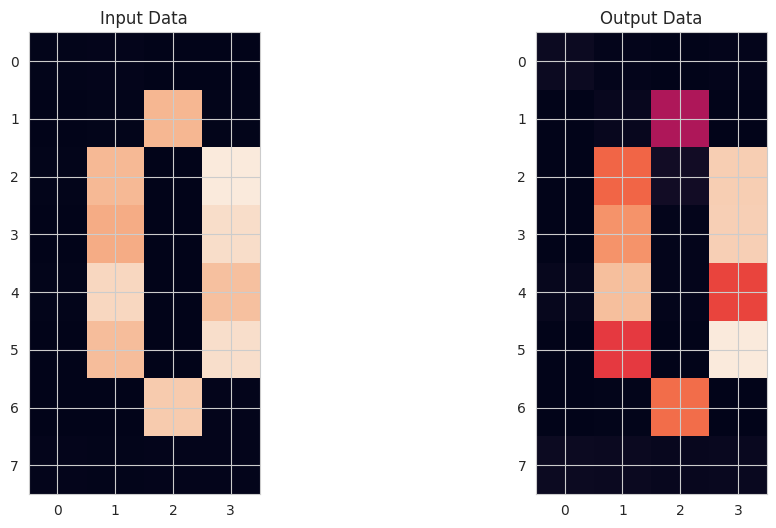

In [65]:
# Test
test_qc = QuantumCircuit(num_latent + num_trash)
test_qc = test_qc.compose(fm)
ansatz_qc = ansatz(num_latent + num_trash)
test_qc = test_qc.compose(ansatz_qc)
test_qc.barrier()
test_qc.reset(4)
test_qc.reset(3)
test_qc.barrier()
test_qc = test_qc.compose(ansatz_qc.inverse())

# sample new images
test_images, test_labels = get_dataset_digits(2, draw=False)
for image, label in zip(test_images, test_labels):
    original_qc = fm.assign_parameters(image)
    original_sv = Statevector(original_qc).data
    original_sv = np.reshape(np.abs(original_sv) ** 2, (8, 4))

    param_values = np.concatenate((image, opt_result.x))
    output_qc = test_qc.assign_parameters(param_values)
    output_sv = Statevector(output_qc).data
    output_sv = np.reshape(np.abs(output_sv) ** 2, (8, 4))

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(original_sv)
    ax1.set_title("Input Data")
    ax2.imshow(output_sv)
    ax2.set_title("Output Data")
    plt.show()

It looks like our Quantum Autoencoder can be trained to encode digits as well! Now it's your turn to build your own Quantum Autoencoder and come up with ideas and datasets to compress!

## 8. Applications of a Quantum Autoencoder

Quantum Autoencoder's can be used for various different applications, including

1. Digital Compression: where information can be encoded into a smaller amount of qubits. This can be hugely beneficial for near term quantum devices, as smaller systems of qubits are less prone to noise.
2. Denoising: where one can use Quantum Autoencoder to extract relevant features from the initial quantum state or encoded data, while neglecting any additional noise.
3. Quantum Chemistry: in which a Quantum Autoencoder can be used as an ansatz for systems, such as the Hubbard Model. This is commonly used to describe electron-electron interactions in molecules. 

# 9. Learning hard distributions with quantum-enhanced Variational Autoencoders

In a recent application \[4\], a  quantum-enhanced VAE (QeVAE), was applied to the problem of modeling the measurement distributions obtained from unknown quantum states. This problem is fundamental in quantum information science, as it can reveal useful information about the properties and dynamics of quantum systems. Moreover, it can enable applications such as quantum state reconstruction, and entanglement quantiﬁcation. 

The hybrid model consists of a feed-forward classical encoder, a continuous latent space, and a parametrized quantum circuit as a decoder. The encoder network Qφ(z|x) is modelled through a classical feedforward neural network and the latent variable as z ∼ N (0, I). The likelihood (generator) distribution pθ (x|z) is defined via a quantum circuit i.e. pθ (x|z) =| 〈x| ˆU (θ, z)|0〉⊗n〉 |2. The Evidence Lower bound loss (ELBO) is optimized through a classical optimizer such as ADAM. The model is trained to mimic the given measurement distribution of states. During training, the parameters of the encoder and the rotation gates in the decoder (with a pre-selected entanglement type) are iteratively varied and learned. Such a model has multiple applications: It will enable scientists to generate certain quantum states in different physical quantum computers just by knowing the set of rotation and entangling gates to perform. The algorithm also has applications in state compression and transferring a state from one system to another upto a phase.

![](QVAE.png)

QeVAE for learning quantum state distributions: (a) Multiple copies of a quantum state ρ are obtained naturally from a quantum system and are measured through different measurement operators. The measurement dataset is stored on a classical computer. (b) The QeVAE with a parameterized quantum circuit as the generative network and a classical feed-forward neural network as the inference network can be used to recrete the distribution. After training, the circuit can be used to generate the original distribution through any quantum computer and generate states amenable for downstream processing. (c) A classical VAE with continuous Gaussian latent variables that perform the same task.

## Generate random quantum circuit states 

- Through arbitrary rotations and entangling gates

In [66]:
def normalize(d, target=1.0):
   raw = sum(d.values())
   factor = target/raw
   return {key:value*factor for key,value in d.items()}
   
def conv_resultdict_nparray(results:dict, nqubits:int) -> np.ndarray:
    """Convert quantum circuit results (dict) into a 2D matrix
    that stores all the binary vectors.
    First we get all the strings obtained for each measurement (m) and then convert each bitstring into
    a n-column vector. Such a vector is created for each measurement, yielding a 2D matrix (m, n)"""
    
    result_array_str = np.concatenate([[key]*results[key] for key in results])
    result_array_vec = np.zeros((result_array_str.shape[0], nqubits))
    for rowid, row in enumerate(result_array_str):
        for colid, elem in enumerate(row):
            result_array_vec[rowid-1, colid-1] = elem

    print("Result loaded on numpy array! Output shape:",(result_array_vec.shape))
    return np.random.permutation(result_array_vec)

In [67]:
nqubits = 4
seed = algorithm_globals.random_seed

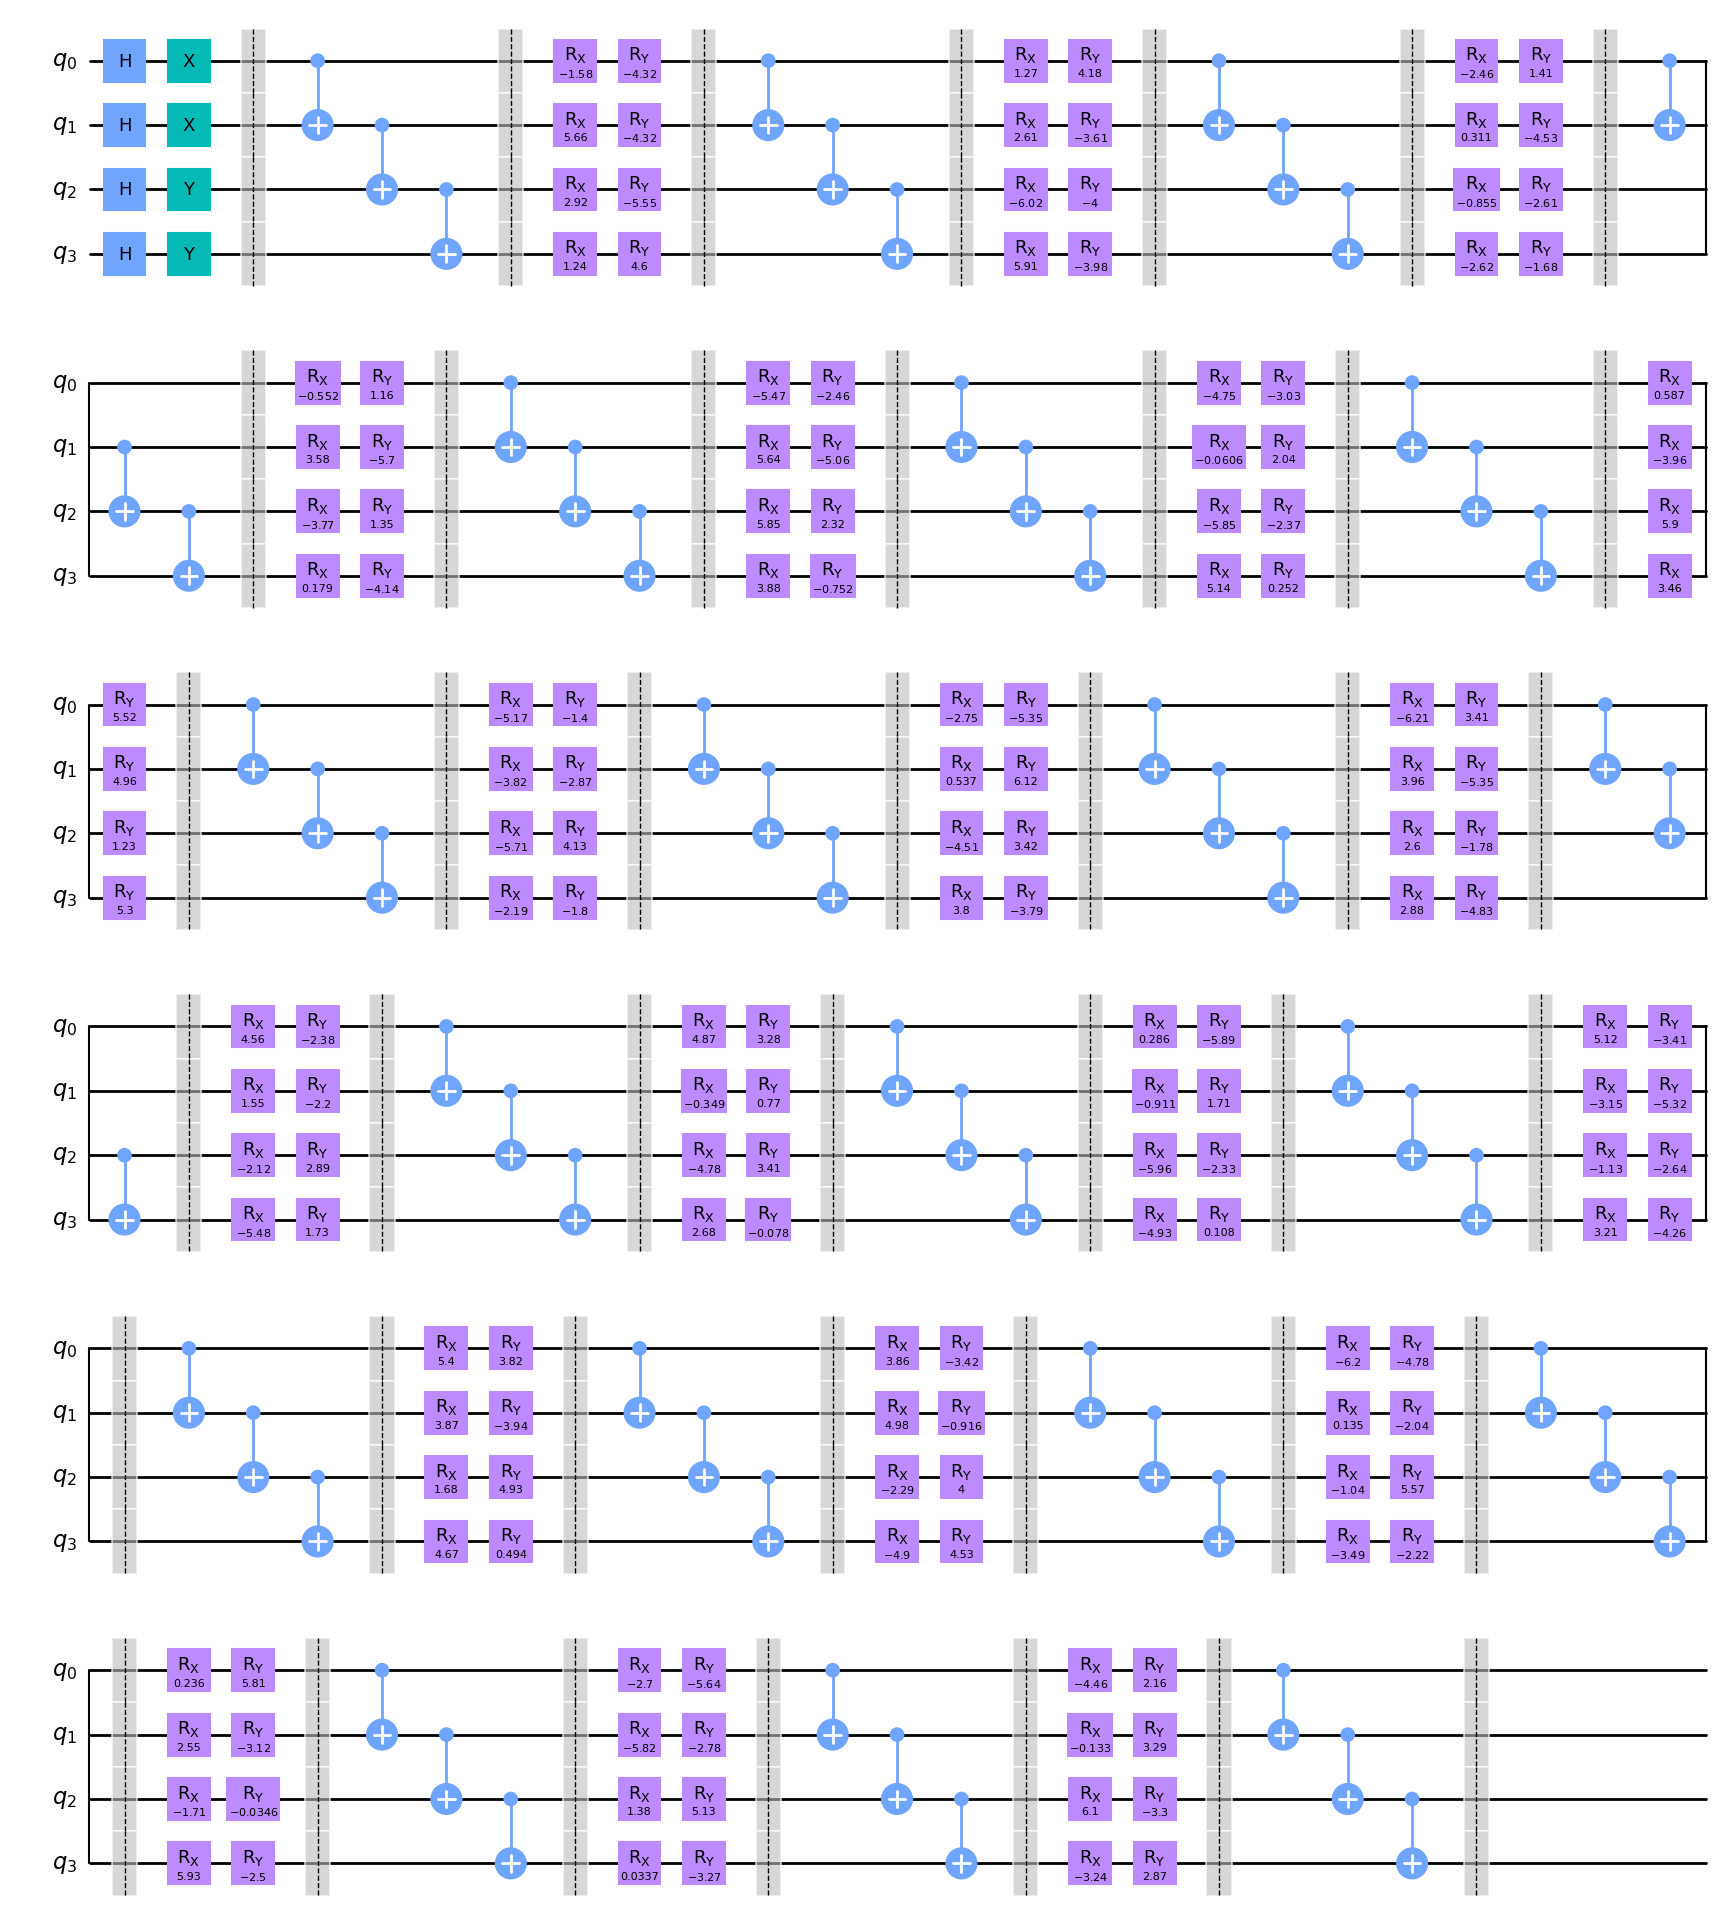

In [68]:
np.random.seed(seed)
circ_simple = qiskit.QuantumCircuit(nqubits)
circ_simple.h(range(nqubits))
circ_simple.x(range(nqubits//2)); circ_simple.y(range(nqubits//2, nqubits)); circ_simple.barrier()
for i in range(20):
    circ_simple.cx(range(nqubits-1), range(1,nqubits)); circ_simple.barrier()
    [circ_simple.rx(2*np.pi*(2*np.random.rand(1)[0]-1), i) for i in range(nqubits)]
    [circ_simple.ry(2*np.pi*(2*np.random.rand(1)[0]-1), i) for i in range(nqubits)] ; circ_simple.barrier()
circ_simple.cx(range(nqubits-1), range(1,nqubits)); circ_simple.barrier()
circ_simple.draw('mpl')

In [69]:
circ_simple.count_ops()

OrderedDict([('rx', 80),
             ('ry', 80),
             ('cx', 63),
             ('barrier', 42),
             ('h', 4),
             ('x', 2),
             ('y', 2)])

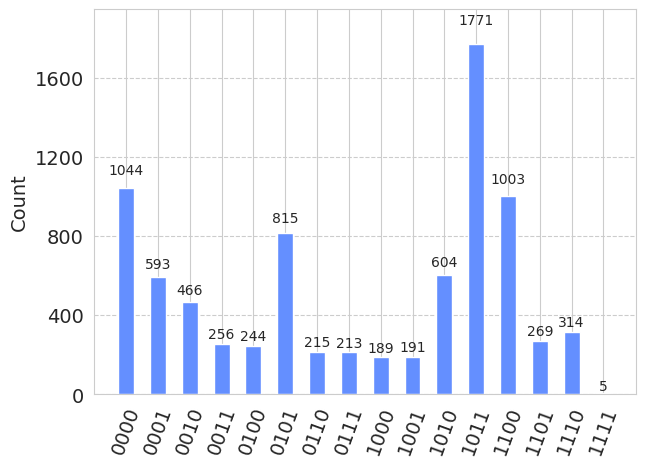

In [70]:
circ_simple.measure_all()
job = qiskit.execute(circ_simple, backend=qiskit.Aer.get_backend('qasm_simulator'),
                     shots=pow(2,13))
results = job.result().get_counts()
plot_histogram(results)

In [71]:
outputfile = conv_resultdict_nparray(results, nqubits) #np.random.permutation(result_array_vec)
outputfile

Result loaded on numpy array! Output shape: (8192, 4)


array([[0., 1., 1., 1.],
       [0., 0., 0., 0.],
       [1., 0., 1., 0.],
       ...,
       [0., 1., 1., 1.],
       [0., 1., 0., 0.],
       [0., 1., 1., 1.]])

In [72]:
n_samples = outputfile.shape[0]
n_samples

8192

## Creating a QeVAE

In [73]:
results

{'0001': 593,
 '1101': 269,
 '1110': 314,
 '0100': 244,
 '0011': 256,
 '0111': 213,
 '1011': 1771,
 '1100': 1003,
 '0101': 815,
 '1001': 191,
 '1010': 604,
 '1000': 189,
 '0110': 215,
 '1111': 5,
 '0000': 1044,
 '0010': 466}

In [74]:
original_results = normalize(results)
original_results

{'0001': 0.0723876953125,
 '1101': 0.0328369140625,
 '1110': 0.038330078125,
 '0100': 0.02978515625,
 '0011': 0.03125,
 '0111': 0.0260009765625,
 '1011': 0.2161865234375,
 '1100': 0.1224365234375,
 '0101': 0.0994873046875,
 '1001': 0.0233154296875,
 '1010': 0.07373046875,
 '1000': 0.0230712890625,
 '0110': 0.0262451171875,
 '1111': 0.0006103515625,
 '0000': 0.12744140625,
 '0010': 0.056884765625}

In [75]:
vals = np.array(list(normalize(results).values()))
#nqubits = datafile.shape[1]
fidelity_uniform_sqrt = np.sum(np.sqrt(vals*(1/pow(2, nqubits))))
print("Fidelity with a uniform distribution:", fidelity_uniform_sqrt**2)

Fidelity with a uniform distribution: 0.8304930917333239


## Create measurement dataloaders

In [76]:
class MeasurementDataset(Dataset):

    def __init__(self, numpy_array:np.ndarray):
        # dataloading
        self.x = torch.from_numpy(numpy_array[:,:])
        self.num_samples = numpy_array.shape[0]


    def __getitem__(self, index):
        # dataset[0]
        return self.x[index].float()

    def __len__(self):
        # len(dataset)
        return self.num_samples

In [77]:
# Setup training and testing datasets

want_datasetsize= 0.05  # can change to 0.2
train_size = 0.75
training_dataset = MeasurementDataset(outputfile[: int(want_datasetsize*train_size * n_samples)])
valid_dataset = MeasurementDataset(outputfile[int(want_datasetsize*train_size * n_samples) : int(want_datasetsize * n_samples)])

train_dataloader = DataLoader(
    training_dataset, batch_size=1, shuffle=True, num_workers=1
)
valid_dataloader = DataLoader(valid_dataset, batch_size=1, shuffle=True, num_workers=1)

dataloaders = [train_dataloader, valid_dataloader]
dataloader_info = "Size of training set: %d | Size of validation set: %d"% (len(train_dataloader), len(valid_dataloader))
print(dataloader_info)

Size of training set: 307 | Size of validation set: 102


## Setup model

### Create model

In [78]:
def create_qnn(num_inputs: int, num_qubits: int, qc_params: dict):
    """Creates the decoder circuit with ansatz"""

    if num_inputs > num_qubits:
        raise ValueError(
            "Number of inputs is greater than the number of qubits... Not suitable with current feature map"
        )

    fm, entanglement_type, repititions = qc_params.values()

    if fm == "ZZ":
        feature_map = qiskit.circuit.library.ZZFeatureMap(num_inputs)
    elif fm == "Z":
        feature_map = qiskit.circuit.library.ZFeatureMap(num_inputs)
    elif fm == 'P':
        feature_map = qiskit.circuit.library.PauliFeatureMap(num_inputs, reps=1, paulis=['X', 'Y'],
                                                             insert_barriers=True)
    else:
        raise ValueError("Wrong feature Map provided!")

    # local_entanglement = {}
    ansatz = qiskit.circuit.library.TwoLocal(
        num_qubits=num_qubits,
        rotation_blocks=["ry", "rx"],
        entanglement_blocks="cx",
        skip_final_rotation_layer=False,
        entanglement=entanglement_type,
        reps=repititions,  # 1
        insert_barriers=True,
    )
    qc = qiskit.QuantumCircuit(num_qubits)
    qc.append(feature_map, range(0, num_inputs))
    qc.h(range(num_inputs, num_qubits)) if num_inputs < num_qubits else None
    qc.barrier()
    qc.append(ansatz, range(num_qubits))
    qnn = SamplerQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True,
        sparse=False,
    )
    return qnn, qc

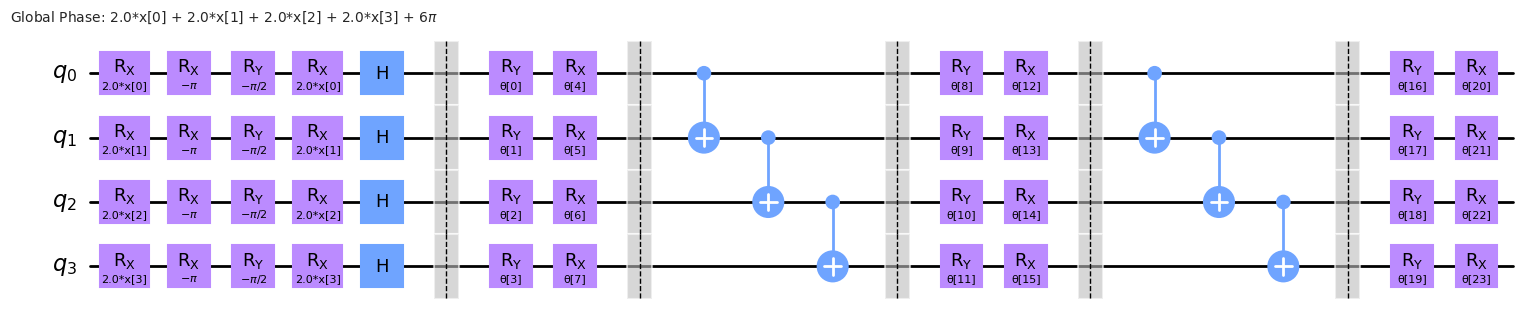

In [79]:
qnn_sample, qnn_qc_sample = create_qnn(num_inputs=4, num_qubits=4, qc_params= {'fm':'Z',
                                                                 'entanglement_type':'linear',
                                                                  'repititions':2})
tc_qc_sample = qiskit.transpile(qnn_qc_sample, basis_gates=['h','rx','ry','cx'])
                                
tc_qc_sample.draw('mpl')

In [80]:
print("Original circuit number of operations: ", circ_simple.count_ops())
print("Ansatz circuit number of operations: ", tc_qc_sample.count_ops())

Original circuit number of operations:  OrderedDict([('rx', 80), ('ry', 80), ('cx', 63), ('barrier', 43), ('h', 4), ('measure', 4), ('x', 2), ('y', 2)])
Ansatz circuit number of operations:  OrderedDict([('rx', 24), ('ry', 16), ('cx', 6), ('barrier', 5), ('h', 4)])


In [81]:
class QVAE_qcompile(torch.nn.Module):

    def __init__(self, qnn, latent_dim:int):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(qnn.circuit.num_qubits, 8),
            torch.nn.LeakyReLU(0.01),
            torch.nn.Linear(8, 7),
            torch.nn.LeakyReLU(0.01)) 

        self.z_mean = torch.nn.Linear(7,latent_dim)
        self.z_log_var = torch.nn.Linear(7,latent_dim)

        # self.preprocessor = torch.nn.Sequential(
        #     torch.nn.Linear(latent_dim, qnn.circuit.num_qubits),
        #     torch.nn.LeakyReLU(0.01))
        
        self.preprocessor = torch.nn.Linear(latent_dim, qnn.circuit.num_qubits)
        torch.nn.init.normal_(self.preprocessor.weight, mean=0, std=0.01)
        torch.nn.init.constant_(self.preprocessor.bias, val=0)
            
        self.decoder = TorchConnector(qnn)

    def encoding_fn(self, x):
        x = self.encoder(x)
        z_mean, z_log_var = self.z_mean(x), self.z_log_var(x)
        encoded = self.reparameterize(z_mean, z_log_var)
        return encoded
        
    def decoding_fn(self, x):
        x = self.preprocessor(x)
        decoded = self.decoder(x)
        return decoded
        
    def reparameterize(self, z_mu, z_log_var):
        eps = torch.randn(z_mu.size(0), z_mu.size(1))
        z = z_mu + eps * torch.exp(z_log_var/2.) 
        return z
        
    def forward(self, x):
        x = self.encoder(x)
        z_mean, z_log_var = self.z_mean(x), self.z_log_var(x)
        encoded = self.reparameterize(z_mean, z_log_var)
        preprocessed = self.preprocessor(encoded)
        decoded = self.decoder(preprocessed)
        return encoded, z_mean, z_log_var, decoded #preprocessed

In [82]:
class Decoder_distribution():
    """Get distribution by sampling latent space of classial or quantum VAE"""

    def __init__(self, model, original_results:dict, nn_type:str, nsamples:int):
        self.model = model
        self.original_results = normalize(original_results) # set sum frequency = 1
        self.nsamples = nsamples
        self.nn_type = nn_type

    def get_outputstate_from_latentspace_CVAE(self) -> str:
        """For classical VAE: Sample from normal(0,1) from latent space and provide a single
        output bitstring"""
        
        self.model.eval()
        with torch.no_grad():
            sample = torch.randn(self.model.z_mean.out_features) # inputs go through preprocessor
            output = self.model.decoding_fn(sample)
            p = torch.rand(output.shape) #np.random.rand(1)[0]
            state = torch.where(output>p, 1, 0)   
            bitstring = np.apply_along_axis("".join, 0, state.numpy().astype(int).astype(str))
        return bitstring

    def get_ouputdict_from_bitstrings(self, output_dict:dict, bitstring:str) -> dict:
        """If Bitstring is present in output dict then increase count by 1, 
        otherwise create new key"""
        if bitstring.item() in output_dict.keys():
            output_dict[bitstring.item()] += 1
        else:
            output_dict[bitstring.item()] = 1
            #print(bitstring.item())
        return output_dict

    def get_decoder_dist_QVAE(self):
        """For QVAE: Sample from latent space and return marginalised distribution"""
        nqubits = self.model.encoder[0].in_features
        outputs = np.zeros(( self.nsamples, pow(2, nqubits) ))
        with torch.no_grad():
            for idx, _ in enumerate(outputs):
                sample = torch.randn(self.model.z_mean.out_features)
                outputs[idx, :] = self.model.decoding_fn(sample)
        outputs = outputs.mean(axis=0) 
        bitstring_basis = [("{0:0%db}"%nqubits).format(i) for i in range(pow(2, nqubits))]

        return dict(zip(bitstring_basis, outputs))

    def get_fidelity(self, model_output_dict:dict) -> float:
        """Get Bhattacharya co-efficienct of two discrete distributions. 
        The two distributions are normalized (sum of frequencies set to 1) before computation"""
        fidelity_sqrt = 0
        for key in self.original_results.keys():
            if key in model_output_dict.keys():
                fidelity_sqrt += np.sqrt(self.original_results[key]*model_output_dict[key])
        return fidelity_sqrt**2

    def get_no_wrong_samples(self, model_output_dict:dict) -> float:
        """Get the number of wrong samples from the learnt distribution and the mass on right samples
        Wrong sample: bitstring that is not in original_results and has positive probability in learnt distribution"""
        wrong_samples = 0
        for basis_state in model_output_dict.keys():
            if (basis_state not in self.original_results) & (model_output_dict[basis_state] != 0):
                wrong_samples += 1 
        return wrong_samples

    def get_mass_rightsamples(self, model_output_dict:dict) -> float:
        """Get mass of right samples
        Sum of masses in learnt distribution that is on the basis seen in the original dist"""
        mass_right_samples = 0
        for basis_state in self.original_results:
            if basis_state in model_output_dict.keys():
                mass_right_samples += self.original_results[basis_state]
        return mass_right_samples

    def get_decoder_distribution(self):
        """Get distribution from decoder"""
        #output_states = np.zeros((self.nsamples, self.model.decoder[0].in_features))
        
        with torch.no_grad():
            if self.nn_type == "classical":
                output_dict = {}
                for i in range(self.nsamples):
                    bitstring = self.get_outputstate_from_latentspace_CVAE()
                    output_dict = self.get_ouputdict_from_bitstrings(output_dict, bitstring)
                
            elif self.nn_type == "quantum-classical":
                output_dict = self.get_decoder_dist_QVAE()
        
        output_dict = normalize(output_dict)
        no_wrong_samples = self.get_no_wrong_samples(output_dict)
        mass_right_samples = self.get_mass_rightsamples(output_dict)
        fidelity = self.get_fidelity(output_dict)
        return output_dict, no_wrong_samples, mass_right_samples, fidelity 

### Setup training loop

In [83]:
# Set simulation parameters

nqubits=4
featuremap = "P"
patience = 7
minibatchsize=32
beta = 1
latentsize=4
annealing_schedule = 'fixed' # stepfn, linear, fixed, zero, stepfn_linear
nn_type= "quantum-classical" # quantum-classical, classical

encoder_lr = 0.004; decoder_lr = 0.009
learning_rates = [encoder_lr, decoder_lr]

num_epochs = 50
# root_dir = os.path.join(project_dir, "log-files/Quantumcircuit-states")
# print(true_results)

In [84]:
model = QVAE_qcompile(qnn_sample, latent_dim=4)

In [85]:
optimizer = torch.optim.Adam(
    [
        {"params":model.encoder.parameters(), "lr":encoder_lr},
     {"params":model.z_mean.parameters(), "lr":encoder_lr}, 
    {"params":model.z_log_var.parameters(), "lr":encoder_lr},
    {"params":model.preprocessor.parameters(), "lr":encoder_lr},
    {"params":model.decoder.parameters(), "lr":decoder_lr}
])

In [86]:
# Print number of trainable parameters
encoder_trainable_params = sum(
    p.numel() for p in model.encoder.parameters() if p.requires_grad
)
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

trainparams_info = "No of trainable parameters: \n (Model:%d) | (Encoder:%d) | (Decoder:%d)"%(trainable_params,
                                                                                              encoder_trainable_params,
                                                                                              qnn_sample.num_weights)
epoch_batch_info = "Total number of epochs: %d | Total number of batches: %d"%(num_epochs,
                                                                               math.ceil(len(dataloaders[0])/minibatchsize))

print(trainparams_info,'\n',epoch_batch_info)

No of trainable parameters: 
 (Model:211) | (Encoder:103) | (Decoder:24) 
 Total number of epochs: 50 | Total number of batches: 10


### Start training

In [87]:
logdict = {"train_combined_loss_per_minibatch": [],
            "train_reconstruction_loss_per_minibatch": [],
            "train_kl_loss_per_minibatch": [],
            "valid_reconstruction_loss": []}

all_bitstrings = [("{0:0%db}"%nqubits).format(i) for i in range(pow(2, nqubits))]
output_qubits = 4

decoder_params_list = []
no_wrong_samples,right_samples_mass,output_dict_list, fidelity_list = [],[],[],[]

In [88]:
def validation_loss(model, valid_dataloader, all_bitstrings):

    output_qubits = model.encoder[0].in_features
    total_val_loss = 0

    with torch.no_grad():
        for idx, data in enumerate(valid_dataloader):
            encoded, z_mean, z_log_var, decoded = model(data)
            input_bitstring = np.apply_along_axis("".join, 1, data.detach().numpy().astype(int).astype(str))
            meas_dict = dict(zip(all_bitstrings,(decoded.squeeze() + pow(2, -18))/ (1 + pow(2, -18) * pow(2, output_qubits)),))
            likelihood_losses = -torch.log(meas_dict[input_bitstring[0]])
            total_val_loss += likelihood_losses

        return total_val_loss / len(valid_dataloader)

In [89]:
loss_list = []

# Early stopping
last_loss = 20
init_mass_rightsamples = 0
trigger_times = 0

for epoch in range(num_epochs):
    total_loss = []
    epoch_kl_loss = []
    epoch_mse_loss = []

    kl_term_weight = beta
    minibatchsize_no = 0
    start_time = time.time()

    for batch_idx, data in enumerate(train_dataloader):

        # Forward pass
        encoded, z_mean, z_log_var, decoded = model(data)
        input_bitstring = np.apply_along_axis("".join, 1, data.numpy().astype(int).astype(str))
        measurement_dict = dict(zip(all_bitstrings,(decoded.squeeze() + pow(2, -18))
                            / (1 + pow(2, -18) * pow(2, output_qubits)),))
        likelihood_losses = -torch.log(measurement_dict[input_bitstring[0]])

        # Normalize loss for batch accumulation
        mean_ll = likelihood_losses / minibatchsize
        kl_loss = -0.5 * torch.sum(
            1 + z_log_var - z_mean ** 2 - torch.exp(z_log_var)
        )
        kl_loss = (kl_term_weight * kl_loss) / minibatchsize
        loss = mean_ll + kl_loss

        # Backward pass
        loss.backward()

        # weights update
        if ((batch_idx + 1) % minibatchsize == 0) or (batch_idx + 1 == len(train_dataloader)):
            minibatchsize_no += 1
            optimizer.step()
            optimizer.zero_grad(set_to_none=True)  # reset gradients to zero

            # Store losses
            total_loss.append(loss.item())
            epoch_mse_loss.append(mean_ll.item())
            epoch_kl_loss.append(kl_loss.item())

            print(
                "(%d|%d , %d|%d) Total loss: %.5f | Likelihood loss: %.5f | KL loss : %.5f "
                % (epoch + 1,num_epochs,minibatchsize_no,
                    math.ceil(len(train_dataloader) /minibatchsize),
                    loss.item(),mean_ll.item(),kl_loss.item(),))

            # LOGGING
            logdict["train_combined_loss_per_minibatch"].append(loss.item())
            logdict["train_reconstruction_loss_per_minibatch"].append(mean_ll.item())
            logdict["train_kl_loss_per_minibatch"].append(kl_loss.item())

    end_time = time.time()
    valid_loss = validation_loss(model, valid_dataloader, all_bitstrings)
    logdict["valid_reconstruction_loss"].append(valid_loss)


    decoder_params = model.decoder.weight.detach().numpy().copy()
    encoder_params = [param.detach().numpy().tolist() for param in model.encoder.parameters()]
    decoder_params_list.append(decoder_params)

    output_dist = Decoder_distribution(model, original_results, nn_type='quantum-classical', nsamples=5000)
    (output_dict,n_wrong_samples,mass_right_samples,fidelity) = output_dist.get_decoder_distribution()

    no_wrong_samples.append(n_wrong_samples)
    right_samples_mass.append(mass_right_samples)
    output_dict_list.append(output_dict)
    fidelity_list.append(fidelity)
    print("Fidelity:", fidelity)

    # Store loss for epoch
    loss_list.append(sum(total_loss) / len(total_loss))

    print("Time taken %4fs" % (end_time - start_time))
    print("Epoch: %02d/%02d | Beta %.3f | Avg Train Loss: %.4f | Valid Loss: %.4f | Wrong states: %d | Mass on right states %.4f\n"
        %(epoch + 1,num_epochs,kl_term_weight,loss_list[-1],
            valid_loss,n_wrong_samples,mass_right_samples,))

    if valid_loss > last_loss:  # mass_right_samples < init_mass_rightsamples:
        trigger_times += 1
        #trigger_vals.append(trigger_times)
        print(f"Trigger Times: {trigger_times} \n")

        if trigger_times >= patience:
            print("Early stopping! Closing training. Now can start to test process.")
            break
        
    elif valid_loss <= last_loss:  
        # mass_right_samples >= init_mass_rightsamples:
        print("Trigger times: 0\n")
        trigger_times = 0
        last_loss = valid_loss

(1|50 , 1|10) Total loss: 0.11191 | Likelihood loss: 0.10212 | KL loss : 0.00979 
(1|50 , 2|10) Total loss: 0.09684 | Likelihood loss: 0.08726 | KL loss : 0.00958 
(1|50 , 3|10) Total loss: 0.10175 | Likelihood loss: 0.09338 | KL loss : 0.00837 
(1|50 , 4|10) Total loss: 0.04359 | Likelihood loss: 0.03585 | KL loss : 0.00774 
(1|50 , 5|10) Total loss: 0.12104 | Likelihood loss: 0.11425 | KL loss : 0.00679 
(1|50 , 6|10) Total loss: 0.09285 | Likelihood loss: 0.08520 | KL loss : 0.00765 
(1|50 , 7|10) Total loss: 0.09369 | Likelihood loss: 0.08661 | KL loss : 0.00708 
(1|50 , 8|10) Total loss: 0.11198 | Likelihood loss: 0.10588 | KL loss : 0.00610 
(1|50 , 9|10) Total loss: 0.11125 | Likelihood loss: 0.10618 | KL loss : 0.00508 
(1|50 , 10|10) Total loss: 0.09975 | Likelihood loss: 0.09499 | KL loss : 0.00476 
Fidelity: 0.7408033312965997
Time taken 61.647347s
Epoch: 01/50 | Beta 1.000 | Avg Train Loss: 0.0985 | Valid Loss: 2.7804 | Wrong states: 0 | Mass on right states 1.0000

Trigger

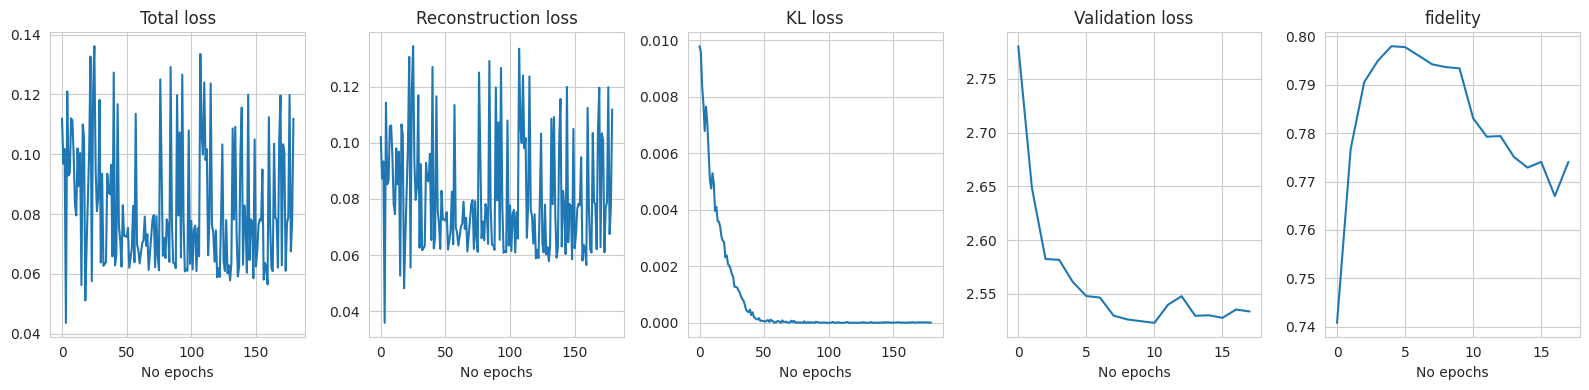

In [90]:
fig, ax = plt.subplots(1, 5, figsize=(16,4))

titles=['Total loss', 'Reconstruction loss', 'KL loss', 'Validation loss']
for idx, (key, value) in enumerate(logdict.items()):
    ax[idx].plot(value)
    ax[idx].set(title=titles[idx], xlabel="No epochs")

ax[4].plot(fidelity_list)
ax[4].set(title="fidelity", xlabel="No epochs")

plt.tight_layout()
plt.show()

In [91]:
n_samples = 1000
random_samples = torch.randn(n_samples, 4)
output_dist = np.zeros((n_samples, pow(2,4)))

for idx, sample in enumerate(random_samples):
    with torch.no_grad():
        processed_sample = model.preprocessor(sample)
        output_dist[idx, :] = model.decoder(processed_sample)

In [92]:
original_results

orig_dist_sorted = []
for bitstring in all_bitstrings:
    orig_dist_sorted.append(original_results[bitstring])

In [93]:
final_fidelity = 0
for idx in range(16):
    final_fidelity += np.sqrt(orig_dist_sorted[idx]*output_dist.mean(axis=0)[idx])
final_fidelity = final_fidelity**2

print("Learnt distribution fidelity:", final_fidelity)

Learnt distribution fidelity: 0.7739774046077187


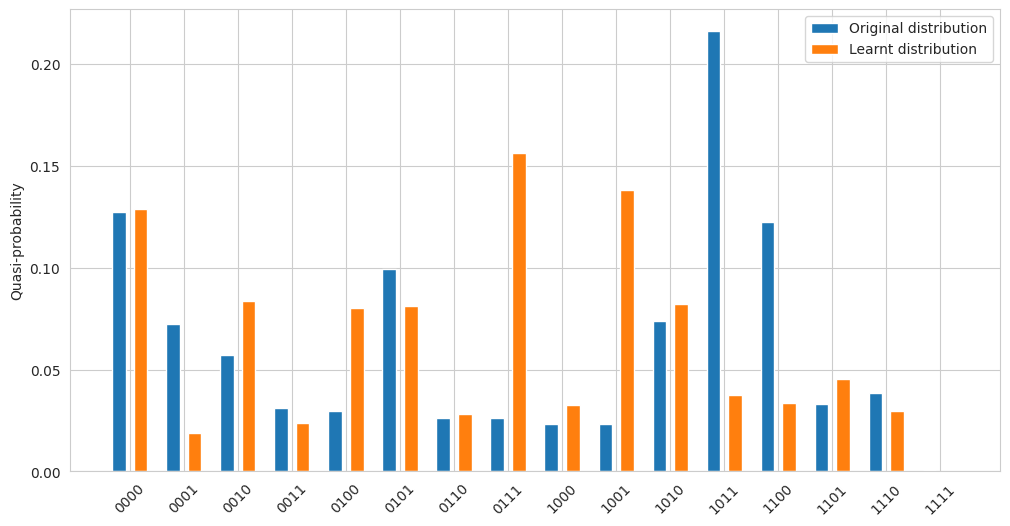

In [94]:
plt.bar(np.arange(16)-0.2, orig_dist_sorted, width=0.25, label="Original distribution")
plt.bar(np.arange(16)+0.2, output_dist.mean(axis=0), width=0.25, label="Learnt distribution")

plt.legend()
plt.xticks(np.arange(16), all_bitstrings, rotation=45)
plt.ylabel("Quasi-probability")
plt.show()

In [95]:
# The parameters of the ansatz the yield the same measurement distribution are: 
list(model.decoder.parameters())


[Parameter containing:
 tensor([ 0.2006, -0.2094,  0.5511,  0.5791,  0.6166,  0.7083,  0.4283,  0.5830,
          0.1811,  0.3377, -0.0947, -1.0862, -0.7419,  0.1622, -0.2833, -0.2897,
         -0.4894,  0.6269,  0.7199, -0.3103,  1.2194,  0.9253, -1.0506, -1.0868],
        requires_grad=True)]

# References
1. A wikipedia page on Autoencoder: https://en.wikipedia.org/wiki/Autoencoder

2. Romero, Jonathan, Jonathan P. Olson, and Alan Aspuru-Guzik. "Quantum autoencoders for efficient compression of quantum data." Quantum Science and Technology 2.4 (2017): 045001.

3. Swap Test Algorithm: https://en.wikipedia.org/wiki/Swap_test
4. https://doi.org/10.48550/arXiv.2305.01592

# Saving, Loading Qiskit Machine Learning Models and Continuous Training

In the first part of this lecture we will cover how to:

* Generate a simple dataset, split it into training/test datasets and plot them
* Train and save a model
* Load a saved model and resume training
* Evaluate performance of models
* PyTorch hybrid models

First off, we start from the required imports. We'll heavily use SciKit-Learn on the data preparation step. In the next cell we also fix a random seed for reproducibility purposes.

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit.circuit.library import RealAmplitudes
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from qiskit_machine_learning.algorithms.classifiers import VQC

from IPython.display import clear_output

algorithm_globals.random_seed = 42

We will be using two quantum simulators, in particular, two instances of the `Sampler` primitive. We'll start training on the first one, then will resume training on the second one. The approach shown in this tutorial can be used to train a model on a real hardware available on the cloud and then re-use the model for inference on a local simulator.

In [97]:
sampler1 = Sampler()

sampler2 = Sampler()

## 1. Prepare a dataset

Next step is to prepare a dataset. Here, we generate some data in the same way as in other tutorials. The difference is that we apply some transformations to the generated data. We generates `40` samples, each sample has `2` features, so our features is an array of shape `(40, 2)`. Labels are obtained by summing up features by columns and if the sum is more than `1` then this sample is labeled as `1` and `0` otherwise.

In [98]:
num_samples = 40
num_features = 2
features = 2 * algorithm_globals.random.random([num_samples, num_features]) - 1
labels = 1 * (np.sum(features, axis=1) >= 0)  # in { 0,  1}

Then, we scale down our features into a range of `[0, 1]` by applying `MinMaxScaler` from SciKit-Learn. Model training convergence is better when this  transformation is applied.

In [99]:
features = MinMaxScaler().fit_transform(features)
features.shape

(40, 2)

Let's take a look at the features of the first `5` samples of our dataset after the transformation.

In [100]:
features[0:5, :]

array([[0.79067335, 0.44566143],
       [0.88072937, 0.7126244 ],
       [0.06741233, 1.        ],
       [0.7770372 , 0.80422817],
       [0.10351936, 0.45754615]])

We choose `VQC` or Variational Quantum Classifier as a model we will train. This model, by default, takes one-hot encoded labels, so we have to transform the labels that are in the set of `{0, 1}` into one-hot representation. We employ SciKit-Learn for this transformation as well. Please note that the input array must be reshaped to `(num_samples, 1)` first. The `OneHotEncoder` encoder does not work with 1D arrays and our labels is a 1D array. In this case a user must decide either an array has only one feature(our case!) or has one sample. Also, by default the encoder returns sparse arrays, but for dataset plotting it is easier to have dense arrays, so we set `sparse` to `False`. 

In [101]:
labels = OneHotEncoder(sparse_output=False).fit_transform(labels.reshape(-1, 1))
labels.shape

(40, 2)

Let's take a look at the labels of the first `5` labels of the dataset. The labels should be one-hot encoded.

In [102]:
labels[0:5, :]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

Now we split our dataset into two parts: a training dataset and a test one. As a rule of thumb, 80% of a full dataset should go into a training part and 20% into a test one. Our training dataset has `30` samples. The test dataset should be used only once, when a model is trained to verify how well the model behaves on unseen data. We employ `train_test_split` from SciKit-Learn.

In [103]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=30, random_state=algorithm_globals.random_seed
)
train_features.shape

(30, 2)

Now it is time to see how our dataset looks like. Let's plot it.

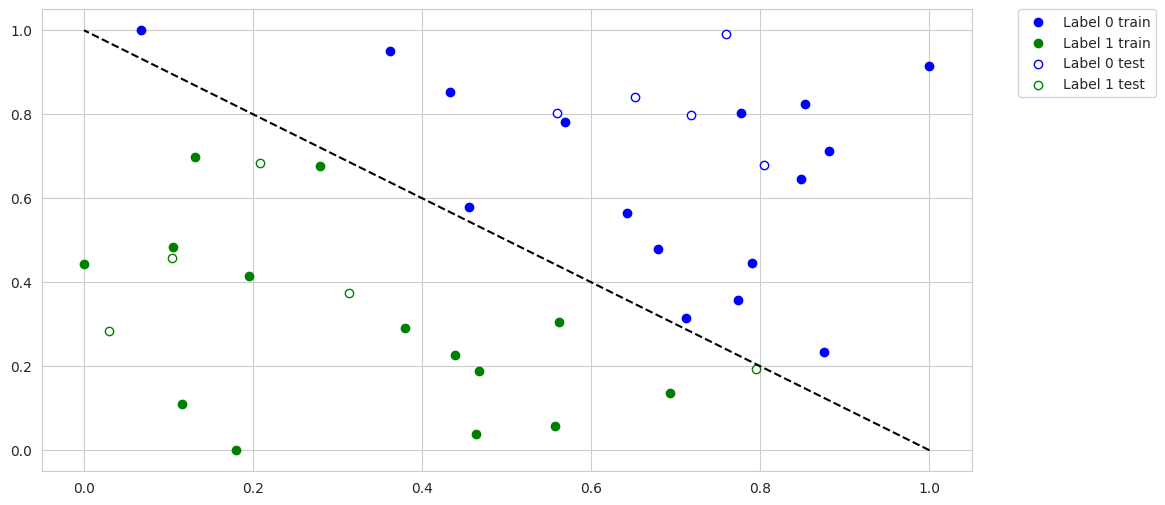

In [104]:
def plot_dataset():
    plt.scatter(
        train_features[np.where(train_labels[:, 0] == 0), 0],
        train_features[np.where(train_labels[:, 0] == 0), 1],
        marker="o",
        color="b",
        label="Label 0 train",
    )
    plt.scatter(
        train_features[np.where(train_labels[:, 0] == 1), 0],
        train_features[np.where(train_labels[:, 0] == 1), 1],
        marker="o",
        color="g",
        label="Label 1 train",
    )

    plt.scatter(
        test_features[np.where(test_labels[:, 0] == 0), 0],
        test_features[np.where(test_labels[:, 0] == 0), 1],
        marker="o",
        facecolors="w",
        edgecolors="b",
        label="Label 0 test",
    )
    plt.scatter(
        test_features[np.where(test_labels[:, 0] == 1), 0],
        test_features[np.where(test_labels[:, 0] == 1), 1],
        marker="o",
        facecolors="w",
        edgecolors="g",
        label="Label 1 test",
    )

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.plot([1, 0], [0, 1], "--", color="black")


plot_dataset()
plt.show()

On the plot above we see:

* Solid <span style="color:blue">blue</span> dots are the samples from the training dataset labeled as `0`
* Empty <span style="color:blue">blue</span> dots are the samples from the test dataset labeled as `0`
* Solid <span style="color:green">green</span> dots are the samples from the training dataset labeled as `1`
* Empty <span style="color:green">green</span> dots are the samples from the test dataset labeled as `1`

We'll train our model using solid dots and verify it using empty dots.

## 2. Train a model and save it

We'll train our model in two steps. On the first step we train our model in `20` iterations.

In [105]:
maxiter = 20

Create an empty array for callback to store values of the objective function.

In [106]:
objective_values = []

We re-use a callback function from the Neural Network Classifier & Regressor tutorial to plot iteration versus objective function value with some minor tweaks to plot objective values at each step.

In [107]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(_, objective_value):
    clear_output(wait=True)
    objective_values.append(objective_value)

    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")

    stage1_len = np.min((len(objective_values), maxiter))
    stage1_x = np.linspace(1, stage1_len, stage1_len)
    stage1_y = objective_values[:stage1_len]

    stage2_len = np.max((0, len(objective_values) - maxiter))
    stage2_x = np.linspace(maxiter, maxiter + stage2_len - 1, stage2_len)
    stage2_y = objective_values[maxiter : maxiter + stage2_len]

    plt.plot(stage1_x, stage1_y, color="orange")
    plt.plot(stage2_x, stage2_y, color="purple")
    plt.show()


plt.rcParams["figure.figsize"] = (12, 6)

As mentioned above we train a `VQC` model and set `COBYLA` as an optimizer with a chosen value of the `maxiter` parameter. Then we evaluate performance of the model to see how well it was trained. Then we save this model for a file. On the second step we load this model and will continue to work with it.

Here, we manually construct an ansatz to fix an initial point where to start optimization from.

In [108]:
original_optimizer = COBYLA(maxiter=maxiter)

ansatz = RealAmplitudes(num_features)
initial_point = np.asarray([0.5] * ansatz.num_parameters)

We create a model and set a sampler to the first sampler we created earlier.

In [109]:
original_classifier = VQC(
    ansatz=ansatz, optimizer=original_optimizer, callback=callback_graph, sampler=sampler1
)

Now it is time to train the model.

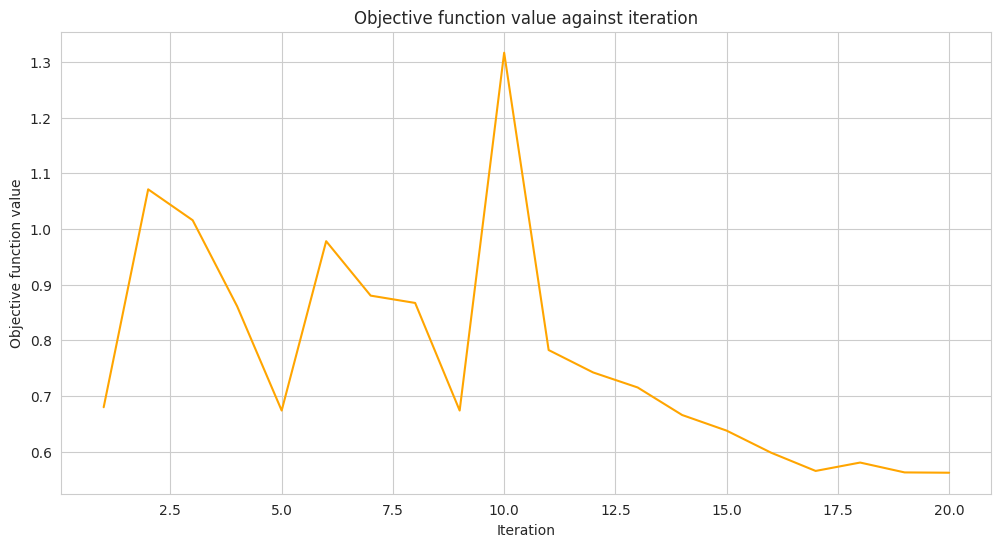

In [110]:
original_classifier.fit(train_features, train_labels)

Let's see how well our model performs after the first step of training.

In [111]:
print("Train score", original_classifier.score(train_features, train_labels))
print("Test score ", original_classifier.score(test_features, test_labels))

Train score 0.8
Test score  0.9


Next, we save the model. You may choose any file name you want. Please note that the `save` method does not append an extension if it is not specified in the file name.

In [112]:
original_classifier.save("vqc_classifier.model")

## 3. Load a model and continue training

To load a model a user have to call a class method `load` of the corresponding model class. In our case it is `VQC`. We pass the same file name we used in the previous section where we saved our model.

In [113]:
loaded_classifier = VQC.load("vqc_classifier.model")

Next, we want to alter the model in a way it can be trained further and on another simulator. To do so, we set the `warm_start` property. When it is set to `True` and `fit()` is called again the model uses weights from previous fit to start a new fit. We also set the `sampler` property of the underlying network to the second instance of the `Sampler` primitive we created in the beginning of the tutorial. Finally, we create and set a new optimizer with `maxiter` is set to `80`, so the total number of iterations is `100`.

In [114]:
loaded_classifier.warm_start = True
loaded_classifier.neural_network.sampler = sampler2
loaded_classifier.optimizer = COBYLA(maxiter=80)

Now we continue training our model from the state we finished in the previous section.

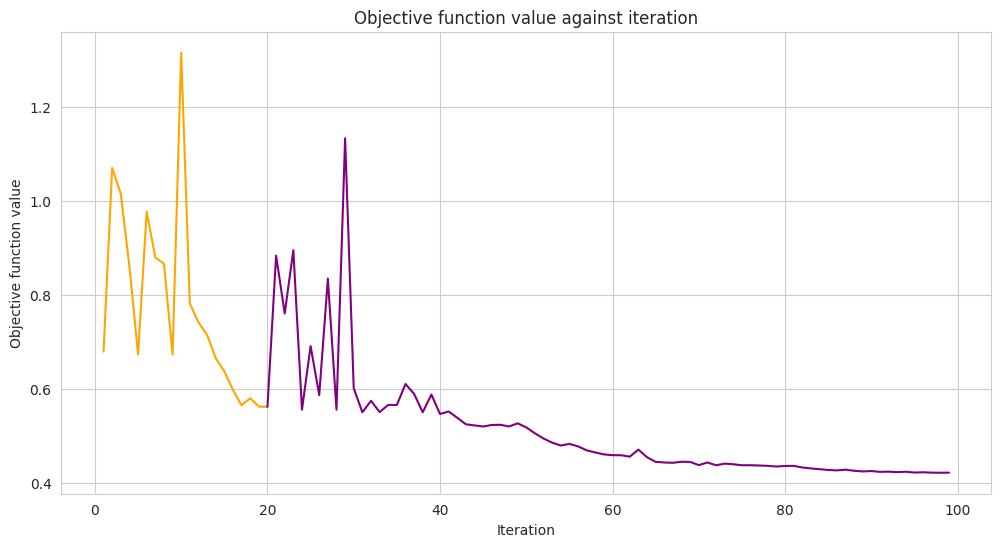

In [115]:
loaded_classifier.fit(train_features, train_labels)

In [116]:
print("Train score", loaded_classifier.score(train_features, train_labels))
print("Test score", loaded_classifier.score(test_features, test_labels))

Train score 0.8666666666666667
Test score 0.8


Let's see which data points were misclassified. First, we call `predict` to infer predicted values from the training and test features.

In [117]:
train_predicts = loaded_classifier.predict(train_features)
test_predicts = loaded_classifier.predict(test_features)

Plot the whole dataset and the highlight the points that were classified incorrectly.

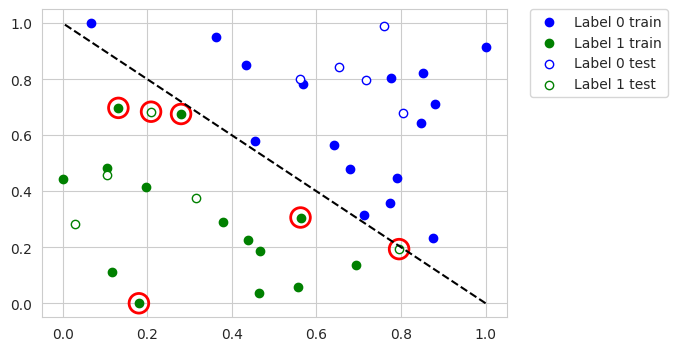

In [118]:
# return plot to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

plot_dataset()

# plot misclassified data points
plt.scatter(
    train_features[np.all(train_labels != train_predicts, axis=1), 0],
    train_features[np.all(train_labels != train_predicts, axis=1), 1],
    s=200,
    facecolors="none",
    edgecolors="r",
    linewidths=2,
)
plt.scatter(
    test_features[np.all(test_labels != test_predicts, axis=1), 0],
    test_features[np.all(test_labels != test_predicts, axis=1), 1],
    s=200,
    facecolors="none",
    edgecolors="r",
    linewidths=2,
)

So, if you have a large dataset or a large model you can train it in multiple steps as shown in this tutorial.

# PyTorch Workflow

![](01_a_pytorch_workflow.png)

You can have a more detailed look at PyTorch workflow [here](https://www.learnpytorch.io/)

# Torch Connector and Hybrid QNNs

This part introduces the `TorchConnector` class, and demonstrates how it allows for a natural integration of any `NeuralNetwork` from Qiskit Machine Learning into a PyTorch workflow. `TorchConnector` takes a `NeuralNetwork` and makes it available as a PyTorch `Module`. The resulting module can be seamlessly incorporated into PyTorch classical architectures and trained jointly without additional considerations, enabling the development and testing of novel **hybrid quantum-classical** machine learning architectures.



In [119]:
# Necessary imports

import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# Set seed for random generators
algorithm_globals.random_seed = 42

## Part 1: Simple Classification & Regression

### 1. Classification

First, we show how `TorchConnector` allows to train a Quantum `NeuralNetwork` to solve a classification tasks using PyTorch's automatic differentiation engine. In order to illustrate this, we will perform **binary classification** on a randomly generated dataset.

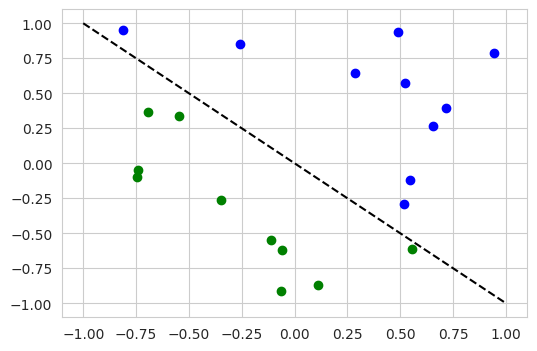

In [120]:
# Generate random dataset

# Select dataset dimension (num_inputs) and size (num_samples)
num_inputs = 2
num_samples = 20

# Generate random input coordinates (X) and binary labels (y)
X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}, y01 will be used for SamplerQNN example
y = 2 * y01 - 1  # in {-1, +1}, y will be used for EstimatorQNN example

# Convert to torch Tensors
X_ = Tensor(X)
y01_ = Tensor(y01).reshape(len(y)).long()
y_ = Tensor(y).reshape(len(y), 1)

# Plot dataset
for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

#### A. Classification with PyTorch and  `EstimatorQNN`

Linking an `EstimatorQNN` to PyTorch is relatively straightforward. Here we illustrate this by using the `EstimatorQNN` constructed from a feature map and an ansatz.

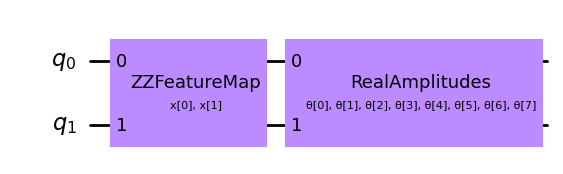

In [121]:
# Set up a circuit
feature_map = ZZFeatureMap(num_inputs)
ansatz = RealAmplitudes(num_inputs)
qc = QuantumCircuit(num_inputs)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw("mpl")

In [122]:
# Setup QNN
qnn1 = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

# Set up PyTorch module
# Note: If we don't explicitly declare the initial weights
# they are chosen uniformly at random from [-1, 1].
initial_weights = 0.1 * (2 * algorithm_globals.random.random(qnn1.num_weights) - 1)
model1 = TorchConnector(qnn1, initial_weights=initial_weights)
print("Initial weights: ", initial_weights)

Initial weights:  [-0.01256962  0.06653564  0.04005302 -0.03752667  0.06645196  0.06095287
 -0.02250432 -0.04233438]


In [123]:
# Test with a single input
model1(X_[0, :])

tensor([-0.3285], grad_fn=<_TorchNNFunctionBackward>)

##### Optimizer
The choice of optimizer for training any machine learning model can be crucial in determining the success of our training's outcome. When using `TorchConnector`, we get access to all of the optimizer algorithms defined in the [`torch.optim`] package ([link](https://pytorch.org/docs/stable/optim.html)). Some of the most famous algorithms used in popular machine learning architectures include *Adam*, *SGD*, or *Adagrad*. However, for this tutorial we will be using the L-BFGS algorithm (`torch.optim.LBFGS`), one of the most well know second-order optimization algorithms for numerical optimization. 

##### Loss Function
As for the loss function, we can also take advantage of PyTorch's pre-defined modules from `torch.nn`, such as the [Cross-Entropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) or [Mean Squared Error](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) losses.


**💡 Clarification :** 
In classical machine learning, the general rule of thumb is to apply a Cross-Entropy loss to classification tasks, and MSE loss to regression tasks. However, this recommendation is given under the assumption that the output of the classification network is a class probability value in the $[0, 1]$ range (usually this is achieved  through a Softmax layer). Because the following example for `EstimatorQNN` does not include such layer, and we don't apply any mapping to the output (the following section shows an example of application of parity mapping with `SamplerQNN`s), the QNN's output can take any value in the range $[-1, 1]$. In case you were wondering, this is the reason why this particular example uses MSELoss for classification despite it not being the norm (but we encourage you to experiment with different loss functions and see how they can impact training results). 

In [124]:
# Define optimizer and loss
optimizer = LBFGS(model1.parameters())
f_loss = MSELoss(reduction="sum")

# Start training
model1.train()  # set model to training mode


# Note from (https://pytorch.org/docs/stable/optim.html):
# Some optimization algorithms such as LBFGS need to
# reevaluate the function multiple times, so you have to
# pass in a closure that allows them to recompute your model.
# The closure should clear the gradients, compute the loss,
# and return it.
def closure():
    optimizer.zero_grad()  # Initialize/clear gradients
    loss = f_loss(model1(X_), y_)  # Evaluate loss function
    loss.backward()  # Backward pass
    print(loss.item())  # Print loss
    return loss


# Run optimizer step4
optimizer.step(closure)

25.535646438598633
22.696760177612305
20.039228439331055
19.68790626525879
19.267210006713867
19.025371551513672
18.154708862304688
17.33785629272461
19.082544326782227
17.07332420349121
16.21839141845703
14.992581367492676
14.929339408874512
14.914534568786621
14.907638549804688
14.902363777160645
14.902134895324707
14.90211009979248
14.902111053466797


tensor(25.5356, grad_fn=<MseLossBackward0>)

Accuracy: 0.8


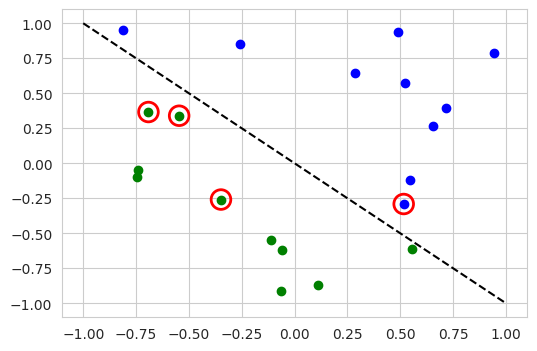

In [125]:
# Evaluate model and compute accuracy
model1.eval()
y_predict = []
for x, y_target in zip(X, y):
    output = model1(Tensor(x))
    y_predict += [np.sign(output.detach().numpy())[0]]

print("Accuracy:", sum(y_predict == y) / len(y))

# Plot results
# red == wrongly classified
for x, y_target, y_p in zip(X, y, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

The red circles indicate wrongly classified data points.

#### B. Classification with PyTorch and `SamplerQNN`

Linking a `SamplerQNN` to PyTorch requires a bit more attention than `EstimatorQNN`. Without the correct setup, backpropagation is not possible. 

In particular, we must make sure that we are returning a dense array of probabilities in the network's forward pass (`sparse=False`). This parameter is set up to `False` by default, so we just have to make sure that it has not been changed.

**⚠️ Attention:** 
If we define a custom interpret function ( in the example: `parity`), we must remember to explicitly provide the desired output shape ( in the example: `2`). For more info on the initial parameter setup for `SamplerQNN`, please check out the [official qiskit documentation](https://qiskit.org/ecosystem/machine-learning/stubs/qiskit_machine_learning.neural_networks.SamplerQNN.html).

In [126]:
# Define feature map and ansatz
feature_map = ZZFeatureMap(num_inputs)
ansatz = RealAmplitudes(num_inputs, entanglement="linear", reps=1)

# Define quantum circuit of num_qubits = input dim
# Append feature map and ansatz
qc = QuantumCircuit(num_inputs)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

# Define SamplerQNN and initial setup
parity = lambda x: "{:b}".format(x).count("1") % 2  # optional interpret function
output_shape = 2  # parity = 0, 1
qnn2 = SamplerQNN(
    circuit=qc,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    interpret=parity,
    output_shape=output_shape,
)

# Set up PyTorch module
# Reminder: If we don't explicitly declare the initial weights
# they are chosen uniformly at random from [-1, 1].
initial_weights = 0.1 * (2 * algorithm_globals.random.random(qnn2.num_weights) - 1)
print("Initial weights: ", initial_weights)
model2 = TorchConnector(qnn2, initial_weights)

Initial weights:  [ 0.0364991  -0.0720495  -0.06001836 -0.09852755]


For a reminder on optimizer and loss function choices, you can go back to [this section](#Optimizer).

In [127]:
# Define model, optimizer, and loss
optimizer = LBFGS(model2.parameters())
f_loss = CrossEntropyLoss()  # Our output will be in the [0,1] range

# Start training
model2.train()

# Define LBFGS closure method (explained in previous section)
def closure():
    optimizer.zero_grad(set_to_none=True)  # Initialize gradient
    loss = f_loss(model2(X_), y01_)  # Calculate loss
    loss.backward()  # Backward pass

    print(loss.item())  # Print loss
    return loss


# Run optimizer (LBFGS requires closure)
optimizer.step(closure);

0.6925069093704224
0.6881508231163025
0.6516684293746948
0.6485998034477234
0.6394745111465454
0.7055025100708008
0.6669358611106873
0.6768221259117126
0.6784337759017944
0.7485936284065247
0.6641563773155212
0.6561498045921326
0.66301429271698
0.6441987752914429
0.6511136293411255
0.6289191246032715
0.6247060298919678
0.6366127729415894
0.6195870041847229
0.6179186105728149


Accuracy: 0.8


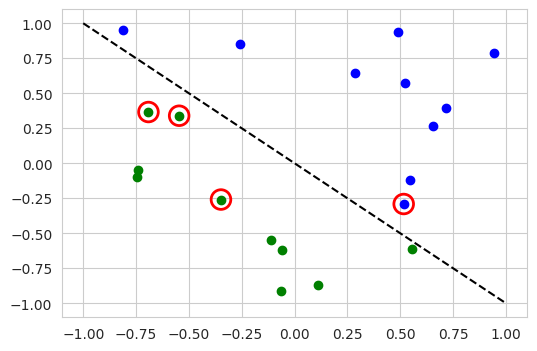

In [128]:
# Evaluate model and compute accuracy
model2.eval()
y_predict = []
for x in X:
    output = model2(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print("Accuracy:", sum(y_predict == y01) / len(y01))

# plot results
# red == wrongly classified
for x, y_target, y_ in zip(X, y01, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if y_target != y_:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

The red circles indicate wrongly classified data points.

### 2. Regression 

We use a model based on the `EstimatorQNN` to also illustrate how to perform a regression task. The chosen dataset in this case is randomly generated following a sine wave. 

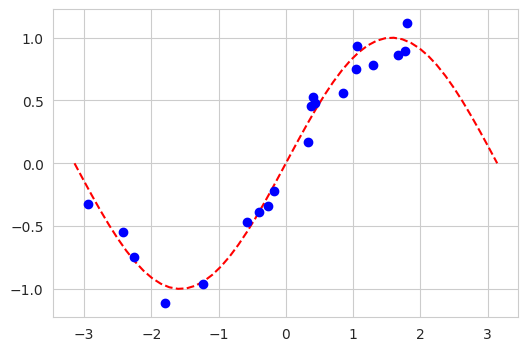

In [129]:
# Generate random dataset

num_samples = 20
eps = 0.2
lb, ub = -np.pi, np.pi
f = lambda x: np.sin(x)

X = (ub - lb) * algorithm_globals.random.random([num_samples, 1]) + lb
y = f(X) + eps * (2 * algorithm_globals.random.random([num_samples, 1]) - 1)
plt.plot(np.linspace(lb, ub), f(np.linspace(lb, ub)), "r--")
plt.plot(X, y, "bo")
plt.show()

#### A. Regression with PyTorch and `EstimatorQNN`

The network definition and training loop will be analogous to those of the classification task using `EstimatorQNN`. In this case, we define our own feature map and ansatz, but let's do it a little different.

In [130]:
# Construct simple feature map
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# Construct simple parameterized ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

qc = QuantumCircuit(1)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

# Construct QNN
qnn3 = EstimatorQNN(circuit=qc, input_params=[param_x], weight_params=[param_y])

# Set up PyTorch module
# Reminder: If we don't explicitly declare the initial weights
# they are chosen uniformly at random from [-1, 1].
initial_weights = 0.1 * (2 * algorithm_globals.random.random(qnn3.num_weights) - 1)
model3 = TorchConnector(qnn3, initial_weights)

For a reminder on optimizer and loss function choices, you can go back to [this section](#Optimizer).

In [131]:
# Define optimizer and loss function
optimizer = LBFGS(model3.parameters())
f_loss = MSELoss(reduction="sum")

# Start training
model3.train()  # set model to training mode

# Define objective function
def closure():
    optimizer.zero_grad(set_to_none=True)  # Initialize gradient
    loss = f_loss(model3(Tensor(X)), Tensor(y))  # Compute batch loss
    loss.backward()  # Backward pass
    print(loss.item())  # Print loss
    return loss


# Run optimizer
optimizer.step(closure)

14.947757720947266
2.948650360107422
8.952412605285645
0.37905153632164
0.24995625019073486
0.2483610212802887
0.24835753440856934


tensor(14.9478, grad_fn=<MseLossBackward0>)

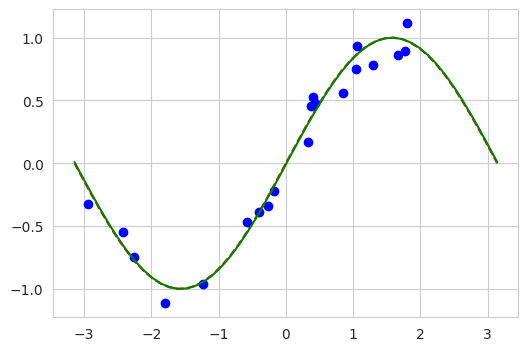

In [132]:
# Plot target function
plt.plot(np.linspace(lb, ub), f(np.linspace(lb, ub)), "r--")

# Plot data
plt.plot(X, y, "bo")

# Plot fitted line
model3.eval()
y_ = []
for x in np.linspace(lb, ub):
    output = model3(Tensor([x]))
    y_ += [output.detach().numpy()[0]]
plt.plot(np.linspace(lb, ub), y_, "g-")
plt.show()

***

## Part 2: MNIST Classification, Hybrid QNNs

In this second part, we show how to leverage a hybrid quantum-classical neural network using `TorchConnector`, to perform a more complex image classification task on the MNIST handwritten digits dataset. 

For a more detailed (pre-`TorchConnector`) explanation on hybrid quantum-classical neural networks, you can check out the corresponding section in the [Qiskit Textbook](https://qiskit.org/textbook/ch-machine-learning/machine-learning-qiskit-pytorch.html).

In [133]:
# Additional torch-related imports
import torch
from torch import cat, no_grad, manual_seed
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import (
    Module,
    Conv2d,
    Linear,
    Dropout2d,
    NLLLoss,
    MaxPool2d,
    Flatten,
    Sequential,
    ReLU,
)
import torch.nn.functional as F

### Step 1: Defining Data-loaders for train and test

We take advantage of the `torchvision` [API](https://pytorch.org/vision/stable/datasets.html) to directly load a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) and define torch `DataLoader`s ([link](https://pytorch.org/docs/stable/data.html)) for train and test.

In [134]:
# Train Dataset
# -------------

# Set train shuffle seed (for reproducibility)
manual_seed(42)

batch_size = 1
n_samples = 100  # We will concentrate on the first 100 samples

# Use pre-defined torchvision function to load MNIST train data
X_train = datasets.MNIST(
    root="./data", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()])
)

# Filter out labels (originally 0-9), leaving only labels 0 and 1
idx = np.append(
    np.where(X_train.targets == 0)[0][:n_samples], np.where(X_train.targets == 1)[0][:n_samples]
)
X_train.data = X_train.data[idx]
X_train.targets = X_train.targets[idx]

# Define torch dataloader with filtered data
train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)

If we perform a quick visualization we can see that the train dataset consists of images of handwritten 0s and 1s.

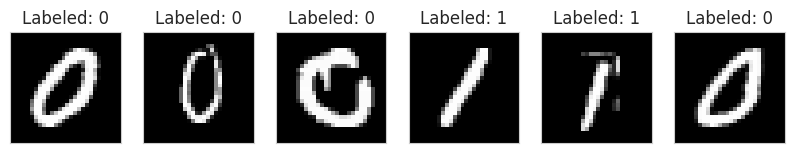

In [135]:
n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0, 0].numpy().squeeze(), cmap="gray")
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets[0].item()))

    n_samples_show -= 1

In [136]:
# Test Dataset
# -------------

# Set test shuffle seed (for reproducibility)
# manual_seed(5)

n_samples = 50

# Use pre-defined torchvision function to load MNIST test data
X_test = datasets.MNIST(
    root="./data", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()])
)

# Filter out labels (originally 0-9), leaving only labels 0 and 1
idx = np.append(
    np.where(X_test.targets == 0)[0][:n_samples], np.where(X_test.targets == 1)[0][:n_samples]
)
X_test.data = X_test.data[idx]
X_test.targets = X_test.targets[idx]

# Define torch dataloader with filtered data
test_loader = DataLoader(X_test, batch_size=batch_size, shuffle=True)

### Step 2: Defining the QNN and Hybrid Model

This second step shows the power of the `TorchConnector`. After defining our quantum neural network layer (in this case, a `EstimatorQNN`), we can embed it into a layer in our torch `Module` by initializing a torch connector as `TorchConnector(qnn)`.

**⚠️ Attention:**
In order to have an adequate gradient backpropagation in hybrid models,  we MUST set the initial parameter `input_gradients` to TRUE during the qnn initialization.

In [137]:
# Define and create QNN
def create_qnn():
    feature_map = ZZFeatureMap(2)
    ansatz = RealAmplitudes(2, reps=1)
    qc = QuantumCircuit(2)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)

    # REMEMBER TO SET input_gradients=True FOR ENABLING HYBRID GRADIENT BACKPROP
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True,
    )
    return qnn


qnn4 = create_qnn()

In [138]:
# Define torch NN module


class Net(Module):
    def __init__(self, qnn):
        super().__init__()
        self.conv1 = Conv2d(1, 2, kernel_size=5)
        self.conv2 = Conv2d(2, 16, kernel_size=5)
        self.dropout = Dropout2d()
        self.fc1 = Linear(256, 64)
        self.fc2 = Linear(64, 2)  # 2-dimensional input to QNN
        self.qnn = TorchConnector(qnn)  # Apply torch connector, weights chosen
        # uniformly at random from interval [-1,1].
        self.fc3 = Linear(1, 1)  # 1-dimensional output from QNN

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.qnn(x)  # apply QNN
        x = self.fc3(x)
        return cat((x, 1 - x), -1)


model4 = Net(qnn4)

### Step 3: Training

In [139]:
# Define model, optimizer, and loss function
optimizer = optim.Adam(model4.parameters(), lr=0.001)
loss_func = NLLLoss()

# Start training
epochs = 10  # Set number of epochs
loss_list = []  # Store loss history
model4.train()  # Set model to training mode

for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad(set_to_none=True)  # Initialize gradient
        output = model4(data)  # Forward pass
        loss = loss_func(output, target)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize weights
        total_loss.append(loss.item())  # Store loss
    loss_list.append(sum(total_loss) / len(total_loss))
    print("Training [{:.0f}%]\tLoss: {:.4f}".format(100.0 * (epoch + 1) / epochs, loss_list[-1]))

Training [10%]	Loss: -1.1630
Training [20%]	Loss: -1.5294
Training [30%]	Loss: -1.7855
Training [40%]	Loss: -1.9863
Training [50%]	Loss: -2.2257
Training [60%]	Loss: -2.4513
Training [70%]	Loss: -2.6758
Training [80%]	Loss: -2.8832
Training [90%]	Loss: -3.1006
Training [100%]	Loss: -3.3061


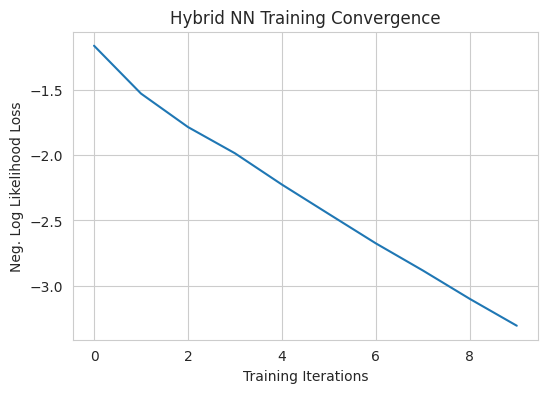

In [140]:
# Plot loss convergence
plt.plot(loss_list)
plt.title("Hybrid NN Training Convergence")
plt.xlabel("Training Iterations")
plt.ylabel("Neg. Log Likelihood Loss")
plt.show()

Now we'll save the trained model, just to show how a hybrid model can be saved and re-used later for inference. To save and load hybrid models, when using the TorchConnector, follow the PyTorch recommendations of saving and loading the models.

In [141]:
torch.save(model4.state_dict(), "model4.pt")

### Step 4: Evaluation

We start from recreating the model and loading the state from the previously saved file. You create a QNN layer using another simulator or a real hardware. So, you can train a model on real hardware available on the cloud and then for inference use a simulator or vice verse. For a sake of simplicity we create a new quantum neural network in the same way as above.

In [142]:
qnn5 = create_qnn()
model5 = Net(qnn5)
model5.load_state_dict(torch.load("model4.pt"))

<All keys matched successfully>

In [143]:
model5.eval()  # set model to evaluation mode
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model5(data)
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = loss_func(output, target)
        total_loss.append(loss.item())

    print(
        "Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%".format(
            sum(total_loss) / len(total_loss), correct / len(test_loader) / batch_size * 100
        )
    )

Performance on test data:
	Loss: -3.3585
	Accuracy: 100.0%


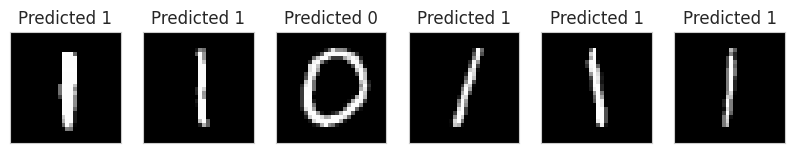

In [144]:
# Plot predicted labels

n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model5.eval()
with no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model5(data[0:1])
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)

        axes[count].imshow(data[0].numpy().squeeze(), cmap="gray")

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title("Predicted {}".format(pred.item()))

        count += 1

🎉🎉🎉🎉
**You are now able to experiment with your own hybrid datasets and architectures using Qiskit Machine Learning.** 
**Good Luck!**

# PyTorch qGAN Implementation




## 1. Introduction

A generative adversarial network (GAN) has two parts:

* The generator learns to generate plausible data. The generated instances become negative training examples for the discriminator.
* The discriminator learns to distinguish the generator's fake data from real data. The discriminator penalizes the generator for producing implausible results.

When training begins, the generator produces obviously fake data, and the discriminator quickly learns to tell that it's fake:
![](bad_gan.png)
As training progresses, the generator gets closer to producing output that can fool the discriminator:
![](ok_gan.png)
Finally, if generator training goes well, the discriminator gets worse at telling the difference between real and fake. It starts to classify fake data as real, and its accuracy decreases.
![](good_gan.png)
Here's a picture of the whole system:
![](gan_diagram.png)

Both the generator and the discriminator are neural networks. The generator output is connected directly to the discriminator input. Through backpropagation, the discriminator's classification provides a signal that the generator uses to update its weights.

Let's explain the pieces of this system in greater detail.

### The Discriminator 

The discriminator in a GAN is simply a classifier. It tries to distinguish real data from the data created by the generator. It could use any network architecture appropriate to the type of data it's classifying.
![](gan_diagram_discriminator.png)

The discriminator's training data comes from two sources:

* **Real data** instances, such as real pictures of people. The discriminator uses these instances as positive examples during training.
* **Fake data** instances created by the generator. The discriminator uses these instances as negative examples during training.

In the above figure, the two "Sample" boxes represent these two data sources feeding into the discriminator. During discriminator training the generator does not train. Its weights remain constant while it produces examples for the discriminator to train on.

#### Training the Discriminator 

The discriminator connects to two loss functions. During discriminator training, the discriminator ignores the generator loss and just uses the discriminator loss. We use the generator loss during generator training, as described in the next section.

During discriminator training:
1. The discriminator classifies both real data and fake data from the generator.
2. The discriminator loss penalizes the discriminator for misclassifying a real instance as fake or a fake instance as real.
3. The discriminator updates its weights through backpropagation from the discriminator loss through the discriminator network.
### The Generator
The generator part of a GAN learns to create fake data by incorporating feedback from the discriminator. It learns to make the discriminator classify its output as real.

Generator training requires tighter integration between the generator and the discriminator than discriminator training requires. The portion of the GAN that trains the generator includes:
* random input
* generator network, which transforms the random input into a data instance
* discriminator network, which classifies the generated data
* discriminator output
* generator loss, which penalizes the generator for failing to fool the discriminator

![](gan_diagram_generator.png)

Neural networks need some form of input. Normally we input data that we want to do something with, like an instance that we want to classify or make a prediction about. But what do we use as input for a network that outputs entirely new data instances?

In its most basic form, a GAN takes random noise as its input. The generator then transforms this noise into a meaningful output. By introducing noise, we can get the GAN to produce a wide variety of data, sampling from different places in the target distribution.

Experiments suggest that the distribution of the noise doesn't matter much, so we can choose something that's easy to sample from, like a uniform distribution. For convenience the space from which the noise is sampled is usually of smaller dimension than the dimensionality of the output space.

#### Using the Discriminator to Train the Generator

To train a neural net, we alter the net's weights to reduce the error or loss of its output. In our GAN, however, the generator is not directly connected to the loss that we're trying to affect. The generator feeds into the discriminator net, and the discriminator produces the output we're trying to affect. The generator loss penalizes the generator for producing a sample that the discriminator network classifies as fake.

This extra chunk of network must be included in backpropagation. Backpropagation adjusts each weight in the right direction by calculating the weight's impact on the output — how the output would change if you changed the weight. But the impact of a generator weight depends on the impact of the discriminator weights it feeds into. So backpropagation starts at the output and flows back through the discriminator into the generator.

At the same time, we don't want the discriminator to change during generator training. Trying to hit a moving target would make a hard problem even harder for the generator.

So we train the generator with the following procedure:
1. Sample random noise.
2. Produce generator output from sampled random noise.
3. Get discriminator "Real" or "Fake" classification for generator output.
4. Calculate loss from discriminator classification.
5. Backpropagate through both the discriminator and generator to obtain gradients.
6. Use gradients to change only the generator weights.

This is one iteration of generator training. In the next section we'll see how to juggle the training of both the generator and the discriminator.

### GAN Training

Because a GAN contains two separately trained networks, its training algorithm must address two complications:
* GANs must juggle two different kinds of training (generator and discriminator).
* GAN convergence is hard to identify.

#### Alternating Training

The generator and the discriminator have different training processes. So how do we train the GAN as a whole?

GAN training proceeds in alternating periods:
1. The discriminator trains for one or more epochs.
2. The generator trains for one or more epochs.
3. Repeat steps 1 and 2 to continue to train the generator and discriminator networks.

We keep the generator constant during the discriminator training phase. As discriminator training tries to figure out how to distinguish real data from fake, it has to learn how to recognize the generator's flaws. That's a different problem for a thoroughly trained generator than it is for an untrained generator that produces random output.

Similarly, we keep the discriminator constant during the generator training phase. Otherwise the generator would be trying to hit a moving target and might never converge.

It's this back and forth that allows GANs to tackle otherwise intractable generative problems. We get a toehold in the difficult generative problem by starting with a much simpler classification problem. Conversely, if you can't train a classifier to tell the difference between real and generated data even for the initial random generator output, you can't get the GAN training started.

#### Convergence

As the generator improves with training, the discriminator performance gets worse because the discriminator can't easily tell the difference between real and fake. If the generator succeeds perfectly, then the discriminator has a 50% accuracy. In effect, the discriminator flips a coin to make its prediction.

This progression poses a problem for convergence of the GAN as a whole: the discriminator feedback gets less meaningful over time. If the GAN continues training past the point when the discriminator is giving completely random feedback, then the generator starts to train on junk feedback, and its own quality may collapse.

For a GAN, convergence is often a fleeting, rather than stable, state.

### hybird qGAN

The first model we will consider \[1\] is a hybrid quantum-classical algorithm used for generative modeling tasks. The algorithm uses the interplay of a quantum generator $G_{\theta}$, i.e., an ansatz (parametrized quantum circuit), and a classical discriminator $D_{\phi}$, a neural network, to learn the underlying probability distribution given training data.

The generator and discriminator are trained in alternating optimization steps, where the generator aims at generating probabilities that will be classified by the discriminator as training data values (i.e, probabilities from the real training distribution), and the discriminator tries to differentiate between original distribution and probabilities from the generator (in other words, telling apart the real and generated distributions). The final goal is for the quantum generator to learn a representation for the target probability distribution.
The trained quantum generator can, thus, be used to load a quantum state which is an approximate model of the target distribution.

**References:**

\[1\] Zoufal et al., [Quantum Generative Adversarial Networks for learning and loading random distributions](https://www.nature.com/articles/s41534-019-0223-2)

### 1.1. qGANs for Loading Random Distributions

Given $k$-dimensional data samples, we employ a quantum Generative Adversarial Network (qGAN) to learn a random distribution and to load it directly into a quantum state:

$$ \big| g_{\theta}\rangle = \sum_{j=0}^{2^n-1} \sqrt{p_{\theta}^{j}}\big| j \rangle $$

where $p_{\theta}^{j}$ describe the occurrence probabilities of the basis states $\big| j\rangle$.

The aim of the qGAN training is to generate a state $\big| g_{\theta}\rangle$ where $p_{\theta}^{j}$, for $j\in \left\{0, \ldots, {2^n-1} \right\}$, describe a probability distribution that is close to the distribution underlying the training data $X=\left\{x^0, \ldots, x^{k-1} \right\}$.

For further details please refer to [Quantum Generative Adversarial Networks for Learning and Loading Random Distributions](https://arxiv.org/abs/1904.00043) _Zoufal, Lucchi, Woerner_ \[2019\].

For an example of how to use a trained qGAN in an application, the pricing of financial derivatives, please see the
[Option Pricing with qGANs](https://qiskit.org/ecosystem/finance/tutorials/10_qgan_option_pricing.html) tutorial.

## 2. Data and Representation

First, we need to load our training data $X$.

In this tutorial, the training data is given by a 2D multivariate normal distribution.

The goal of the generator is to learn how to represent such distribution, and the trained generator should correspond to an $n$-qubit quantum state
\begin{equation}
|g_{\text{trained}}\rangle=\sum\limits_{j=0}^{k-1}\sqrt{p_{j}}|x_{j}\rangle,
\end{equation}
where the basis states $|x_{j}\rangle$ represent the data items in the training data set
$X={x_0, \ldots, x_{k-1}}$ with $k\leq 2^n$ and $p_j$ refers to the sampling probability
of $|x_{j}\rangle$.

To facilitate this representation, we need to map the samples from the multivariate
normal distribution to discrete values. The number of values that can be represented
depends on the number of qubits used for the mapping.
Hence, the data resolution is defined by the number of qubits.
If we use $3$ qubits to represent one feature, we have $2^3 = 8$ discrete values.

We first begin by fixing seeds in the random number generators for reproducibility of the outcome in this tutorial.

In [145]:
import torch
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123456
_ = torch.manual_seed(123456)  # suppress output

We fix the number of dimensions, the discretization number and compute the number of qubits required as $2^3 = 8$.

In [146]:
import numpy as np

num_dim = 2
num_discrete_values = 8
num_qubits = num_dim * int(np.log2(num_discrete_values))

Then, we prepare a discrete distribution from the continuous 2D normal distribution. We evaluate the continuous probability density function (PDF) on the grid $(-2, 2)^2$ with a discretization of $8$ values per feature. Thus, we have $64$ values of the PDF. Since this will be a discrete distribution we normalize the obtained probabilities.

In [147]:
from scipy.stats import multivariate_normal

coords = np.linspace(-2, 2, num_discrete_values)
rv = multivariate_normal(mean=[0.0, 0.0], cov=[[1, 0], [0, 1]], seed=algorithm_globals.random_seed)
grid_elements = np.transpose([np.tile(coords, len(coords)), np.repeat(coords, len(coords))])
prob_data = rv.pdf(grid_elements)
prob_data = prob_data / np.sum(prob_data)

Let's visualize our distribution. It is a nice bell-shaped bivariate normal distribution on a discrete grid.

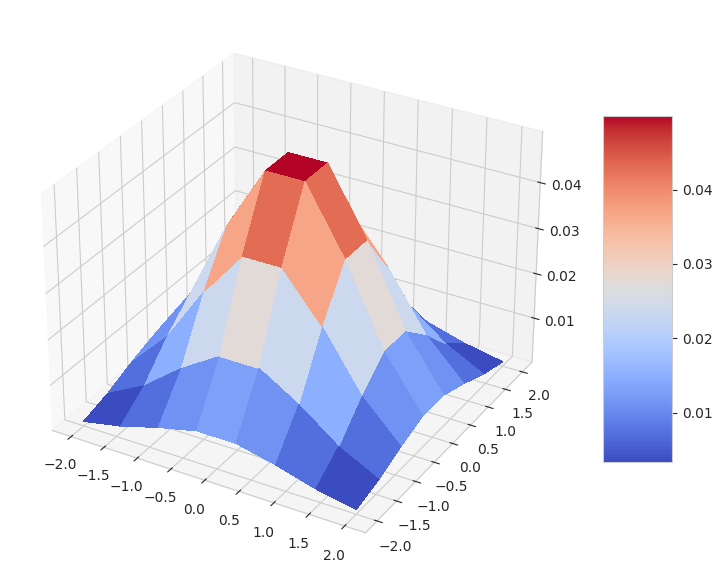

In [148]:
import matplotlib.pyplot as plt
from matplotlib import cm

mesh_x, mesh_y = np.meshgrid(coords, coords)
grid_shape = (num_discrete_values, num_discrete_values)

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={"projection": "3d"})
prob_grid = np.reshape(prob_data, grid_shape)
surf = ax.plot_surface(mesh_x, mesh_y, prob_grid, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## 3. Definitions of the Neural Networks
In this section we define two neural networks as described above:

- A quantum generator as a quantum neural network.
- A classical discriminator as a PyTorch-based neural network.

### 3.1. Definition of the quantum neural network ansatz

Now, we define the parameterized quantum circuit $G\left(\boldsymbol{\theta}\right)$ with $\boldsymbol{\theta} = {\theta_1, ..., \theta_k}$ which will be used in our quantum generator.

To implement the quantum generator, we choose a hardware efficient ansatz with $6$ repetitions. The ansatz implements $R_Y$, $R_Z$ rotations and $CX$ gates which takes a uniform distribution as an input state. Notably, for $k>1$ the generator's parameters must be chosen carefully. For example, the circuit depth should be more than $1$ because higher circuit depths enable the representation of more complex structures. Here, we construct quite a deep circuit with a large number of parameters to be able to adequately capture and represent the distribution.

In [149]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import EfficientSU2

qc = QuantumCircuit(num_qubits)
qc.h(qc.qubits)

ansatz = EfficientSU2(num_qubits, reps=6)
qc.compose(ansatz, inplace=True)

Let's draw our circuit and see what it looks like. On the plot we may notice a pattern that appears $6$ times.

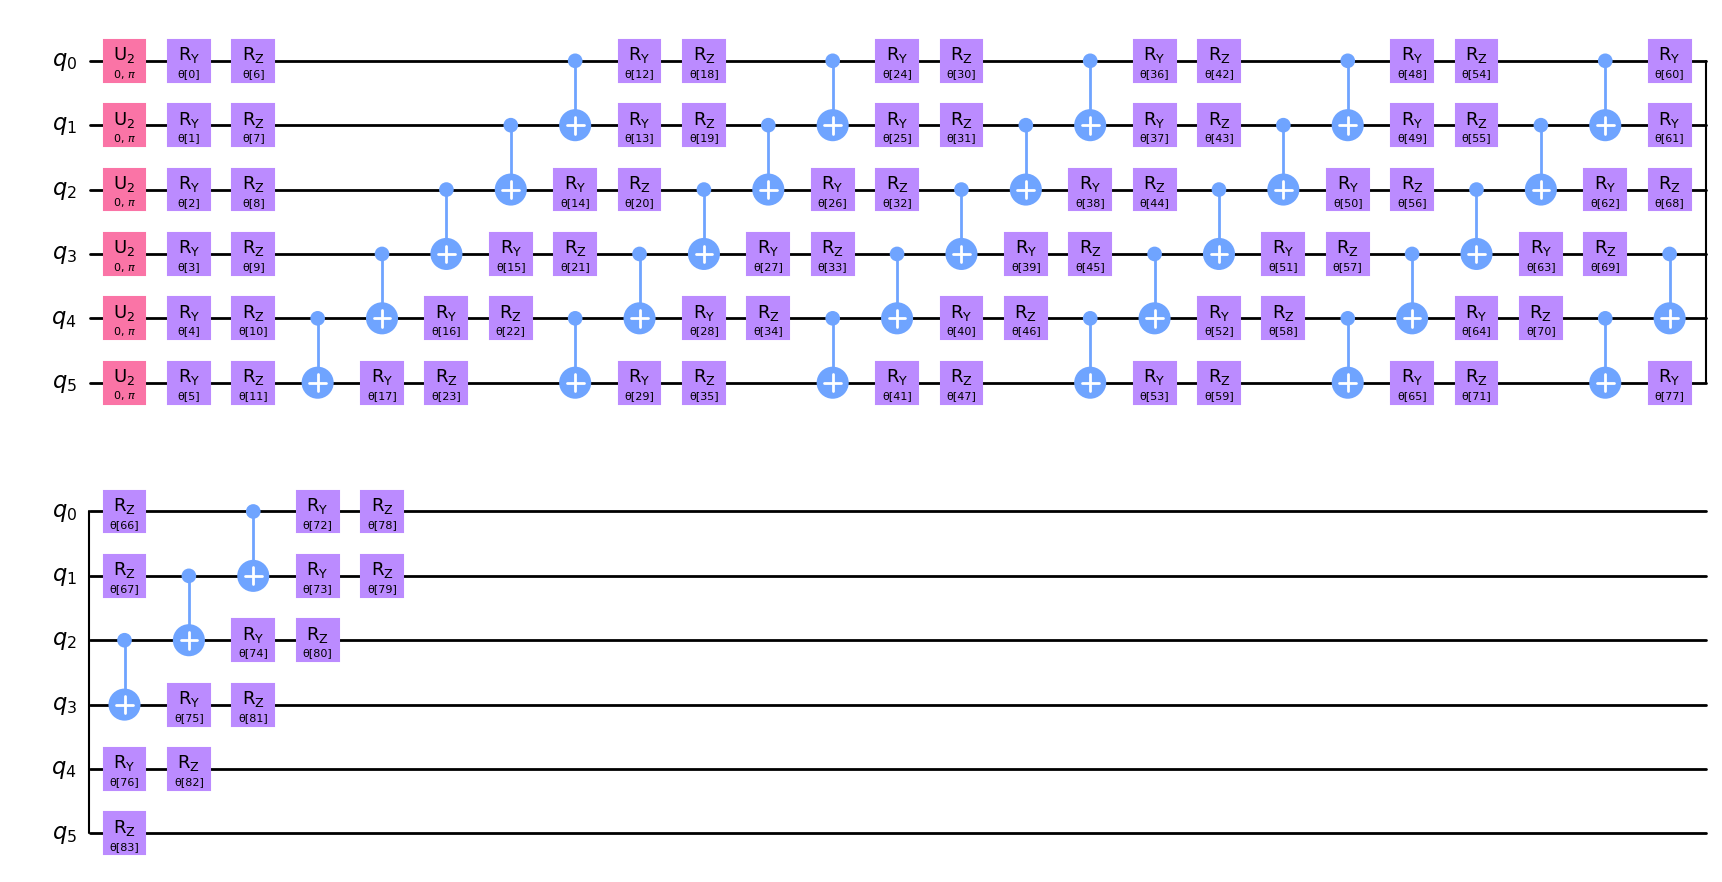

In [150]:
qc.decompose().draw("mpl")

Let's print the number of trainable parameters.

In [151]:
qc.num_parameters

84

### 3.2. Definition of the quantum generator

We start defining the generator by creating a sampler for the ansatz. The reference implementation is a statevector-based implementation, thus it returns exact probabilities as a result of circuit execution. We add the `shots` parameter to add some noise to the results. In this case the implementation samples probabilities from the multinomial distribution constructed from the measured quasi probabilities. And as usual we fix the seed for reproducibility purposes.

In [152]:
from qiskit.primitives import Sampler

shots = 10000
sampler = Sampler(options={"shots": shots, "seed": algorithm_globals.random_seed})

Next, we define a function that creates the quantum generator from a given parameterized quantum circuit. Inside this function we create a neural network that returns the quasi probability distribution evaluated by the underlying Sampler. We fix `initial_weights` for reproducibility purposes. In the end we wrap the created quantum neural network in `TorchConnector` to make use of PyTorch-based training.

In [153]:
from qiskit_machine_learning.connectors import TorchConnector
from qiskit_machine_learning.neural_networks import SamplerQNN


def create_generator() -> TorchConnector:
    qnn = SamplerQNN(
        circuit=qc,
        sampler=sampler,
        input_params=[],
        weight_params=qc.parameters,
        sparse=False,
    )

    initial_weights = algorithm_globals.random.random(qc.num_parameters)
    return TorchConnector(qnn, initial_weights)

### 3.3. Definition of the classical discriminator

Next, we define a PyTorch-based classical neural network that represents the classical discriminator. The underlying gradients can be automatically computed with PyTorch.

In [154]:
from torch import nn


class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()

        self.linear_input = nn.Linear(input_size, 20)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.linear20 = nn.Linear(20, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        x = self.linear_input(input)
        x = self.leaky_relu(x)
        x = self.linear20(x)
        x = self.sigmoid(x)
        return x

### 3.4. Create a generator and a discriminator

Now we create a generator and a discriminator.

In [155]:
generator = create_generator()
discriminator = Discriminator(num_dim)

## 4. Setting up the Training Loop
In this section we set up:

- A loss function for the generator and discriminator.
- Optimizers for both.
- A utility plotting function to visualize training process.

### 4.1. Definition of the loss functions
We want to train the generator and the discriminator with binary cross entropy as the loss function:
$$L\left(\boldsymbol{\theta}\right)=\sum_jp_j\left(\boldsymbol{\theta}\right)\left[y_j\log(x_j) + (1-y_j)\log(1-x_j)\right],$$
where $x_j$ refers to a data sample and $y_j$ to the corresponding label.

Since PyTorch's `binary_cross_entropy` is not differentiable with respect to weights, we implement the loss function manually to be able to evaluate gradients.

In [156]:
def adversarial_loss(input, target, w):
    bce_loss = target * torch.log(input) + (1 - target) * torch.log(1 - input)
    weighted_loss = w * bce_loss
    total_loss = -torch.sum(weighted_loss)
    return total_loss

### 4.2. Definition of the optimizers
In order to train the generator and discriminator, we need to define optimization schemes. In the following, we employ a momentum based optimizer called Adam, see [Kingma et al., Adam: A method for stochastic optimization](https://arxiv.org/abs/1412.6980) for more details.

In [157]:
from torch.optim import Adam

lr = 0.01  # learning rate
b1 = 0.7  # first momentum parameter
b2 = 0.999  # second momentum parameter

generator_optimizer = Adam(generator.parameters(), lr=lr, betas=(b1, b2), weight_decay=0.005)
discriminator_optimizer = Adam(
    discriminator.parameters(), lr=lr, betas=(b1, b2), weight_decay=0.005
)

### 4.3. Visualization of the training process
We will visualize what is happening during the training by plotting the evolution of the generator's and the discriminator's loss functions during the training, as well as the progress in the relative entropy between the trained and the target distribution. We define a function that plots the loss functions and relative entropy. We call this function once an epoch of training is complete.

Visualization of the training process begins when training data is collected across two epochs.

In [158]:
from IPython.display import clear_output


def plot_training_progress():
    # we don't plot if we don't have enough data
    if len(generator_loss_values) < 2:
        return

    clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

    # Generator Loss
    ax1.set_title("Loss")
    ax1.plot(generator_loss_values, label="generator loss", color="royalblue")
    ax1.plot(discriminator_loss_values, label="discriminator loss", color="magenta")
    ax1.legend(loc="best")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Loss")
    ax1.grid()

    # Relative Entropy
    ax2.set_title("Relative entropy")
    ax2.plot(entropy_values)
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Relative entropy")
    ax2.grid()

    plt.show()

## 5. Model Training
In the training loop we monitor not only loss functions, but relative entropy as well. The relative entropy describes a distance metric for distributions. Hence, we can use it to benchmark how close/far away the trained distribution is from the target distribution.

Now, we are ready to train our model. It may take some time to train the model so be patient.

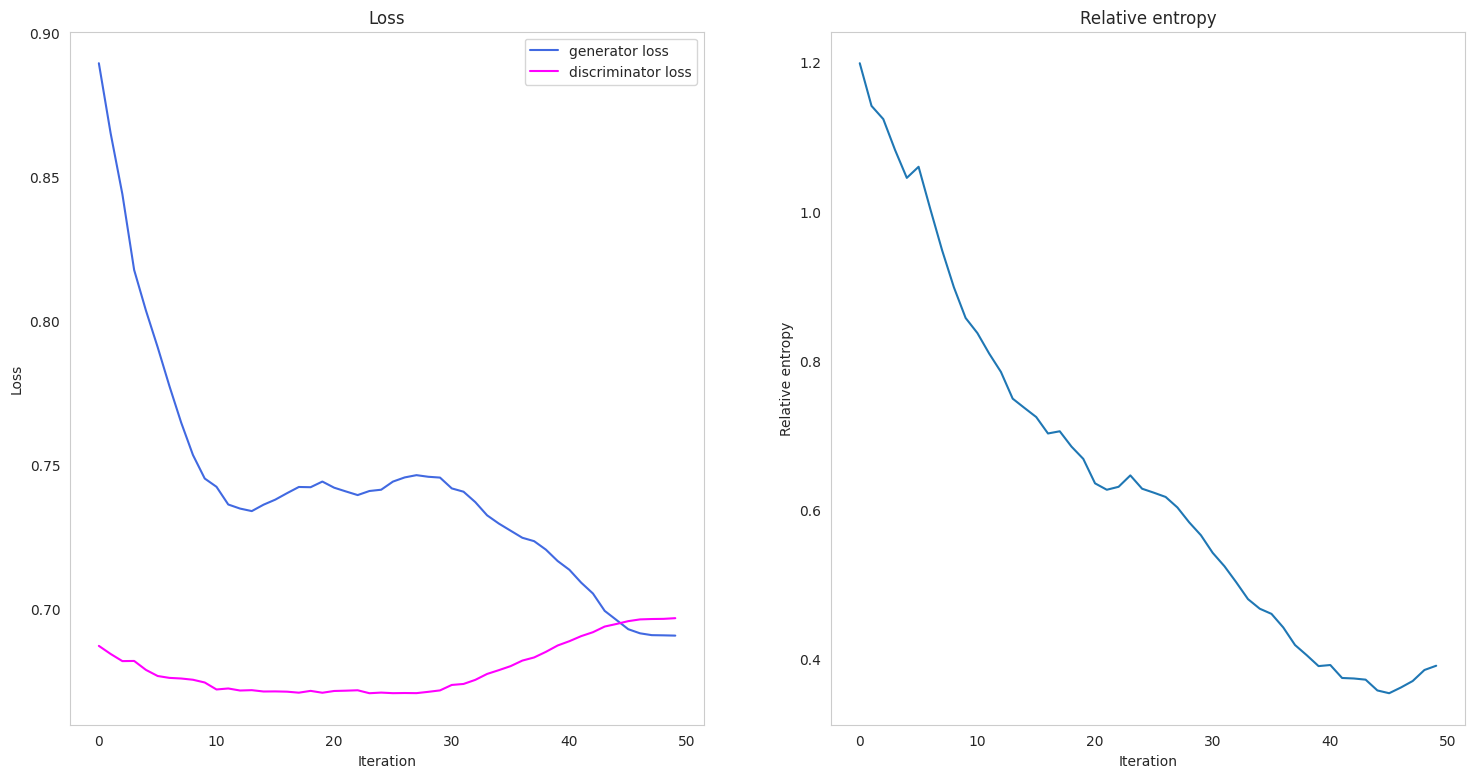

Fit in 74.94 sec


In [159]:
import time
from scipy.stats import multivariate_normal, entropy

n_epochs = 50

num_qnn_outputs = num_discrete_values**num_dim

generator_loss_values = []
discriminator_loss_values = []
entropy_values = []

start = time.time()
for epoch in range(n_epochs):

    valid = torch.ones(num_qnn_outputs, 1, dtype=torch.float)
    fake = torch.zeros(num_qnn_outputs, 1, dtype=torch.float)

    # Configure input
    real_dist = torch.tensor(prob_data, dtype=torch.float).reshape(-1, 1)

    # Configure samples
    samples = torch.tensor(grid_elements, dtype=torch.float)
    disc_value = discriminator(samples)

    # Generate data
    gen_dist = generator(torch.tensor([])).reshape(-1, 1)

    # Train generator
    generator_optimizer.zero_grad()
    generator_loss = adversarial_loss(disc_value, valid, gen_dist)

    # store for plotting
    generator_loss_values.append(generator_loss.detach().item())

    generator_loss.backward(retain_graph=True)
    generator_optimizer.step()

    # Train Discriminator
    discriminator_optimizer.zero_grad()

    real_loss = adversarial_loss(disc_value, valid, real_dist)
    fake_loss = adversarial_loss(disc_value, fake, gen_dist.detach())
    discriminator_loss = (real_loss + fake_loss) / 2

    # Store for plotting
    discriminator_loss_values.append(discriminator_loss.detach().item())

    discriminator_loss.backward()
    discriminator_optimizer.step()

    entropy_value = entropy(gen_dist.detach().squeeze().numpy(), prob_data)
    entropy_values.append(entropy_value)

    plot_training_progress()

elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} sec")

## 6. Results: Cumulative Density Functions
In this section we compare the cumulative distribution function (CDF) of the trained distribution to the CDF of the target distribution.

First, we generate a new probability distribution with PyTorch autograd turned off as we are not going to train the model anymore.

In [160]:
with torch.no_grad():
    generated_probabilities = generator().numpy()

And then, we plot the cumulative distribution functions of the generated distribution, original distribution, and the difference between them. Please, be careful, the scale on the third plot **is not the same** as on the first and second plot, and the actual difference between the two plotted CDFs is pretty small.

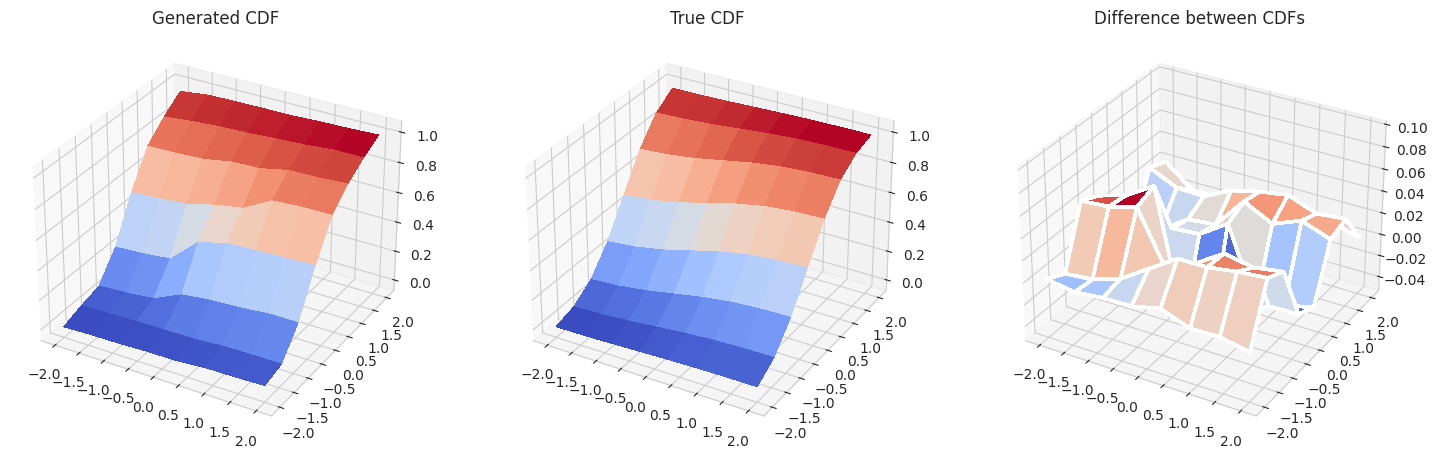

In [161]:
fig = plt.figure(figsize=(18, 9))

# Generated CDF
gen_prob_grid = np.reshape(np.cumsum(generated_probabilities), grid_shape)

ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax1.set_title("Generated CDF")
ax1.plot_surface(mesh_x, mesh_y, gen_prob_grid, linewidth=0, antialiased=False, cmap=cm.coolwarm)
ax1.set_zlim(-0.05, 1.05)

# Real CDF
real_prob_grid = np.reshape(np.cumsum(prob_data), grid_shape)

ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax2.set_title("True CDF")
ax2.plot_surface(mesh_x, mesh_y, real_prob_grid, linewidth=0, antialiased=False, cmap=cm.coolwarm)
ax2.set_zlim(-0.05, 1.05)

# Difference
ax3 = fig.add_subplot(1, 3, 3, projection="3d")
ax3.set_title("Difference between CDFs")
ax3.plot_surface(
    mesh_x, mesh_y, real_prob_grid - gen_prob_grid, linewidth=2, antialiased=False, cmap=cm.coolwarm
)
ax3.set_zlim(-0.05, 0.1)
plt.show()

## 7. Conclusion

Quantum generative adversarial networks employ the interplay of a generator and discriminator to map an approximate representation of a probability distribution underlying given data samples into a quantum channel. This tutorial presents a self-standing PyTorch-based qGAN implementation where the generator is given by a quantum channel, i.e., a variational quantum circuit, and the discriminator by a classical neural network, and discusses the application of efficient learning and loading of generic probability distributions into quantum states. The loading requires $\mathscr{O}\left(poly\left(n\right)\right)$ gates and can thus enable the use of potentially advantageous quantum algorithms.

# Do it yourself

 You can also create a qGAN solely on quantum hardware. The ability of quantum information processors to represent vectors in N-dimensional spaces using logN qubits, and to perform manipulations of sparse and low-rank matrices in time O(poly(logN)) implies that QGANs exhibit a potential exponential advantage over classical GANs when the object of the game is to reproduce the statistics of measurements made on very high-dimensional data sets. In other words, QGANs have a potential exponential speedup when generating data made on very high-dimensional data sets.

Construct a Quantum Generative Adversarial Network (QGAN) from (Lloyd and Weedbrook (2018), Dallaire-Demers and Killoran (2018)) using two subcircuits, a generator and a discriminator.
 

## Generator and discriminator
In this QGAN example, we will use a quantum circuit to generate the real data.

For this simple example, our real data will be a qubit that has been rotated (from the starting state $|0⟩$) to some arbitrary, but fixed, state. 

Create a three qubit circuit, create a function that rotates the first qubit to a fixed angle. 

In [162]:
def real(angles):
    ## Hadamard + Rotation on wire 0

SyntaxError: unexpected EOF while parsing (3922192829.py, line 2)

For the generator and discriminator, choose the basic two-wire layer circuit structure, acting on different wires.

Both the real data circuit and the generator should output on wire 0, which will be connected as an input to the discriminator. Wire 1 will provide a workspace for the generator, while the discriminator’s output shall be on wire 2.

In [ ]:
def generator(w):
    # A 3 layer basic NN or similar acting on wires 0 and 1 

def discriminator(w):
    # A 3 layer basic NN or similar acting on wires 0 and 2 

def real_disc_circuit(phi, theta, omega, disc_weights):
    real([phi, theta, omega])
    discriminator(disc_weights)
    ### Return the expectation value of Pauli Z on wire 2
    
def gen_disc_circuit(gen_weights, disc_weights):
    generator(gen_weights)
    discriminator(disc_weights)
    ### Return the expectation value of Pauli Z on wire 2

## QGAN cost functions

There are two cost functions of interest, corresponding to the two stages of QGAN training. These cost functions are built from two pieces: the first piece is the probability that the discriminator correctly classifies real data as real. The second piece is the probability that the discriminator classifies fake data (i.e., a state prepared by the generator) as real.

The discriminator is trained to maximize the probability of correctly classifying real data, while minimizing the probability of mistakenly classifying fake data.
$$
Cost_D = \mathrm{Pr}(real|\mathrm{fake}) - \mathrm{Pr}(real|\mathrm{real})
$$
The generator is trained to maximize the probability that the discriminator accepts fake data as real.
$$
Cost_G = - \mathrm{Pr}(real|\mathrm{fake})
$$

In [ ]:
def prob_real_true(disc_weights):
    ## code me

def prob_fake_true(gen_weights, disc_weights):
    ## code me


def disc_cost(disc_weights):
    ## code me


def gen_cost(gen_weights):
    ## code me  


In the first stage of training, optimize the discriminator while keeping the generator parameters fixed. At the discriminator’s optimum, the probability for the discriminator to correctly classify the real data should be close to one.


In [ ]:
# code me

In the adversarial game we now have to train the generator to better fool the discriminator. 


In [ ]:
# code me

At the optimum of the generator, the probability for the discriminator to be fooled should be close to 1.
At the joint optimum the discriminator cost will be close to zero, indicating that the discriminator assigns equal probability to both real and generated data.

In [ ]:
#code me

Compare the states of the real data circuit and the generator. We expect the generator to have learned to be in a state that is very close to the one prepared in the real data circuit. An easy way to access the state of the first qubit is through its Bloch sphere representation. 

In [ ]:
#code me

# Classical shadows

Estimating properties of unknown quantum states is a key objective of quantum information science and technology. For example, one might want to check whether an apparatus prepares a particular target state, or verify that an unknown system is entangled. In principle, any unknown quantum state can be fully characterized by [quantum state tomography](https://arxiv.org/pdf/quant-ph/0302028.pdf). However, this procedure requires accurate expectation values for a set of observables whose size grows exponentially with the number of qubits. A potential workaround for these scaling concerns is provided by the classical shadow approximation introduced in a recent paper by Huang et al. (Huang, Hsin-Yuan, Richard Kueng, and John Preskill, “Predicting many properties of a quantum system from very few measurements”, Nature Physics 16.10 (2020): 1050-1057. ).

The approximation is an efficient protocol for constructing a *classical shadow* representation of an unknown quantum state. The classical shadow can be used to estimate properties such as quantum state fidelity, expectation values of Hamiltonians, entanglement witnesses, and two-point correlators.

![(Image from Huang et
al..)](./classical_shadow_overview.png)

## Constructing a Classical Shadow


Classical shadow estimation relies on the fact that for a particular choice of measurement, we can efficiently store snapshots of the state that contain enough information to accurately predict linear functions of observables. Depending on what type of measurements we choose, we
have an information-theoretic bound that allows us to control the precision of our estimator.

Let us consider an $n$-qubit quantum state $\rho$ (prepared by a circuit) and apply a random unitary $U$ to the state:

$$\rho \to U \rho U^\dagger.$$

Next, we measure in the computational basis and obtain a bit string of outcomes $|b\rangle = |0011\ldots10\rangle$. If the unitaries $U$ are chosen at random from a particular ensemble, then we can store the reverse operation $U^\dagger |b\rangle\langle b| U$ efficiently in
classical memory. We call this a *snapshot* of the state. Moreover, we can view the average over these snapshots as a measurement channel:

$$\mathbb{E}\left[U^\dagger |b\rangle\langle b| U\right] = \mathcal{M}(\rho).$$

If the ensemble of unitaries defines a tomographically complete set of measurements, we can invert the channel and reconstruct the state:

$$\rho = \mathbb{E}\left[\mathcal{M}^{-1}\left(U^\dagger |b\rangle\langle b| U \right)\right].$$

If we apply the procedure outlined above $N$ times, then the collection of inverted snapshots is what we call the *classical shadow*

$$S(\rho,N) = \left\{\hat{\rho}_1= \mathcal{M}^{-1}\left(U_1^\dagger |b_1\rangle\langle b_1| U_1 \right)
,\ldots, \hat{\rho}_N= \mathcal{M}^{-1}\left(U_N^\dagger |b_N\rangle\langle b_N| U_N \right)
\right\}.$$

The inverted channel is not physical, i.e., it is not completely postive and trace preserving (CPTP). However, this is of no concern to us, since all we care about is efficiently applying this inverse channel to the observed snapshots as a post-processing step.

Since the shadow approximates $\rho$, we can now estimate **any** observable with the empirical mean:

$$\langle O \rangle = \frac{1}{N}\sum_i \text{Tr}{\hat{\rho}_i O}.$$

Note that the classical shadow is independent of the observables we want to estimate, as $S(\rho,N)$ contains only information about the state!

Furthermore, the authors of prove that with a shadow of size $N$, we can predict $M$ arbitary linear functions $\text{Tr}{O_1\rho},\ldots,\text{Tr}{O_M \rho}$ up to an additive error
$\epsilon$ if $N\geq \mathcal{O}\left(\log{M} \max_i ||O_i||^2_{\text{shadow}}/\epsilon^2\right)$. The shadow norm $||O_i||^2_{\text{shadow}}$ depends on the unitary ensemble that is chosen.

Two different ensembles can be considered for selecting the random unitaries $U$:

1.  Random $n$-qubit Clifford circuits.
2.  Tensor products of random single-qubit Clifford circuits.

We can extend this idea further, to mitigate errors. 

![](./mitiq-logo.png)

[Mitiq](https://quantum-journal.org/papers/q-2022-08-11-774/) is a Python toolkit for implementing error mitigation techniques on quantum computers.

Current quantum computers are noisy due to interactions with the environment, imperfect gate applications, state preparation and measurement errors, etc. Error mitigation seeks to reduce these effects at the software level by compiling quantum programs in clever ways.

# Clifford Data Regression

Clifford data regression (CDR) is a learning-based quantum error mitigation technique in which an error mitigation model is trained with quantum circuits that _resemble_ the circuit of interest, but which are easier to classically simulate [1](https://link.aps.org/doi/10.1103/PhysRevResearch.3.033098), [2](http://dx.doi.org/10.22331/q-2021-11-26-592).

![](./cdr_workflow2_steps.png)

The CDR workflow Figure above shows a schema of the implementation of CDR in Mitiq. Similarly to ZNE and PEC, also CDR in Mitiq is divided in two main stages: The first one of circuit generation and the second for inference of the mitigated value. However, in CDR, the generation of quantum circuits is different, as it involves the generation of training circuits. The division of CDR into training, learning and prediction stages is shown in the figure below.


![](./cdr_diagram2.png)

Near-Clifford approximations of the actual circuit are simulated, without noise, on a classical simulator (circuits can be efficiently simulated classically) and executed on the noisy quantum computer (or a noisy simulator). These results are used as training data to infer the zero-noise expectation value of the error miitigated original circuit, that is finally run on the quantum computer (or noisy simulator)

# When should I use CDR?

## Advantages

The main advantage of CDR is that it can be applied without knowing the specific details of the noise
model. Indeed, in CDR, the effects of noise are indirectly _learned_ through the execution of an appropriate
set of test circuits. In this way, the final error mitigation inference tends to self-tune with respect
to the used backend.

This self-tuning property is even stronger in the case of _variable-noise-CDR_, i.e., when using the _scale_factors_ option
in {func}`.execute_with_cdr`. In this case, the final error mitigated expectation value is obtained
as a linear combination of noise-scaled expectation values. This is similar to the [ZNE approach](zne-5-theory.md) but, in CDR, 
the coefficients of the linear combination are learned instead of being fixed by the extrapolation model.


## Disadvantages

The main disadvantage of CDR is that the learning process is performed on a suite of test circuits which
only _resemble_ the original circuit of interest. Indeed, test circuits are _near-Clifford approximations_
of the original one. Only when the approximation is justified, the application of CDR can produce meaningful
results.
Increasing the `fraction_non_clifford` option in {func}`.execute_with_cdr` can alleviate this problem
to some extent. Note that, the larger `fraction_non_clifford` is, the larger the classical computation overhead is.

Another relevant aspect to consider is that, to apply CDR in a scalable way, a valid near-Clifford simulator
is necessary. Note that the computation cost of a valid near-Clifford simulator should scale with the number of non-Clifford
gates, independently from the circuit depth. Only in this case, the learning phase of CDR can be applied efficiently.


# What is the theory behind CDR?

Clifford data regression (CDR) is a quantum error mitigation technique that has been introduced in Ref. {cite}`Czarnik_2021_Quantum` and extended to variable-noise CDR in Ref. {cite}`Lowe_2021_PRR`.
. The presented error mitigation (EM) strategy is designed for gate-based quantum computers. This method primarily consists of creating a training data set $\{(X_{\phi_i}^{\text{error}}, X_{\phi_i}^{\text{exact}})\}$, where $X_{\phi_i}^{\text{error}}$ and $X_{\phi_i}^{\text{exact}}$ are the expectation values of an observable $X$ for a state $|\phi_i\rangle$ under error and error-free conditions, respectively. 

This method includes the following steps:

## Step 1: Choose Near-Clifford Circuits for Training

Near-Clifford circuits are selected due to their capability to be efficiently simulated classically, and are denoted by $S_\psi=\{|\phi_i\rangle\}_i$.

## Step 2: Construct the Training Set 

The training set $\{(X_{\phi_i}^{\text{error}}, X_{\phi_i}^{\text{exact}})\}_i$ is constructed by calculating the expectation values of $X$ for each state $|\phi_i\rangle$ in $S_\psi$, on both a quantum computer (to obtain $X_{\phi_i}^{\text{error}}$) and a classical computer (to obtain $X_{\phi_i}^{\text{exact}}$).

## Step 3: Learn the Error Mitigation Model

A model $f(X^{\text{error}}, a)$ for $X^{exact}$ is defined and learned. Here, $a$ is the set of parameters to be determined. This is achieved by minimizing the distance between the training set, as expressed by the following optimization problem:

$$a_{opt} = \underset{a}{\text{argmin}} \sum_i \left| X_{\phi_i}^{\text{exact}} - f(X_{\phi_i}^{\text{error}},a) \right|^2.$$

In this expression, $a_{opt}$ are the parameters that minimize the cost function.

## Step 4: Apply the Error Mitigation Model

Finally, the learned model $f(X^{\text{error}}, a_{opt})$ is used to correct the expectation values of $X$ for new quantum states, expressed as $X_\psi^{\text{exact}} = f(X_\psi^{\text{error}}, a_{opt})$.

The effectiveness of this method has been proven on circuits with up to 64 qubits and for tasks such as estimating ground-state energies. However, its performance is dependent on the task, the system, the quality of the training data, and the choice of model.



# How do I use CDR?

Here we show how to use CDR by means of a simple example.

In [ ]:
import numpy as np
import warnings
warnings.simplefilter("ignore", np.ComplexWarning)

import cirq
from mitiq import cdr, Observable, PauliString


## Problem setup

To use CDR, we call {func}`.cdr.execute_with_cdr` with four "ingredients":

1. A quantum circuit to prepare a state $\rho$.
1. A quantum computer or noisy simulator to return a {class}`.QuantumResult` from $\rho$.
1. An observable $O$ which specifies what we wish to compute via $\text{Tr} [ \rho O ]$.
1. A near-Clifford (classical) circuit simulator.


### 1. Define a quantum circuit

The quantum circuit can be specified as any quantum circuit supported by Mitiq but
**must be compiled into a gateset in which the only non-Clifford gates are
single-qubit rotations around the $Z$ axis: $R_Z(\theta)$**.  For example:

$$\{ \sqrt{X}, R_Z(\theta), \text{CNOT}\},$$
$$\{{R_X(\pi/2)}, R_Z(\theta), \text{CZ}\},$$
$$\{H, S, R_Z(\theta), \text{CNOT}\},$$
$$ \dots$$

In the next cell we define (as an example) a quantum circuit which contains some
Clifford gates and some non-Clifford $R_Z(\theta)$ rotations.


In [ ]:
a, b = cirq.LineQubit.range(2)
circuit = cirq.Circuit(
    cirq.H.on(a), # Clifford
    cirq.H.on(b), # Clifford
    cirq.rz(1.75).on(a),
    cirq.rz(2.31).on(b),
    cirq.CNOT.on(a, b),  # Clifford
    cirq.rz(-1.17).on(b),
    cirq.rz(3.23).on(a),
    cirq.rx(np.pi / 2).on(a),  # Clifford
    cirq.rx(np.pi / 2).on(b),  # Clifford
)

# CDR works better if the circuit is not too short. So we increase its depth.
circuit = 5 * circuit

### Define an executor


In [ ]:
from mitiq.interface.mitiq_cirq import compute_density_matrix

compute_density_matrix(circuit).round(3)


### Observable
As an example, assume that we wish to compute the expectation value $\text{Tr} [ \rho O ]$ of the following observable $O$:

In [ ]:
# Observable to measure.
obs = Observable(PauliString("ZZ"), PauliString("X", coeff=-1.75))
print(obs)

### (Near-Clifford) Simulator
The CDR method creates a set of "training circuits" which are related to the input circuit and are efficiently simulable. These circuits are simulated on a classical (noiseless) simulator to collect data for regression. The simulator should also return a `QuantumResult`.

In [ ]:
def simulate(circuit: cirq.Circuit) -> np.ndarray:
    return compute_density_matrix(circuit, noise_level=(0.0,))

simulate(circuit).round(3)

# Run CDR
We first compute the noiseless result then the noisy result to compare to the mitigated result from CDR.

In [ ]:
ideal_measurement = obs.expectation(circuit, simulate).real
print("ideal_measurement = ",ideal_measurement)

unmitigated_measurement = obs.expectation(circuit, compute_density_matrix).real
print("unmitigated_measurement = ", unmitigated_measurement)

mitigated_measurement = cdr.execute_with_cdr(
    circuit,
    compute_density_matrix,
    observable=obs,
    simulator=simulate,
    seed=0,
).real
print("mitigated_measurement = ", mitigated_measurement)

error_unmitigated = abs(unmitigated_measurement-ideal_measurement)
error_mitigated = abs(mitigated_measurement-ideal_measurement)

print("Error (unmitigated):", error_unmitigated)
print("Error (mitigated with CDR):", error_mitigated)

print("Relative error (unmitigated):", (error_unmitigated/ideal_measurement))
print("Relative error (mitigated with CDR):", error_mitigated/ideal_measurement)

print(f"Error reduction with CDR: {(error_unmitigated-error_mitigated)/error_unmitigated :.1%}.")


# Qiskit Native
See [here](https://github.com/renatawong/clifford-data-regression-qiskit/blob/main/Clifford_data_regression_Qiskit.ipynb)

In [ ]:
'''
(C) Copyright Renata Wong 2023.

This code is licensed under the Apache License, Version 2.0. You may obtain a copy of this license 
at http://www.apache.org/licenses/LICENSE-2.0.

Any modifications or derivative works of this code must retain this copyright notice, and modified files 
need to carry a notice indicating that they have been altered from the originals.

For details see 
Piotr Czarnik, Andrew Arrasmith, Patrick J. Coles, and Lukasz Cincio. 
"Error mitigation with Clifford quantum-circuit data". Quantum 5, 592 (2021).
'''

from qiskit import QuantumCircuit, QuantumRegister
import numpy as np

# imports for generating training circuits
from qiskit.circuit import QuantumCircuit
from qiskit.converters import circuit_to_dag
from qiskit.transpiler import TransformationPass
import numpy as np
import random
from random import choices


nqubits = 2
nshots = 20000

def getParity(n):
    parity = 0
    while n:
        parity = ~parity
        n = n & (n - 1)
    return parity

import itertools
def expectation_value_from_counts(counts):
    exp_val = 0
    for x in map(''.join, itertools.product('01', repeat=nqubits)):
        if x in counts:   # making sure that x is in the output as the counts dictionary contains no values with 0 occurrence
            if getParity(int(x,2)) == -1:
                exp_val = exp_val - counts[x]
            if getParity(int(x,2)) == 0:
                exp_val = exp_val + counts[x]
    return exp_val/nshots

# mapping circuit to near Clifford circuits with N = number of non-Clifford gates
# Z gates with these angles/exponents are Clifford gates.
clifford_exponents = np.array([0.0, 0.5, 1.0, 1.5])
clifford_angles = [exponent * np.pi for exponent in clifford_exponents]


# replacing some non-Clifford gates with Clifford gates in the input circuit

class RZTranslator(TransformationPass):
    """A transpiler pass to replace RZ(a) gates with RZ(pi/2)^n gates, for n = 0, 1, 2, 3 at random."""

    def run(self, dag):
        N = 0.3                                   # TUNABLE: here, replace 30% of the non-Clifford gates
        # iterate over all operations
        for node in dag.op_nodes():

            # if we hit a RZ gate replace it by RZ(pi/2)^n at random
            if node.op.name in ["rz"]:
                # get the rotation angle
                angle = node.op.params[0]

                # calculate the replacement
                replacement = QuantumCircuit(1)
                if node.op.name == "rz":
                    if angle not in clifford_angles:
                        if choices([0,1], [N, 1-N])[0] == 0:
                            replacement.rz(random.choice(clifford_angles),0)
                        else:
                            replacement.rz(angle,0)

                # replace the node with our new decomposition
                dag.substitute_node_with_dag(node, circuit_to_dag(replacement))
        
        return dag
   
    
# Least-squares regression from scipy
#from scipy.stats import linregress
def least_squares_regression(noiseless_exp_vals, noisy_exp_vals):
    result = scipy.stats.linregress(noisy_exp_vals, noiseless_exp_vals)
    return (result.slope, result.intercept)




'''
EXAMPLE CIRCUIT. ADJUSTABLE. 
'''
def append_gates(qc):
    for rep in range(5):
        for qubit in range(nqubits):
            qc.h(qubit)  
        for qubit in range(nqubits)[::2]:
            qc.rz(1.75, qubit)
        for qubit in range(nqubits)[1::2]:
            qc.rz(2.31, qubit)
        for qubit in range(nqubits)[::2]:
            qc.cx(qubit, qubit+1)     
        for qubit in range(nqubits)[::2]:
            qc.rz(-1.17, qubit)
        for qubit in range(nqubits)[1::2]:
            qc.rz(3.23, qubit)
        for qubit in range(nqubits):
            qc.rx(np.pi/2, qubit)    
    return qc

# The original vcircuit
qc = QuantumCircuit(nqubits)
append_gates(qc)

training_circuits_no_measurement_all = []  
for _ in range(500):
    training_circuits_no_measurement_all.append(RZTranslator()(qc))

print(*training_circuits_no_measurement_all)

In [ ]:
# wrapping the circuit into a statefunction
# This does not take simulation output into account, hence is always the same, while simulation with measurement varies.
from qiskit.opflow import Z, StateFn, CircuitStateFn

observable = Z ^ 2

# expectation value of the original circuit
psi_qc = CircuitStateFn(qc)
exp_val_qc = (~psi_qc @ observable @ psi_qc).eval()
print('Exact expectation value of circuit of interest:', exp_val_qc.real)

noiseless_exp_vals = []   
training_circuits_no_measurement = []
for circuit in training_circuits_no_measurement_all: 
    psi = CircuitStateFn(circuit)
    expectation_value = (~psi @ observable @ psi).eval()
    if expectation_value >= exp_val_qc.real-0.05 and expectation_value <= exp_val_qc.real+0.05:
        noiseless_exp_vals.append(expectation_value.real)
        training_circuits_no_measurement.append(circuit)


for exp_val in noiseless_exp_vals:
    print('Exact expectation value:', exp_val)


In [ ]:
'''
Generate training circuits with measurement for noisy simulation on quantum devices
'''


from qiskit import ClassicalRegister

# original circuit with measurement
qr_qc = QuantumRegister(nqubits)
cr_qc = ClassicalRegister(nqubits)
circ_qc = QuantumCircuit(qr_qc, cr_qc)
circ_qc.append(qc.to_instruction(), [qubit for qubit in range(nqubits)])
circ_qc.measure(qr_qc, cr_qc)

training_circuits_with_measurement = []
for circuit in training_circuits_no_measurement:
    qr = QuantumRegister(nqubits)
    cr = ClassicalRegister(nqubits)
    circ = QuantumCircuit(qr, cr)
    circ.append(circuit.to_instruction(), [qubit for qubit in range(nqubits)])
    circ.measure(qr, cr) 
    training_circuits_with_measurement.append(circ)
    
print(*training_circuits_with_measurement)


In [ ]:
'''
Adding a noise model to our simulation
'''

from qiskit import transpile

from qiskit.providers.aer.noise import NoiseModel
from qiskit.test.mock import FakeVigo

from qiskit.providers.aer import AerSimulator

device_backend = FakeVigo()
coupling_map = device_backend.configuration().coupling_map
sim_vigo = AerSimulator.from_backend(device_backend)

noisy_exp_vals = []   
for circuit in training_circuits_with_measurement: 
    tqc = transpile(circuit, sim_vigo) 
    result_noise = sim_vigo.run(tqc, shots=nshots).result() 
    counts_noise = result_noise.get_counts(0) 
    noisy_exp_val = expectation_value_from_counts(counts_noise) 
    print('Noisy expectation value from counts: ', noisy_exp_val)
    noisy_exp_vals.append(noisy_exp_val)


In [ ]:
import scipy

result = least_squares_regression(noiseless_exp_vals, noisy_exp_vals)

slope = result[0]
intercept = result[1]
print('Slope: ', slope, ' Intercept: ', intercept)


In [ ]:
import matplotlib.pyplot as plt
plt.plot(noisy_exp_vals, noiseless_exp_vals, 'o', label='original data')
noisy_exp_vals = np.array(noisy_exp_vals)
plt.plot(noisy_exp_vals, slope*noisy_exp_vals + intercept, 'r', label='fitted line')

plt.legend()
plt.show()

In [ ]:
'''
Prediction: run the original circuit and measure (= X_exact). 
Then, apply the function X_exact = slope*X_noisy + intercept to obtain the mitigated value. 
'''


# Running classical simulation
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram


# Testing: classical exact expectation value from the original circuit
psi_test = CircuitStateFn(qc)
exact_exp_val_test = (~psi_test @ observable @ psi_test).eval().real
print('Exact expectation value: ', exact_exp_val_test)


'''
For execution on qasm simulator: 
simulator = Aer.get_backend('qasm_simulator')
exact_result = execute(qc, simulator, shots=nshots).result()
exact_counts = exact_result.get_counts(qc)
exact_exp_val = expectation_value_from_counts(exact_counts)
print('Exact expectation value from counts: ', exact_exp_val)
'''

# Testing: quantum noisy expectation value on the original circuit

from qiskit.providers.aer.noise import NoiseModel
from qiskit.test.mock import FakeVigo
from qiskit import transpile
from qiskit.providers.aer import AerSimulator
device_backend = FakeVigo()
coupling_map = device_backend.configuration().coupling_map
sim_vigo = AerSimulator.from_backend(device_backend)
tqc = transpile(circ_qc, sim_vigo) 

'''
For execution on quantum backends: 
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_lima')

tqc = transpile(qc_, qcomp) 
unmitigated_result = execute(qc, backend=qcomp, shots=nshots).result()
unmitigated_counts = unmitigated_result.get_counts(0) 
unmitigated_exp_val = expectation_value_from_counts(unmitigated_counts) 
print('Unmitigated expectation value from counts: ', unmitigated_exp_val)

'''

unmitigated_result = execute(circ_qc, backend=device_backend, shots=nshots).result() 
unmitigated_counts = unmitigated_result.get_counts(0) 
unmitigated_exp_val = expectation_value_from_counts(unmitigated_counts) 


# Mitigation
mitigated_exp_val = slope*unmitigated_exp_val + intercept
print('Mitigated expectation value from counts:', mitigated_exp_val)

# Error calculation
error_unmitigated = abs(unmitigated_exp_val-exact_exp_val_test)
error_mitigated = abs(mitigated_exp_val-exact_exp_val_test)
print("Error (unmitigated):", error_unmitigated)
print("Error (mitigated with CDR):", error_mitigated)

print("Relative error (unmitigated):", (error_unmitigated/exact_exp_val_test))
print("Relative error (mitigated with CDR):", error_mitigated/exact_exp_val_test)

print(f"Error reduction with CDR: {(error_unmitigated-error_mitigated)/error_unmitigated :.1%}.")
